# ARIMA
Auto-Regressive Integrated Moving Averages

#### Number of AR (Auto-Regressive) terms (p):
AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

#### Number of MA (Moving Average) terms (q): 
MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

#### Number of Differences (d): 
These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pathlib import *
import os
import itertools

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8

/Users/zeenat/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df_jun = pd.read_csv("data_06.csv")
# df = df.rename(index=str, columns={"price_june": "price"})
df_jun.price = df_jun.price.astype("float64")

df_july = pd.read_csv("data_07.csv")
df_july.price = df_july.price.astype("float64")
df = df_jun.append(df_july);

In [4]:
ts = df.drop(columns=['Date'])
ts.head()

price
0   6.2977
1   2.4546
2   1.2254
3   5.2769
4  13.7380

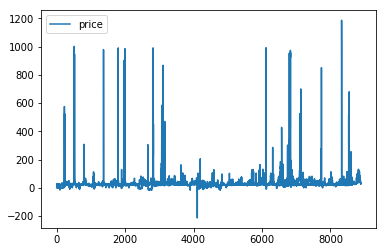

In [5]:
ts.plot()

# Solution 01

## Train and Test Data

In [6]:
X = ts.values
size = len(X)-12
train = X

augData = pd.read_csv('data_target.csv').drop(columns=['Date'])
T = augData.values
test = T[0:len(T)]
len(train), len(test)

(17536, 287)

# ARIMA

========== D = 12 ========
   ========== t = 0 ; D = 12 ========
d = 1:: predicted=31.323940, expected=27.252910
d = 2:: predicted=33.369859, expected=26.921320
d = 3:: predicted=34.398487, expected=41.362070
d = 4:: predicted=34.916071, expected=37.821590
d = 5:: predicted=35.176915, expected=36.554900
d = 6:: predicted=35.308790, expected=33.167130
d = 7:: predicted=35.375898, expected=32.119290
d = 8:: predicted=35.410451, expected=28.512300
d = 9:: predicted=35.428638, expected=29.549990
d = 10:: predicted=35.438635, expected=26.533460
d = 11:: predicted=35.444502, expected=30.632000
d = 12:: predicted=35.448310, expected=35.706920


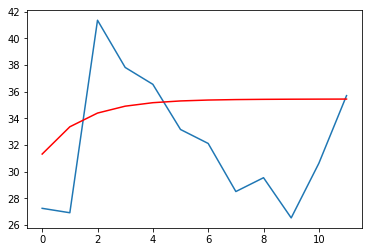

   ========== t = 1 ; D = 12 ========
d = 1:: predicted=30.200326, expected=26.921320
d = 2:: predicted=31.848297, expected=41.362070
d = 3:: predicted=32.676932, expected=37.821590
d = 4:: predicted=33.093986, expected=36.554900
d = 5:: predicted=33.304280, expected=33.167130
d = 6:: predicted=33.410723, expected=32.119290
d = 7:: predicted=33.464976, expected=28.512300
d = 8:: predicted=33.493029, expected=29.549990
d = 9:: predicted=33.507903, expected=26.533460
d = 10:: predicted=33.516183, expected=30.632000
d = 11:: predicted=33.521124, expected=35.706920
d = 12:: predicted=33.524405, expected=34.990880


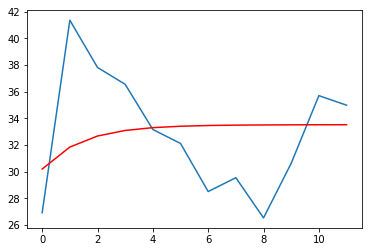

   ========== t = 2 ; D = 12 ========
d = 1:: predicted=37.877665, expected=41.362070
d = 2:: predicted=36.128129, expected=37.821590
d = 3:: predicted=35.250090, expected=36.554900
d = 4:: predicted=34.809823, expected=33.167130
d = 5:: predicted=34.589475, expected=32.119290
d = 6:: predicted=34.479594, expected=28.512300
d = 7:: predicted=34.425233, expected=29.549990
d = 8:: predicted=34.398735, expected=26.533460
d = 9:: predicted=34.386245, expected=30.632000
d = 10:: predicted=34.380780, expected=35.706920
d = 11:: predicted=34.378850, expected=34.990880
d = 12:: predicted=34.378695, expected=33.837380


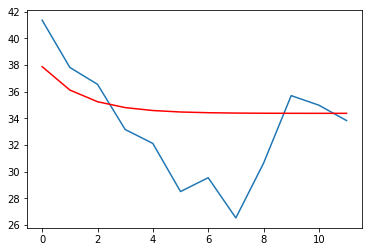

   ========== t = 3 ; D = 12 ========
d = 1:: predicted=36.625522, expected=37.821590
d = 2:: predicted=36.025538, expected=36.554900
d = 3:: predicted=35.724994, expected=33.167130
d = 4:: predicted=35.574862, expected=32.119290
d = 5:: predicted=35.500290, expected=28.512300
d = 6:: predicted=35.463680, expected=29.549990
d = 7:: predicted=35.446129, expected=26.533460
d = 8:: predicted=35.438158, expected=30.632000
d = 9:: predicted=35.434996, expected=35.706920
d = 10:: predicted=35.434264, expected=34.990880
d = 11:: predicted=35.434735, expected=33.837380
d = 12:: predicted=35.435812, expected=34.823840


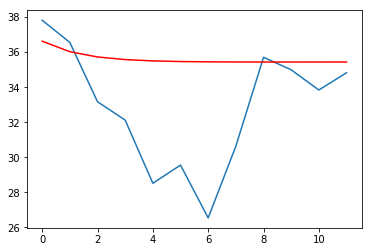

   ========== t = 4 ; D = 12 ========
d = 1:: predicted=36.172121, expected=36.554900
d = 2:: predicted=35.980703, expected=33.167130
d = 3:: predicted=35.885394, expected=32.119290
d = 4:: predicted=35.838376, expected=28.512300
d = 5:: predicted=35.815606, expected=29.549990
d = 6:: predicted=35.805029, expected=26.533460
d = 7:: predicted=35.800566, expected=30.632000
d = 8:: predicted=35.799164, expected=35.706920
d = 9:: predicted=35.799339, expected=34.990880
d = 10:: predicted=35.800281, expected=33.837380
d = 11:: predicted=35.801608, expected=34.823840
d = 12:: predicted=35.803137, expected=34.559600


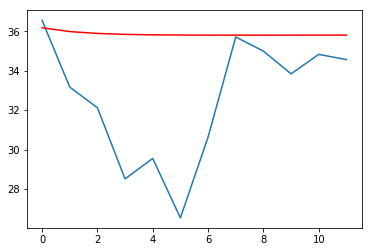

   ========== t = 5 ; D = 12 ========
d = 1:: predicted=34.293615, expected=33.167130
d = 2:: predicted=34.860333, expected=32.119290
d = 3:: predicted=35.145868, expected=28.512300
d = 4:: predicted=35.290142, expected=29.549990
d = 5:: predicted=35.363456, expected=26.533460
d = 6:: predicted=35.401131, expected=30.632000
d = 7:: predicted=35.420907, expected=35.706920
d = 8:: predicted=35.431682, expected=34.990880
d = 9:: predicted=35.437944, expected=33.837380
d = 10:: predicted=35.441936, expected=34.823840
d = 11:: predicted=35.444776, expected=34.559600
d = 12:: predicted=35.447057, expected=34.680810


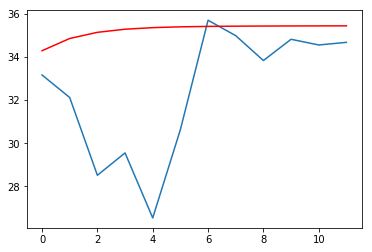

   ========== t = 6 ; D = 12 ========
d = 1:: predicted=33.431786, expected=32.119290
d = 2:: predicted=34.091939, expected=28.512300
d = 3:: predicted=34.424385, expected=29.549990
d = 4:: predicted=34.592190, expected=26.533460
d = 5:: predicted=34.677319, expected=30.632000
d = 6:: predicted=34.720920, expected=35.706920
d = 7:: predicted=34.743647, expected=34.990880
d = 8:: predicted=34.755884, expected=33.837380
d = 9:: predicted=34.762859, expected=34.823840
d = 10:: predicted=34.767190, expected=34.559600
d = 11:: predicted=34.770188, expected=34.680810
d = 12:: predicted=34.772524, expected=33.698700


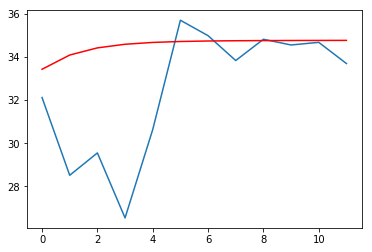

   ========== t = 7 ; D = 12 ========
d = 1:: predicted=31.033716, expected=28.512300
d = 2:: predicted=32.301122, expected=29.549990
d = 3:: predicted=32.938576, expected=26.533460
d = 4:: predicted=33.259586, expected=30.632000
d = 5:: predicted=33.421635, expected=35.706920
d = 6:: predicted=33.503817, expected=34.990880
d = 7:: predicted=33.545909, expected=33.837380
d = 8:: predicted=33.567841, expected=34.823840
d = 9:: predicted=33.579640, expected=34.559600
d = 10:: predicted=33.586367, expected=34.680810
d = 11:: predicted=33.590543, expected=33.698700
d = 12:: predicted=33.593426, expected=33.371360


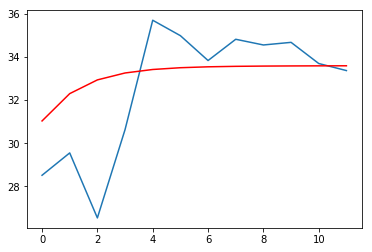

   ========== t = 8 ; D = 12 ========
d = 1:: predicted=31.066075, expected=29.549990
d = 2:: predicted=31.828440, expected=26.533460
d = 3:: predicted=32.212161, expected=30.632000
d = 4:: predicted=32.405688, expected=35.706920
d = 5:: predicted=32.503666, expected=34.990880
d = 6:: predicted=32.553643, expected=33.837380
d = 7:: predicted=32.579505, expected=34.823840
d = 8:: predicted=32.593268, expected=34.559600
d = 9:: predicted=32.600938, expected=34.680810
d = 10:: predicted=32.605558, expected=33.698700
d = 11:: predicted=32.608640, expected=33.371360
d = 12:: predicted=32.610948, expected=33.472080


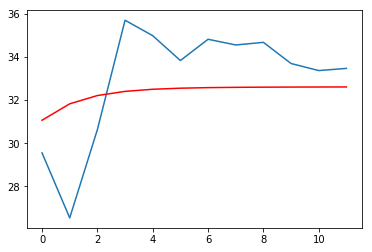

   ========== t = 9 ; D = 12 ========
d = 1:: predicted=28.964797, expected=26.533460
d = 2:: predicted=30.186889, expected=30.632000
d = 3:: predicted=30.801530, expected=35.706920
d = 4:: predicted=31.111013, expected=34.990880
d = 5:: predicted=31.267212, expected=33.837380
d = 6:: predicted=31.346402, expected=34.823840
d = 7:: predicted=31.386929, expected=34.559600
d = 8:: predicted=31.408004, expected=34.680810
d = 9:: predicted=31.419309, expected=33.698700
d = 10:: predicted=31.425726, expected=33.371360
d = 11:: predicted=31.429672, expected=33.472080
d = 12:: predicted=31.432396, expected=33.280560


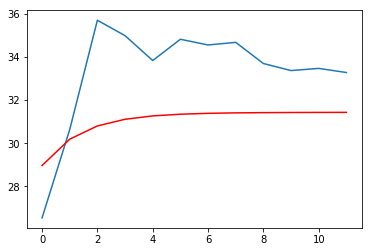

   ========== t = 10 ; D = 12 ========
d = 1:: predicted=30.803069, expected=30.632000
d = 2:: predicted=30.889716, expected=35.706920
d = 3:: predicted=30.933955, expected=34.990880
d = 4:: predicted=30.956907, expected=33.837380
d = 5:: predicted=30.969143, expected=34.823840
d = 6:: predicted=30.975986, expected=34.559600
d = 7:: predicted=30.980153, expected=34.680810
d = 8:: predicted=30.982958, expected=33.698700
d = 9:: predicted=30.985086, expected=33.371360
d = 10:: predicted=30.986869, expected=33.472080
d = 11:: predicted=30.988496, expected=33.280560
d = 12:: predicted=30.990022, expected=33.149940


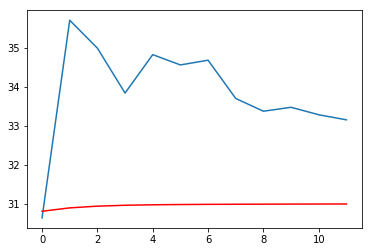

   ========== t = 11 ; D = 12 ========
d = 1:: predicted=33.732561, expected=35.706920
d = 2:: predicted=32.741490, expected=34.990880
d = 3:: predicted=32.244375, expected=33.837380
d = 4:: predicted=31.995385, expected=34.823840
d = 5:: predicted=31.871044, expected=34.559600
d = 6:: predicted=31.809324, expected=34.680810
d = 7:: predicted=31.779053, expected=33.698700
d = 8:: predicted=31.764603, expected=33.371360
d = 9:: predicted=31.758056, expected=33.472080
d = 10:: predicted=31.755520, expected=33.280560
d = 11:: predicted=31.754962, expected=33.149940
d = 12:: predicted=31.755431, expected=33.123030


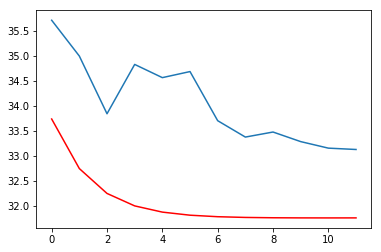

   ========== t = 12 ; D = 12 ========
d = 1:: predicted=33.778851, expected=34.990880
d = 2:: predicted=33.170745, expected=33.837380
d = 3:: predicted=32.866037, expected=34.823840
d = 4:: predicted=32.713721, expected=34.559600
d = 5:: predicted=32.637968, expected=34.680810
d = 6:: predicted=32.600678, expected=33.698700
d = 7:: predicted=32.582679, expected=33.371360
d = 8:: predicted=32.574406, expected=33.472080
d = 9:: predicted=32.571030, expected=33.280560
d = 10:: predicted=32.570092, expected=33.149940
d = 11:: predicted=32.570374, expected=33.123030
d = 12:: predicted=32.571275, expected=37.988930


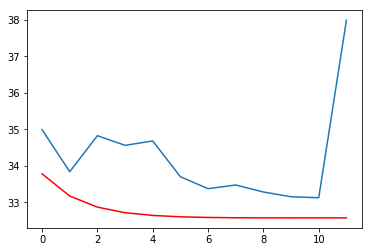

   ========== t = 13 ; D = 12 ========
d = 1:: predicted=33.394191, expected=33.837380
d = 2:: predicted=33.172328, expected=34.823840
d = 3:: predicted=33.061649, expected=34.559600
d = 4:: predicted=33.006812, expected=34.680810
d = 5:: predicted=32.980041, expected=33.698700
d = 6:: predicted=32.967366, expected=33.371360
d = 7:: predicted=32.961764, expected=33.472080
d = 8:: predicted=32.959728, expected=33.280560
d = 9:: predicted=32.959474, expected=33.149940
d = 10:: predicted=32.960108, expected=33.123030
d = 11:: predicted=32.961212, expected=37.988930
d = 12:: predicted=32.962523, expected=35.953630


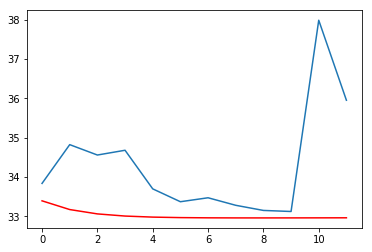

   ========== t = 14 ; D = 12 ========
d = 1:: predicted=34.080718, expected=34.823840
d = 2:: predicted=33.708200, expected=34.559600
d = 3:: predicted=33.521857, expected=34.680810
d = 4:: predicted=33.429025, expected=33.698700
d = 5:: predicted=33.383176, expected=33.371360
d = 6:: predicted=33.360921, expected=33.472080
d = 7:: predicted=33.350524, expected=33.280560
d = 8:: predicted=33.346072, expected=33.149940
d = 9:: predicted=33.344621, expected=33.123030
d = 10:: predicted=33.344679, expected=37.988930
d = 11:: predicted=33.345477, expected=35.953630
d = 12:: predicted=33.346651, expected=36.882210


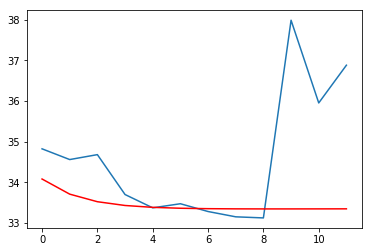

   ========== t = 15 ; D = 12 ========
d = 1:: predicted=34.106895, expected=34.559600
d = 2:: predicted=33.880275, expected=34.680810
d = 3:: predicted=33.767225, expected=33.698700
d = 4:: predicted=33.711220, expected=33.371360
d = 5:: predicted=33.683877, expected=33.472080
d = 6:: predicted=33.670904, expected=33.280560
d = 7:: predicted=33.665184, expected=33.149940
d = 8:: predicted=33.663101, expected=33.123030
d = 9:: predicted=33.662859, expected=37.988930
d = 10:: predicted=33.663515, expected=35.953630
d = 11:: predicted=33.664636, expected=36.882210
d = 12:: predicted=33.665983, expected=35.266560


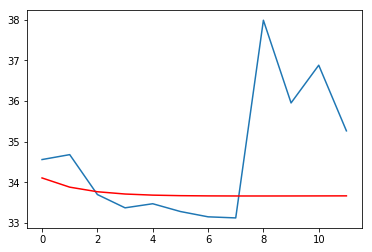

   ========== t = 16 ; D = 12 ========
d = 1:: predicted=34.291009, expected=34.680810
d = 2:: predicted=34.095988, expected=33.698700
d = 3:: predicted=33.998818, expected=33.371360
d = 4:: predicted=33.950796, expected=33.472080
d = 5:: predicted=33.927460, expected=33.280560
d = 6:: predicted=33.916541, expected=33.149940
d = 7:: predicted=33.911850, expected=33.123030
d = 8:: predicted=33.910290, expected=37.988930
d = 9:: predicted=33.910299, expected=35.953630
d = 10:: predicted=33.911087, expected=36.882210
d = 11:: predicted=33.912276, expected=35.266560
d = 12:: predicted=33.913671, expected=34.290850


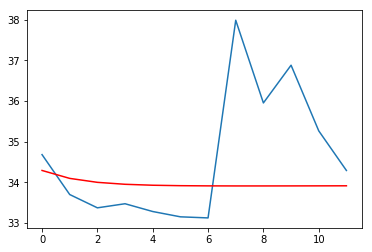

   ========== t = 17 ; D = 12 ========
d = 1:: predicted=33.816972, expected=33.698700
d = 2:: predicted=33.877168, expected=33.371360
d = 3:: predicted=33.908207, expected=33.472080
d = 4:: predicted=33.924586, expected=33.280560
d = 5:: predicted=33.933617, expected=33.149940
d = 6:: predicted=33.938946, expected=33.123030
d = 7:: predicted=33.942415, expected=37.988930
d = 8:: predicted=33.944956, expected=35.953630
d = 9:: predicted=33.947021, expected=36.882210
d = 10:: predicted=33.948856, expected=35.266560
d = 11:: predicted=33.950563, expected=34.290850
d = 12:: predicted=33.952216, expected=34.503980


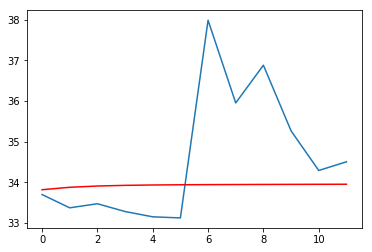

   ========== t = 18 ; D = 12 ========
d = 1:: predicted=33.607678, expected=33.371360
d = 2:: predicted=33.727189, expected=33.472080
d = 3:: predicted=33.787992, expected=33.280560
d = 4:: predicted=33.819334, expected=33.149940
d = 5:: predicted=33.835863, expected=33.123030
d = 6:: predicted=33.844963, expected=37.988930
d = 7:: predicted=33.850325, expected=35.953630
d = 8:: predicted=33.853812, expected=36.882210
d = 9:: predicted=33.856347, expected=35.266560
d = 10:: predicted=33.858417, expected=34.290850
d = 11:: predicted=33.860247, expected=34.503980
d = 12:: predicted=33.861958, expected=34.024860


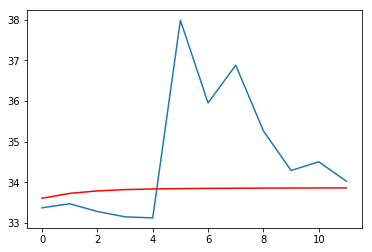

   ========== t = 19 ; D = 12 ========
d = 1:: predicted=33.620820, expected=33.472080
d = 2:: predicted=33.696329, expected=33.280560
d = 3:: predicted=33.735040, expected=33.149940
d = 4:: predicted=33.755302, expected=33.123030
d = 5:: predicted=33.766249, expected=37.988930
d = 6:: predicted=33.772544, expected=35.953630
d = 7:: predicted=33.776498, expected=36.882210
d = 8:: predicted=33.779279, expected=35.266560
d = 9:: predicted=33.781454, expected=34.290850
d = 10:: predicted=33.783341, expected=34.503980
d = 11:: predicted=33.785074, expected=34.024860
d = 12:: predicted=33.786733, expected=32.926910


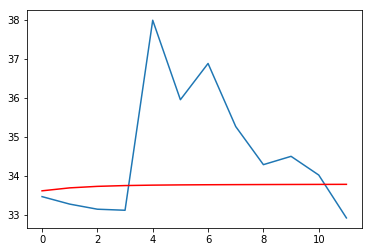

   ========== t = 20 ; D = 12 ========
d = 1:: predicted=33.483674, expected=33.280560
d = 2:: predicted=33.586499, expected=33.149940
d = 3:: predicted=33.638945, expected=33.123030
d = 4:: predicted=33.666061, expected=37.988930
d = 5:: predicted=33.680473, expected=35.953630
d = 6:: predicted=33.688493, expected=36.882210
d = 7:: predicted=33.693314, expected=35.266560
d = 8:: predicted=33.696516, expected=34.290850
d = 9:: predicted=33.698915, expected=34.503980
d = 10:: predicted=33.700905, expected=34.024860
d = 11:: predicted=33.702694, expected=32.926910
d = 12:: predicted=33.704369, expected=32.602260


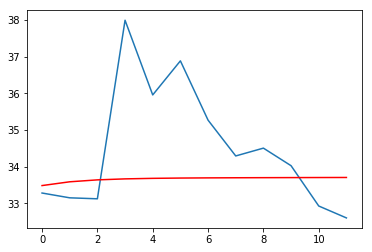

   ========== t = 21 ; D = 12 ========
d = 1:: predicted=33.369465, expected=33.149940
d = 2:: predicted=33.480522, expected=33.123030
d = 3:: predicted=33.537083, expected=37.988930
d = 4:: predicted=33.566295, expected=35.953630
d = 5:: predicted=33.581758, expected=36.882210
d = 6:: predicted=33.590296, expected=35.266560
d = 7:: predicted=33.595368, expected=34.290850
d = 8:: predicted=33.598705, expected=34.503980
d = 9:: predicted=33.601158, expected=34.024860
d = 10:: predicted=33.603187, expected=32.926910
d = 11:: predicted=33.604981, expected=32.602260
d = 12:: predicted=33.606664, expected=32.562020


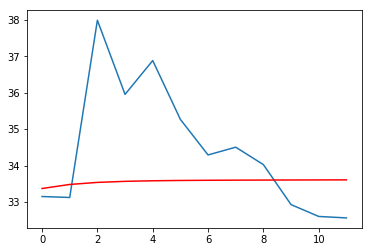

   ========== t = 22 ; D = 12 ========
d = 1:: predicted=33.311943, expected=33.123030
d = 2:: predicted=33.407615, expected=37.988930
d = 3:: predicted=33.456441, expected=35.953630
d = 4:: predicted=33.481758, expected=36.882210
d = 5:: predicted=33.495254, expected=35.266560
d = 6:: predicted=33.502819, expected=34.290850
d = 7:: predicted=33.507390, expected=34.503980
d = 8:: predicted=33.510478, expected=34.024860
d = 9:: predicted=33.512807, expected=32.926910
d = 10:: predicted=33.514751, expected=32.602260
d = 11:: predicted=33.516512, expected=32.562020
d = 12:: predicted=33.518179, expected=31.609830


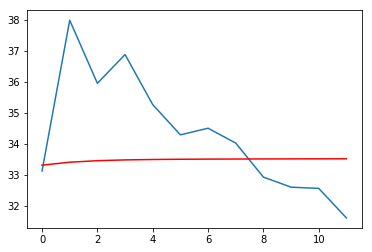

   ========== t = 23 ; D = 12 ========
d = 1:: predicted=36.116082, expected=37.988930
d = 2:: predicted=35.176062, expected=35.953630
d = 3:: predicted=34.704670, expected=36.882210
d = 4:: predicted=34.468655, expected=35.266560
d = 5:: predicted=34.350885, expected=34.290850
d = 6:: predicted=34.292531, expected=34.503980
d = 7:: predicted=34.264013, expected=34.024860
d = 8:: predicted=34.250500, expected=32.926910
d = 9:: predicted=34.244509, expected=32.602260
d = 10:: predicted=34.242291, expected=32.562020
d = 11:: predicted=34.241981, expected=31.609830
d = 12:: predicted=34.242613, expected=31.452520


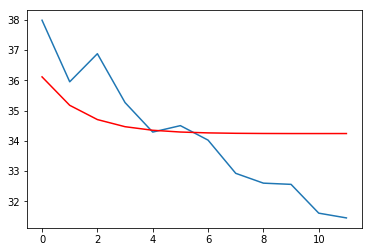

   ========== t = 24 ; D = 12 ========
d = 1:: predicted=35.369937, expected=35.953630
d = 2:: predicted=35.077540, expected=36.882210
d = 3:: predicted=34.931456, expected=35.266560
d = 4:: predicted=34.858897, expected=34.290850
d = 5:: predicted=34.823246, expected=34.503980
d = 6:: predicted=34.806163, expected=34.024860
d = 7:: predicted=34.798402, expected=32.926910
d = 8:: predicted=34.795319, expected=32.602260
d = 9:: predicted=34.794577, expected=32.562020
d = 10:: predicted=34.795022, expected=31.609830
d = 11:: predicted=34.796057, expected=31.452520
d = 12:: predicted=34.797380, expected=49.692180


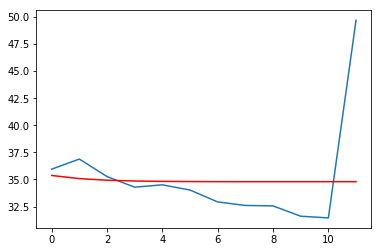

   ========== t = 25 ; D = 12 ========
d = 1:: predicted=36.055629, expected=36.882210
d = 2:: predicted=35.641228, expected=35.266560
d = 3:: predicted=35.433881, expected=34.290850
d = 4:: predicted=35.330556, expected=34.503980
d = 5:: predicted=35.279468, expected=34.024860
d = 6:: predicted=35.254635, expected=32.926910
d = 7:: predicted=35.242984, expected=32.602260
d = 8:: predicted=35.237955, expected=32.562020
d = 9:: predicted=35.236264, expected=31.609830
d = 10:: predicted=35.236230, expected=31.452520
d = 11:: predicted=35.237048, expected=49.692180
d = 12:: predicted=35.238267, expected=37.276800


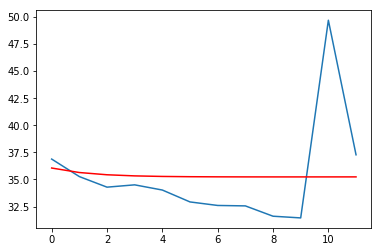

   ========== t = 26 ; D = 12 ========
d = 1:: predicted=35.313124, expected=35.266560
d = 2:: predicted=35.337341, expected=34.290850
d = 3:: predicted=35.350330, expected=34.503980
d = 4:: predicted=35.357686, expected=34.024860
d = 5:: predicted=35.362221, expected=32.926910
d = 6:: predicted=35.365333, expected=32.602260
d = 7:: predicted=35.367717, expected=32.562020
d = 8:: predicted=35.369733, expected=31.609830
d = 9:: predicted=35.371581, expected=31.452520
d = 10:: predicted=35.373339, expected=49.692180
d = 11:: predicted=35.375058, expected=37.276800
d = 12:: predicted=35.376745, expected=33.224130


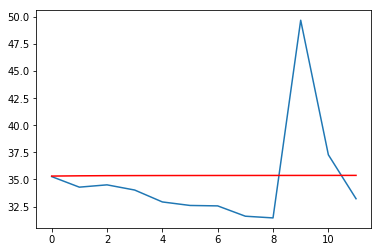

   ========== t = 27 ; D = 12 ========
d = 1:: predicted=34.742470, expected=34.290850
d = 2:: predicted=34.970170, expected=34.503980
d = 3:: predicted=35.085381, expected=34.024860
d = 4:: predicted=35.144076, expected=32.926910
d = 5:: predicted=35.174383, expected=32.602260
d = 6:: predicted=35.190431, expected=32.562020
d = 7:: predicted=35.199332, expected=31.609830
d = 8:: predicted=35.204606, expected=31.452520
d = 9:: predicted=35.208093, expected=49.692180
d = 10:: predicted=35.210655, expected=37.276800
d = 11:: predicted=35.212777, expected=33.224130
d = 12:: predicted=35.214660, expected=37.085310


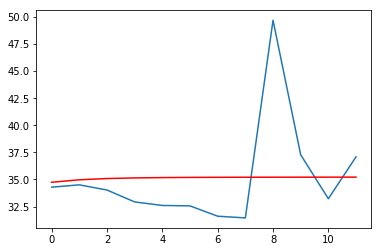

   ========== t = 28 ; D = 12 ========
d = 1:: predicted=34.771880, expected=34.503980
d = 2:: predicted=34.907283, expected=34.024860
d = 3:: predicted=34.976120, expected=32.926910
d = 4:: predicted=35.011517, expected=32.602260
d = 5:: predicted=35.030121, expected=32.562020
d = 6:: predicted=35.040298, expected=31.609830
d = 7:: predicted=35.046199, expected=31.452520
d = 8:: predicted=35.050004, expected=49.692180
d = 9:: predicted=35.052733, expected=37.276800
d = 10:: predicted=35.054921, expected=33.224130
d = 11:: predicted=35.056836, expected=37.085310
d = 12:: predicted=35.058603, expected=37.113580


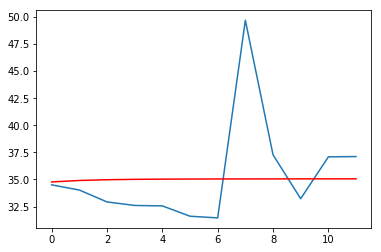

   ========== t = 29 ; D = 12 ========
d = 1:: predicted=34.439765, expected=34.024860
d = 2:: predicted=34.649002, expected=32.926910
d = 3:: predicted=34.754932, expected=32.602260
d = 4:: predicted=34.808950, expected=32.562020
d = 5:: predicted=34.836902, expected=31.609830
d = 6:: predicted=34.851762, expected=31.452520
d = 7:: predicted=34.860036, expected=49.692180
d = 8:: predicted=34.865001, expected=37.276800
d = 9:: predicted=34.868314, expected=33.224130
d = 10:: predicted=34.870784, expected=37.085310
d = 11:: predicted=34.872837, expected=37.113580
d = 12:: predicted=34.874675, expected=36.954430


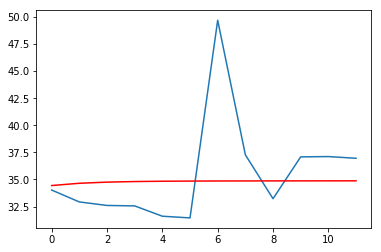

   ========== t = 30 ; D = 12 ========
d = 1:: predicted=33.712602, expected=32.926910
d = 2:: predicted=34.108103, expected=32.602260
d = 3:: predicted=34.307570, expected=32.562020
d = 4:: predicted=34.408577, expected=31.609830
d = 5:: predicted=34.460124, expected=31.452520
d = 6:: predicted=34.486817, expected=49.692180
d = 7:: predicted=34.501028, expected=37.276800
d = 8:: predicted=34.508974, expected=33.224130
d = 9:: predicted=34.513769, expected=37.085310
d = 10:: predicted=34.516984, expected=37.113580
d = 11:: predicted=34.519387, expected=36.954430
d = 12:: predicted=34.521415, expected=37.005340


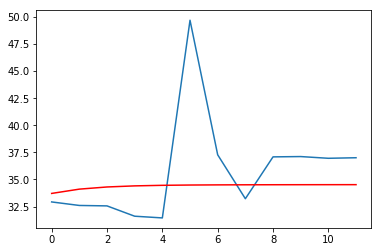

   ========== t = 31 ; D = 12 ========
d = 1:: predicted=33.350913, expected=32.602260
d = 2:: predicted=33.727782, expected=32.562020
d = 3:: predicted=33.917894, expected=31.609830
d = 4:: predicted=34.014176, expected=31.452520
d = 5:: predicted=34.063338, expected=49.692180
d = 6:: predicted=34.088835, expected=37.276800
d = 7:: predicted=34.102433, expected=33.224130
d = 8:: predicted=34.110052, expected=37.085310
d = 9:: predicted=34.114664, expected=37.113580
d = 10:: predicted=34.117778, expected=36.954430
d = 11:: predicted=34.120138, expected=37.005340
d = 12:: predicted=34.122113, expected=35.786760


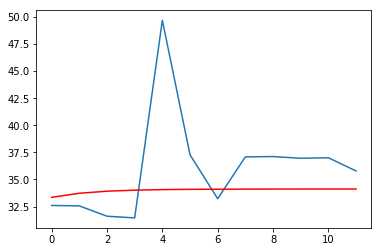

   ========== t = 32 ; D = 12 ========
d = 1:: predicted=33.163570, expected=32.562020
d = 2:: predicted=33.466540, expected=31.609830
d = 3:: predicted=33.619507, expected=31.452520
d = 4:: predicted=33.697136, expected=49.692180
d = 5:: predicted=33.736914, expected=37.276800
d = 6:: predicted=33.757676, expected=33.224130
d = 7:: predicted=33.768874, expected=37.085310
d = 8:: predicted=33.775295, expected=37.113580
d = 9:: predicted=33.779296, expected=36.954430
d = 10:: predicted=33.782084, expected=37.005340
d = 11:: predicted=33.784266, expected=35.786760
d = 12:: predicted=33.786145, expected=35.112110


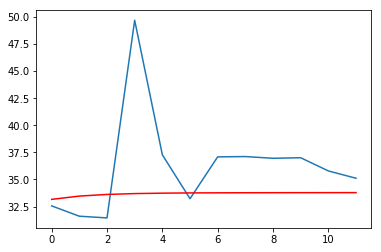

   ========== t = 33 ; D = 12 ========
d = 1:: predicted=32.478009, expected=31.609830
d = 2:: predicted=32.914892, expected=31.452520
d = 3:: predicted=33.135139, expected=49.692180
d = 4:: predicted=33.246545, expected=37.276800
d = 5:: predicted=33.303272, expected=33.224130
d = 6:: predicted=33.332547, expected=37.085310
d = 7:: predicted=33.348013, expected=37.113580
d = 8:: predicted=33.356552, expected=36.954430
d = 9:: predicted=33.361617, expected=37.005340
d = 10:: predicted=33.364925, expected=35.786760
d = 11:: predicted=33.367364, expected=35.112110
d = 12:: predicted=33.369357, expected=33.330840


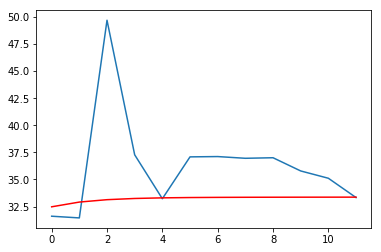

   ========== t = 34 ; D = 12 ========
d = 1:: predicted=32.194529, expected=31.452520
d = 2:: predicted=32.568027, expected=49.692180
d = 3:: predicted=32.756405, expected=37.276800
d = 4:: predicted=32.851790, expected=33.224130
d = 5:: predicted=32.900466, expected=37.085310
d = 6:: predicted=32.925680, expected=37.113580
d = 7:: predicted=32.939104, expected=36.954430
d = 8:: predicted=32.946601, expected=37.005340
d = 9:: predicted=32.951131, expected=35.786760
d = 10:: predicted=32.954173, expected=35.112110
d = 11:: predicted=32.956450, expected=33.330840
d = 12:: predicted=32.958343, expected=34.382560


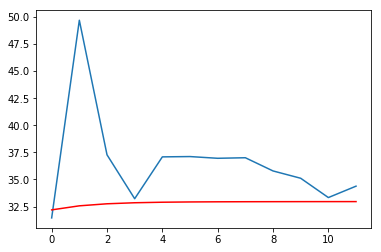

   ========== t = 35 ; D = 12 ========
d = 1:: predicted=42.673440, expected=49.692180
d = 2:: predicted=39.148459, expected=37.276800
d = 3:: predicted=37.378562, expected=33.224130
d = 4:: predicted=36.490285, expected=37.085310
d = 5:: predicted=36.044896, expected=37.113580
d = 6:: predicted=35.821993, expected=36.954430
d = 7:: predicted=35.710864, expected=37.005340
d = 8:: predicted=35.655859, expected=35.786760
d = 9:: predicted=35.629058, expected=35.112110
d = 10:: predicted=35.616402, expected=33.330840
d = 11:: predicted=35.610900, expected=34.382560
d = 12:: predicted=35.608966, expected=37.338330


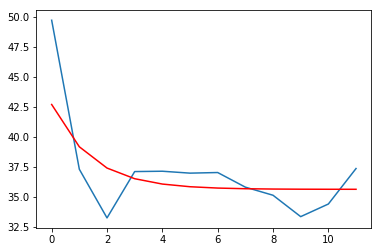

   ========== t = 36 ; D = 12 ========
d = 1:: predicted=37.059314, expected=37.276800
d = 2:: predicted=36.950928, expected=33.224130
d = 3:: predicted=36.897337, expected=37.085310
d = 4:: predicted=36.871270, expected=37.113580
d = 5:: predicted=36.859059, expected=36.954430
d = 6:: predicted=36.853774, expected=37.005340
d = 7:: predicted=36.851988, expected=35.786760
d = 8:: predicted=36.851954, expected=35.112110
d = 9:: predicted=36.852797, expected=33.330840
d = 10:: predicted=36.854090, expected=34.382560
d = 11:: predicted=36.855605, expected=37.338330
d = 12:: predicted=36.857224, expected=27.142560


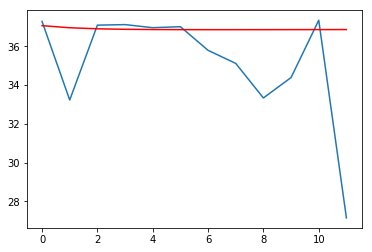

   ========== t = 37 ; D = 12 ========
d = 1:: predicted=34.754811, expected=33.224130
d = 2:: predicted=35.524583, expected=37.085310
d = 3:: predicted=35.912115, expected=37.113580
d = 4:: predicted=36.107640, expected=36.954430
d = 5:: predicted=36.206702, expected=37.005340
d = 6:: predicted=36.257309, expected=35.786760
d = 7:: predicted=36.283573, expected=35.112110
d = 8:: predicted=36.297624, expected=33.330840
d = 9:: predicted=36.305530, expected=34.382560
d = 10:: predicted=36.310342, expected=37.338330
d = 11:: predicted=36.313611, expected=27.142560
d = 12:: predicted=36.316099, expected=27.142560


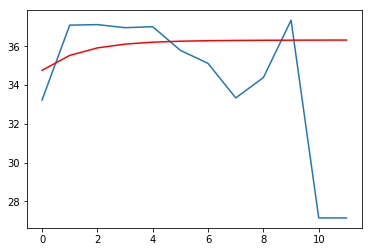

   ========== t = 38 ; D = 12 ========
d = 1:: predicted=36.663825, expected=37.085310
d = 2:: predicted=36.452934, expected=37.113580
d = 3:: predicted=36.347826, expected=36.954430
d = 4:: predicted=36.295882, expected=37.005340
d = 5:: predicted=36.270644, expected=35.786760
d = 6:: predicted=36.258821, expected=35.112110
d = 7:: predicted=36.253712, expected=33.330840
d = 8:: predicted=36.252000, expected=34.382560
d = 9:: predicted=36.251975, expected=37.338330
d = 10:: predicted=36.252787, expected=27.142560
d = 11:: predicted=36.254065, expected=27.142560
d = 12:: predicted=36.255540, expected=27.934510


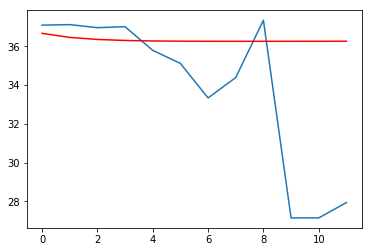

   ========== t = 39 ; D = 12 ========
d = 1:: predicted=36.787151, expected=37.113580
d = 2:: predicted=36.624035, expected=36.954430
d = 3:: predicted=36.542927, expected=37.005340
d = 4:: predicted=36.503045, expected=35.786760
d = 5:: predicted=36.483857, expected=35.112110
d = 6:: predicted=36.475071, expected=33.330840
d = 7:: predicted=36.471500, expected=34.382560
d = 8:: predicted=36.470562, expected=37.338330
d = 9:: predicted=36.470935, expected=27.142560
d = 10:: predicted=36.471986, expected=27.142560
d = 11:: predicted=36.473357, expected=27.934510
d = 12:: predicted=36.474907, expected=32.894630


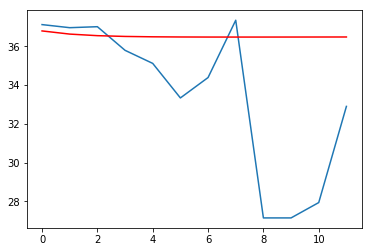

   ========== t = 40 ; D = 12 ========
d = 1:: predicted=36.779254, expected=36.954430
d = 2:: predicted=36.692114, expected=37.005340
d = 3:: predicted=36.649187, expected=35.786760
d = 4:: predicted=36.628488, expected=35.112110
d = 5:: predicted=36.618943, expected=33.330840
d = 6:: predicted=36.615000, expected=34.382560
d = 7:: predicted=36.613875, expected=37.338330
d = 8:: predicted=36.614160, expected=27.142560
d = 9:: predicted=36.615155, expected=27.142560
d = 10:: predicted=36.616515, expected=27.934510
d = 11:: predicted=36.618039, expected=32.894630
d = 12:: predicted=36.619677, expected=32.815280


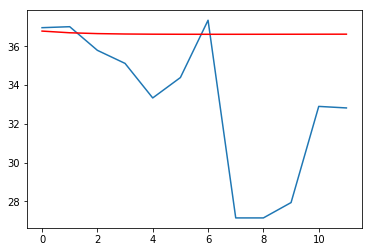

   ========== t = 41 ; D = 12 ========
d = 1:: predicted=36.859052, expected=37.005340
d = 2:: predicted=36.786420, expected=35.786760
d = 3:: predicted=36.750784, expected=35.112110
d = 4:: predicted=36.733739, expected=33.330840
d = 5:: predicted=36.726038, expected=34.382560
d = 6:: predicted=36.723027, expected=37.338330
d = 7:: predicted=36.722359, expected=27.142560
d = 8:: predicted=36.722886, expected=27.142560
d = 9:: predicted=36.724012, expected=27.934510
d = 10:: predicted=36.725426, expected=32.894630
d = 11:: predicted=36.726989, expected=32.815280
d = 12:: predicted=36.728640, expected=34.226790


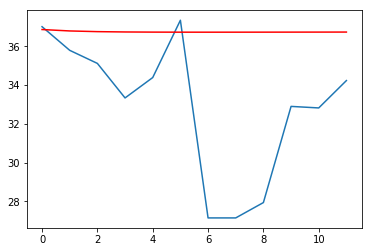

   ========== t = 42 ; D = 12 ========
d = 1:: predicted=36.191527, expected=35.786760
d = 2:: predicted=36.395715, expected=35.112110
d = 3:: predicted=36.499131, expected=33.330840
d = 4:: predicted=36.551941, expected=34.382560
d = 5:: predicted=36.579324, expected=37.338330
d = 6:: predicted=36.593929, expected=27.142560
d = 7:: predicted=36.602117, expected=27.142560
d = 8:: predicted=36.607084, expected=27.934510
d = 9:: predicted=36.610445, expected=32.894630
d = 10:: predicted=36.612982, expected=32.815280
d = 11:: predicted=36.615097, expected=34.226790
d = 12:: predicted=36.617013, expected=34.244600


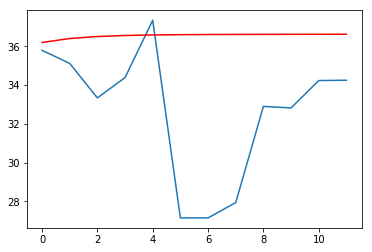

   ========== t = 43 ; D = 12 ========
d = 1:: predicted=35.714129, expected=35.112110
d = 2:: predicted=36.017387, expected=33.330840
d = 3:: predicted=36.170571, expected=34.382560
d = 4:: predicted=36.248366, expected=37.338330
d = 5:: predicted=36.288287, expected=27.142560
d = 6:: predicted=36.309189, expected=27.142560
d = 7:: predicted=36.320532, expected=27.934510
d = 8:: predicted=36.327084, expected=32.894630
d = 9:: predicted=36.331216, expected=32.815280
d = 10:: predicted=36.334140, expected=34.226790
d = 11:: predicted=36.336441, expected=34.244600
d = 12:: predicted=36.338427, expected=35.085410


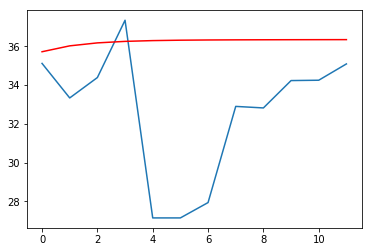

   ========== t = 44 ; D = 12 ========
d = 1:: predicted=34.545470, expected=33.330840
d = 2:: predicted=35.156447, expected=34.382560
d = 3:: predicted=35.464198, expected=37.338330
d = 4:: predicted=35.619612, expected=27.142560
d = 5:: predicted=35.698519, expected=27.142560
d = 6:: predicted=35.738984, expected=27.934510
d = 7:: predicted=35.760139, expected=32.894630
d = 8:: predicted=35.771598, expected=32.815280
d = 9:: predicted=35.778178, expected=34.226790
d = 10:: predicted=35.782313, expected=34.244600
d = 11:: predicted=35.785221, expected=35.085410
d = 12:: predicted=35.787509, expected=35.824370


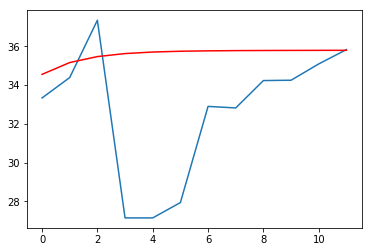

   ========== t = 45 ; D = 12 ========
d = 1:: predicted=34.888083, expected=34.382560
d = 2:: predicted=35.142837, expected=37.338330
d = 3:: predicted=35.271627, expected=27.142560
d = 4:: predicted=35.337148, expected=27.142560
d = 5:: predicted=35.370875, expected=27.934510
d = 6:: predicted=35.388637, expected=32.894630
d = 7:: predicted=35.398374, expected=32.815280
d = 8:: predicted=35.404090, expected=34.226790
d = 9:: predicted=35.407768, expected=34.244600
d = 10:: predicted=35.410432, expected=35.085410
d = 11:: predicted=35.412599, expected=35.824370
d = 12:: predicted=35.414497, expected=35.844600


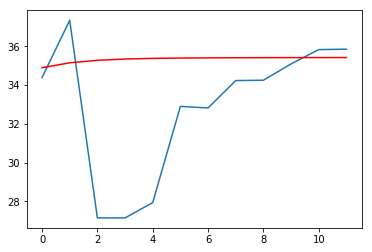

   ========== t = 46 ; D = 12 ========
d = 1:: predicted=36.505121, expected=37.338330
d = 2:: predicted=36.087394, expected=27.142560
d = 3:: predicted=35.878380, expected=27.142560
d = 4:: predicted=35.774216, expected=27.934510
d = 5:: predicted=35.722702, expected=32.894630
d = 6:: predicted=35.697647, expected=32.815280
d = 7:: predicted=35.685902, expected=34.226790
d = 8:: predicted=35.680817, expected=34.244600
d = 9:: predicted=35.679077, expected=35.085410
d = 10:: predicted=35.679047, expected=35.824370
d = 11:: predicted=35.679836, expected=35.844600
d = 12:: predicted=35.681073, expected=35.777940


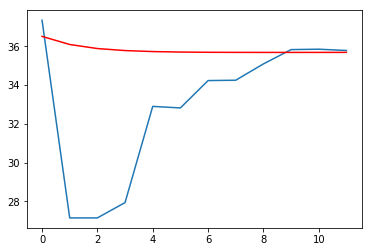

   ========== t = 47 ; D = 12 ========
d = 1:: predicted=30.758251, expected=27.142560
d = 2:: predicted=32.575347, expected=27.142560
d = 3:: predicted=33.488921, expected=27.934510
d = 4:: predicted=33.948635, expected=32.894630
d = 5:: predicted=34.180352, expected=32.815280
d = 6:: predicted=34.297548, expected=34.226790
d = 7:: predicted=34.357200, expected=34.244600
d = 8:: predicted=34.387963, expected=35.085410
d = 9:: predicted=34.404200, expected=35.824370
d = 10:: predicted=34.413135, expected=35.844600
d = 11:: predicted=34.418438, expected=35.777940
d = 12:: predicted=34.421872, expected=35.907550


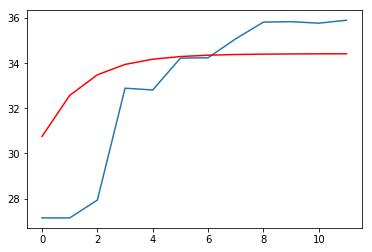

   ========== t = 48 ; D = 12 ========
d = 1:: predicted=29.932618, expected=27.142560
d = 2:: predicted=31.334909, expected=27.934510
d = 3:: predicted=32.040089, expected=32.894630
d = 4:: predicted=32.395061, expected=32.815280
d = 5:: predicted=32.574111, expected=34.226790
d = 6:: predicted=32.664805, expected=34.244600
d = 7:: predicted=32.711095, expected=35.085410
d = 8:: predicted=32.735103, expected=35.824370
d = 9:: predicted=32.747885, expected=35.844600
d = 10:: predicted=32.755066, expected=35.777940
d = 11:: predicted=32.759424, expected=35.907550
d = 12:: predicted=32.762362, expected=33.430380


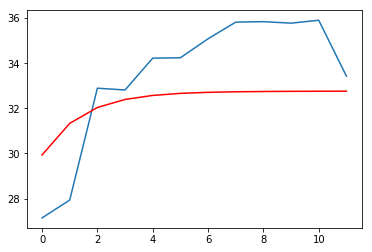

   ========== t = 49 ; D = 12 ========
d = 1:: predicted=29.759067, expected=27.934510
d = 2:: predicted=30.676323, expected=32.894630
d = 3:: predicted=31.137802, expected=32.815280
d = 4:: predicted=31.370331, expected=34.226790
d = 5:: predicted=31.487857, expected=34.244600
d = 6:: predicted=31.547602, expected=35.085410
d = 7:: predicted=31.578327, expected=35.824370
d = 8:: predicted=31.594480, expected=35.844600
d = 9:: predicted=31.603304, expected=35.777940
d = 10:: predicted=31.608446, expected=35.907550
d = 11:: predicted=31.611747, expected=33.430380
d = 12:: predicted=31.614106, expected=32.768260


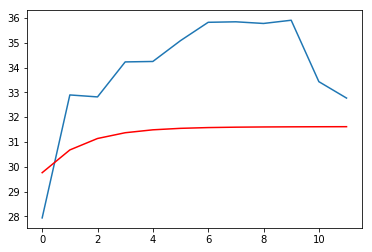

   ========== t = 50 ; D = 12 ========
d = 1:: predicted=32.239850, expected=32.894630
d = 2:: predicted=31.911652, expected=32.815280
d = 3:: predicted=31.747492, expected=34.226790
d = 4:: predicted=31.665733, expected=34.244600
d = 5:: predicted=31.625384, expected=35.085410
d = 6:: predicted=31.605821, expected=35.824370
d = 7:: predicted=31.596694, expected=35.844600
d = 8:: predicted=31.592837, expected=35.777940
d = 9:: predicted=31.591602, expected=35.907550
d = 10:: predicted=31.591683, expected=33.430380
d = 11:: predicted=31.592438, expected=32.768260
d = 12:: predicted=31.593533, expected=32.766670


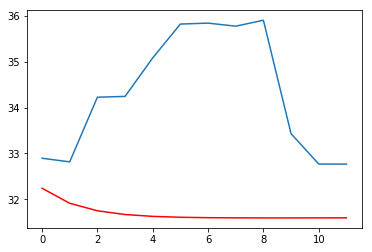

   ========== t = 51 ; D = 12 ========
d = 1:: predicted=32.352699, expected=32.815280
d = 2:: predicted=32.121050, expected=34.226790
d = 3:: predicted=32.005418, expected=34.244600
d = 4:: predicted=31.948052, expected=35.085410
d = 5:: predicted=31.919956, expected=35.824370
d = 6:: predicted=31.906543, expected=35.844600
d = 7:: predicted=31.900536, expected=35.777940
d = 8:: predicted=31.898231, expected=35.907550
d = 9:: predicted=31.897815, expected=33.430380
d = 10:: predicted=31.898301, expected=32.768260
d = 11:: predicted=31.899272, expected=32.766670
d = 12:: predicted=31.900481, expected=32.778060


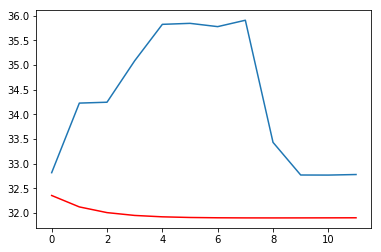

   ========== t = 52 ; D = 12 ========
d = 1:: predicted=33.291124, expected=34.226790
d = 2:: predicted=32.821830, expected=34.244600
d = 3:: predicted=32.586815, expected=35.085410
d = 4:: predicted=32.469494, expected=35.824370
d = 5:: predicted=32.411287, expected=35.844600
d = 6:: predicted=32.382769, expected=35.777940
d = 7:: predicted=32.369175, expected=35.907550
d = 8:: predicted=32.363084, expected=33.430380
d = 9:: predicted=32.360748, expected=32.768260
d = 10:: predicted=32.360307, expected=32.766670
d = 11:: predicted=32.360814, expected=32.778060
d = 12:: predicted=32.361799, expected=33.764710


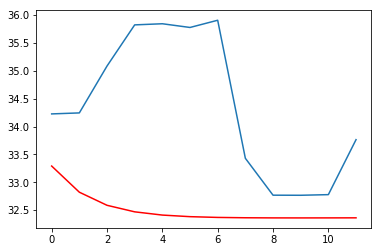

   ========== t = 53 ; D = 12 ========
d = 1:: predicted=33.525732, expected=34.244600
d = 2:: predicted=33.165347, expected=35.085410
d = 3:: predicted=32.985056, expected=35.824370
d = 4:: predicted=32.895220, expected=35.844600
d = 5:: predicted=32.850864, expected=35.777940
d = 6:: predicted=32.829311, expected=35.907550
d = 7:: predicted=32.819224, expected=33.430380
d = 8:: predicted=32.814908, expected=32.768260
d = 9:: predicted=32.813478, expected=32.766670
d = 10:: predicted=32.813501, expected=32.778060
d = 11:: predicted=32.814254, expected=33.764710
d = 12:: predicted=32.815370, expected=34.695150


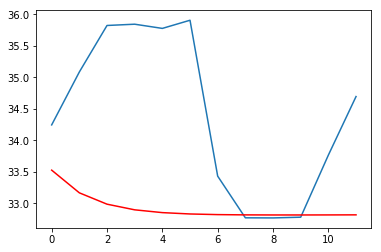

   ========== t = 54 ; D = 12 ========
d = 1:: predicted=34.190599, expected=35.085410
d = 2:: predicted=33.741836, expected=35.824370
d = 3:: predicted=33.517180, expected=35.844600
d = 4:: predicted=33.405086, expected=35.777940
d = 5:: predicted=33.349524, expected=35.907550
d = 6:: predicted=33.322367, expected=33.430380
d = 7:: predicted=33.309482, expected=32.768260
d = 8:: predicted=33.303779, expected=32.766670
d = 9:: predicted=33.301656, expected=32.778060
d = 10:: predicted=33.301335, expected=33.764710
d = 11:: predicted=33.301934, expected=34.695150
d = 12:: predicted=33.302986, expected=39.865450


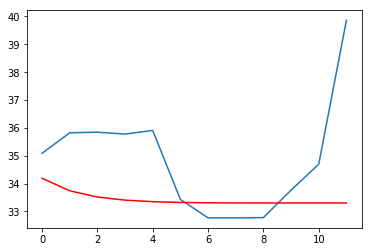

   ========== t = 55 ; D = 12 ========
d = 1:: predicted=34.836775, expected=35.824370
d = 2:: predicted=34.341451, expected=35.844600
d = 3:: predicted=34.093398, expected=35.777940
d = 4:: predicted=33.969584, expected=35.907550
d = 5:: predicted=33.908123, expected=33.430380
d = 6:: predicted=33.878041, expected=32.768260
d = 7:: predicted=33.863692, expected=32.766670
d = 8:: predicted=33.857253, expected=32.778060
d = 9:: predicted=33.854796, expected=33.764710
d = 10:: predicted=33.854321, expected=34.695150
d = 11:: predicted=33.854853, expected=39.865450
d = 12:: predicted=33.855877, expected=35.746550


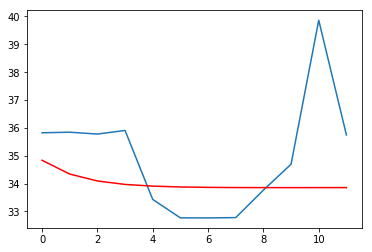

   ========== t = 56 ; D = 12 ========
d = 1:: predicted=35.085244, expected=35.844600
d = 2:: predicted=34.704547, expected=35.777940
d = 3:: predicted=34.514094, expected=35.907550
d = 4:: predicted=34.419215, expected=33.430380
d = 5:: predicted=34.372337, expected=32.768260
d = 6:: predicted=34.349563, expected=32.766670
d = 7:: predicted=34.338906, expected=32.778060
d = 8:: predicted=34.334335, expected=33.764710
d = 9:: predicted=34.332818, expected=34.695150
d = 10:: predicted=34.332844, expected=39.865450
d = 11:: predicted=34.333627, expected=35.746550
d = 12:: predicted=34.334821, expected=36.255910


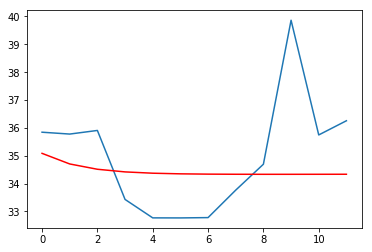

   ========== t = 57 ; D = 12 ========
d = 1:: predicted=35.230444, expected=35.777940
d = 2:: predicted=34.956206, expected=35.907550
d = 3:: predicted=34.819241, expected=33.430380
d = 4:: predicted=34.751227, expected=32.768260
d = 5:: predicted=34.717851, expected=32.766670
d = 6:: predicted=34.701881, expected=32.778060
d = 7:: predicted=34.694647, expected=33.764710
d = 8:: predicted=34.691789, expected=34.695150
d = 9:: predicted=34.691159, expected=39.865450
d = 10:: predicted=34.691625, expected=35.746550
d = 11:: predicted=34.692646, expected=36.255910
d = 12:: predicted=34.693952, expected=35.769250


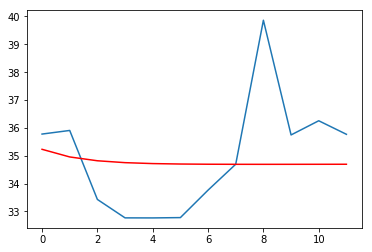

   ========== t = 58 ; D = 12 ========
d = 1:: predicted=35.441375, expected=35.907550
d = 2:: predicted=35.207993, expected=33.430380
d = 3:: predicted=35.091550, expected=32.768260
d = 4:: predicted=35.033859, expected=32.766670
d = 5:: predicted=35.005665, expected=32.778060
d = 6:: predicted=34.992310, expected=33.764710
d = 7:: predicted=34.986406, expected=34.695150
d = 8:: predicted=34.984231, expected=39.865450
d = 9:: predicted=34.983933, expected=35.746550
d = 10:: predicted=34.984600, expected=36.255910
d = 11:: predicted=34.985714, expected=35.769250
d = 12:: predicted=34.987069, expected=34.521380


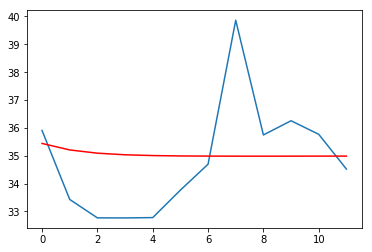

   ========== t = 59 ; D = 12 ========
d = 1:: predicted=34.112731, expected=33.430380
d = 2:: predicted=34.456297, expected=32.768260
d = 3:: predicted=34.629677, expected=32.766670
d = 4:: predicted=34.717561, expected=32.778060
d = 5:: predicted=34.762504, expected=33.764710
d = 6:: predicted=34.785882, expected=34.695150
d = 7:: predicted=34.798399, expected=39.865450
d = 8:: predicted=34.805494, expected=35.746550
d = 9:: predicted=34.809855, expected=36.255910
d = 10:: predicted=34.812838, expected=35.769250
d = 11:: predicted=34.815134, expected=34.521380
d = 12:: predicted=34.817069, expected=34.678720


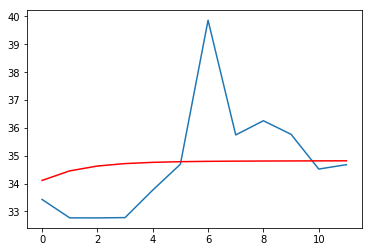

   ========== t = 60 ; D = 12 ========
d = 1:: predicted=33.577904, expected=32.768260
d = 2:: predicted=33.985394, expected=32.766670
d = 3:: predicted=34.190878, expected=32.778060
d = 4:: predicted=34.294872, expected=33.764710
d = 5:: predicted=34.347905, expected=34.695150
d = 6:: predicted=34.375312, expected=39.865450
d = 7:: predicted=34.389874, expected=35.746550
d = 8:: predicted=34.397959, expected=36.255910
d = 9:: predicted=34.402824, expected=35.769250
d = 10:: predicted=34.406040, expected=34.521380
d = 11:: predicted=34.408427, expected=34.678720
d = 12:: predicted=34.410429, expected=30.087180


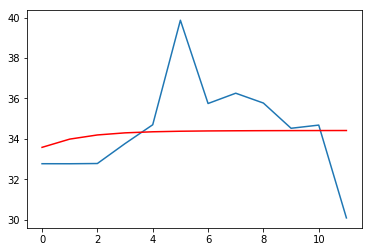

   ========== t = 61 ; D = 12 ========
d = 1:: predicted=33.398930, expected=32.766670
d = 2:: predicted=33.717305, expected=32.778060
d = 3:: predicted=33.877998, expected=33.764710
d = 4:: predicted=33.959501, expected=34.695150
d = 5:: predicted=34.001219, expected=39.865450
d = 6:: predicted=34.022939, expected=35.746550
d = 7:: predicted=34.034623, expected=36.255910
d = 8:: predicted=34.041263, expected=35.769250
d = 9:: predicted=34.045366, expected=34.521380
d = 10:: predicted=34.048205, expected=34.678720
d = 11:: predicted=34.050385, expected=30.087180
d = 12:: predicted=34.052264, expected=26.562220


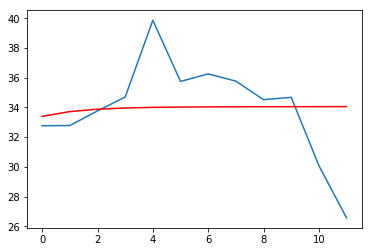

   ========== t = 62 ; D = 12 ========
d = 1:: predicted=33.268352, expected=32.778060
d = 2:: predicted=33.515405, expected=33.764710
d = 3:: predicted=33.640277, expected=34.695150
d = 4:: predicted=33.703757, expected=39.865450
d = 5:: predicted=33.736419, expected=35.746550
d = 6:: predicted=33.753585, expected=36.255910
d = 7:: predicted=33.762973, expected=35.769250
d = 8:: predicted=33.768444, expected=34.521380
d = 9:: predicted=33.771961, expected=34.678720
d = 10:: predicted=33.774490, expected=30.087180
d = 11:: predicted=33.776537, expected=26.562220
d = 12:: predicted=33.778313, expected=28.106390


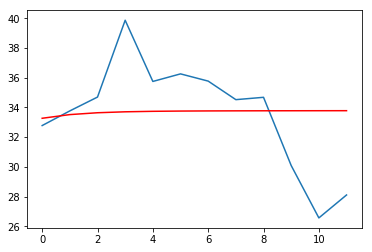

   ========== t = 63 ; D = 12 ========
d = 1:: predicted=33.739448, expected=33.764710
d = 2:: predicted=33.727518, expected=34.695150
d = 3:: predicted=33.722293, expected=39.865450
d = 4:: predicted=33.720423, expected=35.746550
d = 5:: predicted=33.720243, expected=36.255910
d = 6:: predicted=33.720918, expected=35.769250
d = 7:: predicted=33.722017, expected=34.521380
d = 8:: predicted=33.723332, expected=34.678720
d = 9:: predicted=33.724751, expected=30.087180
d = 10:: predicted=33.726234, expected=26.562220
d = 11:: predicted=33.727724, expected=28.106390
d = 12:: predicted=33.729233, expected=30.870300


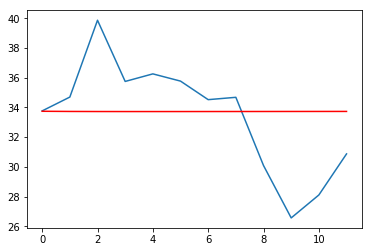

   ========== t = 64 ; D = 12 ========
d = 1:: predicted=34.296728, expected=34.695150
d = 2:: predicted=34.097334, expected=39.865450
d = 3:: predicted=33.997951, expected=35.746550
d = 4:: predicted=33.948784, expected=36.255910
d = 5:: predicted=33.924858, expected=35.769250
d = 6:: predicted=33.913612, expected=34.521380
d = 7:: predicted=33.908709, expected=34.678720
d = 8:: predicted=33.907012, expected=30.087180
d = 9:: predicted=33.906929, expected=26.562220
d = 10:: predicted=33.907656, expected=28.106390
d = 11:: predicted=33.908784, expected=30.870300
d = 12:: predicted=33.910112, expected=30.847070


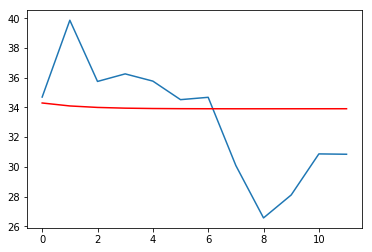

   ========== t = 65 ; D = 12 ========
d = 1:: predicted=37.413827, expected=39.865450
d = 2:: predicted=36.183081, expected=35.746550
d = 3:: predicted=35.565633, expected=36.255910
d = 4:: predicted=35.256263, expected=35.769250
d = 5:: predicted=35.101644, expected=34.521380
d = 6:: predicted=35.024753, expected=34.678720
d = 7:: predicted=34.986927, expected=30.087180
d = 8:: predicted=34.968724, expected=26.562220
d = 9:: predicted=34.960366, expected=28.106390
d = 10:: predicted=34.956958, expected=30.870300
d = 11:: predicted=34.956041, expected=30.847070
d = 12:: predicted=34.956382, expected=33.077510


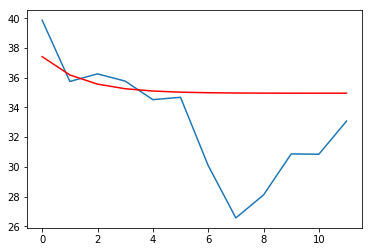

   ========== t = 66 ; D = 12 ========
d = 1:: predicted=35.585564, expected=35.746550
d = 2:: predicted=35.505510, expected=36.255910
d = 3:: predicted=35.466087, expected=35.769250
d = 4:: predicted=35.447102, expected=34.521380
d = 5:: predicted=35.438374, expected=34.678720
d = 6:: predicted=35.434800, expected=30.087180
d = 7:: predicted=35.433794, expected=26.562220
d = 8:: predicted=35.434102, expected=28.106390
d = 9:: predicted=35.435065, expected=30.870300
d = 10:: predicted=35.436347, expected=30.847070
d = 11:: predicted=35.437801, expected=33.077510
d = 12:: predicted=35.439334, expected=33.067850


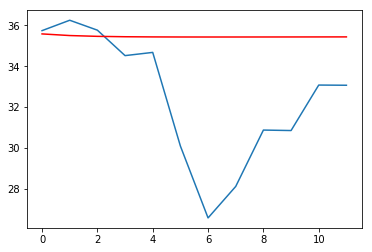

   ========== t = 67 ; D = 12 ========
d = 1:: predicted=35.929014, expected=36.255910
d = 2:: predicted=35.765601, expected=35.769250
d = 3:: predicted=35.684324, expected=34.521380
d = 4:: predicted=35.644309, expected=34.678720
d = 5:: predicted=35.625009, expected=30.087180
d = 6:: predicted=35.616129, expected=26.562220
d = 7:: predicted=35.612475, expected=28.106390
d = 8:: predicted=35.611470, expected=30.870300
d = 9:: predicted=35.611757, expected=30.847070
d = 10:: predicted=35.612716, expected=33.077510
d = 11:: predicted=35.614001, expected=33.067850
d = 12:: predicted=35.615444, expected=33.863160


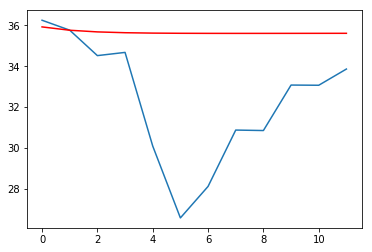

   ========== t = 68 ; D = 12 ========
d = 1:: predicted=35.729677, expected=35.769250
d = 2:: predicted=35.710611, expected=34.521380
d = 3:: predicted=35.701848, expected=34.678720
d = 4:: predicted=35.698242, expected=30.087180
d = 5:: predicted=35.697248, expected=26.562220
d = 6:: predicted=35.697562, expected=28.106390
d = 7:: predicted=35.698536, expected=30.870300
d = 8:: predicted=35.699835, expected=30.847070
d = 9:: predicted=35.701296, expected=33.077510
d = 10:: predicted=35.702837, expected=33.067850
d = 11:: predicted=35.704431, expected=33.863160
d = 12:: predicted=35.706036, expected=34.956730


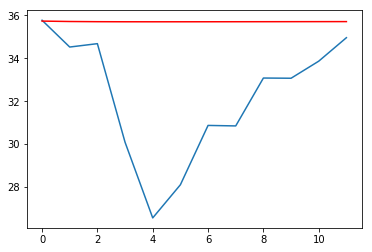

   ========== t = 69 ; D = 12 ========
d = 1:: predicted=35.019942, expected=34.521380
d = 2:: predicted=35.271202, expected=34.678720
d = 3:: predicted=35.398227, expected=30.087180
d = 4:: predicted=35.462825, expected=26.562220
d = 5:: predicted=35.496081, expected=28.106390
d = 6:: predicted=35.513602, expected=30.870300
d = 7:: predicted=35.523213, expected=30.847070
d = 8:: predicted=35.528846, expected=33.077510
d = 9:: predicted=35.532477, expected=33.067850
d = 10:: predicted=35.535121, expected=33.863160
d = 11:: predicted=35.537245, expected=34.956730
d = 12:: predicted=35.539136, expected=35.065040


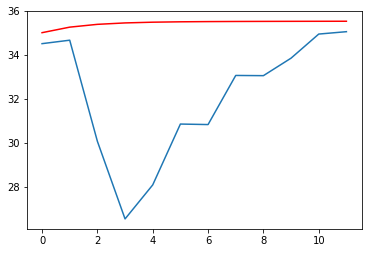

   ========== t = 70 ; D = 12 ========
d = 1:: predicted=35.005761, expected=34.678720
d = 2:: predicted=35.170863, expected=30.087180
d = 3:: predicted=35.254593, expected=26.562220
d = 4:: predicted=35.297457, expected=28.106390
d = 5:: predicted=35.319794, expected=30.870300
d = 6:: predicted=35.331818, expected=30.847070
d = 7:: predicted=35.338666, expected=33.077510
d = 8:: predicted=35.342900, expected=33.067850
d = 9:: predicted=35.345811, expected=33.863160
d = 10:: predicted=35.348098, expected=34.956730
d = 11:: predicted=35.350030, expected=35.065040
d = 12:: predicted=35.351812, expected=35.065040


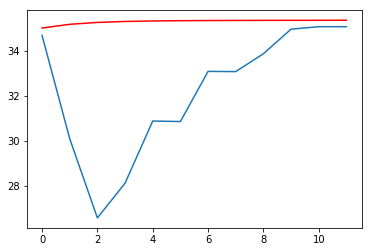

   ========== t = 71 ; D = 12 ========
d = 1:: predicted=32.260498, expected=30.087180
d = 2:: predicted=33.353028, expected=26.562220
d = 3:: predicted=33.902605, expected=28.106390
d = 4:: predicted=34.179458, expected=30.870300
d = 5:: predicted=34.319310, expected=30.847070
d = 6:: predicted=34.390355, expected=33.077510
d = 7:: predicted=34.426809, expected=33.067850
d = 8:: predicted=34.445895, expected=33.863160
d = 9:: predicted=34.456246, expected=34.956730
d = 10:: predicted=34.462233, expected=35.065040
d = 11:: predicted=34.466021, expected=35.065040
d = 12:: predicted=34.468699, expected=37.162800


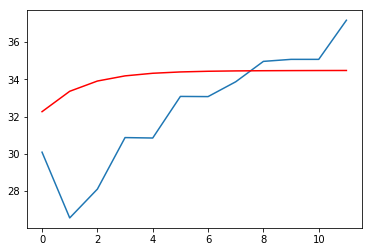

   ========== t = 72 ; D = 12 ========
d = 1:: predicted=29.711093, expected=26.562220
d = 2:: predicted=31.293609, expected=28.106390
d = 3:: predicted=32.089313, expected=30.870300
d = 4:: predicted=32.489755, expected=30.847070
d = 5:: predicted=32.691629, expected=33.077510
d = 6:: predicted=32.793784, expected=33.067850
d = 7:: predicted=32.845832, expected=33.863160
d = 8:: predicted=32.872706, expected=34.956730
d = 9:: predicted=32.886944, expected=35.065040
d = 10:: predicted=32.894853, expected=35.065040
d = 11:: predicted=32.899546, expected=37.162800
d = 12:: predicted=32.902632, expected=33.041270


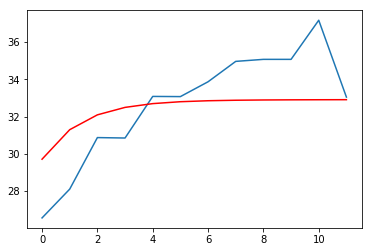

   ========== t = 73 ; D = 12 ========
d = 1:: predicted=29.893506, expected=28.106390
d = 2:: predicted=30.791919, expected=30.870300
d = 3:: predicted=31.243943, expected=30.847070
d = 4:: predicted=31.471699, expected=33.077510
d = 5:: predicted=31.586815, expected=33.067850
d = 6:: predicted=31.645343, expected=33.863160
d = 7:: predicted=31.675456, expected=34.956730
d = 8:: predicted=31.691276, expected=35.065040
d = 9:: predicted=31.699918, expected=35.065040
d = 10:: predicted=31.704967, expected=37.162800
d = 11:: predicted=31.708198, expected=33.041270
d = 12:: predicted=31.710530, expected=33.125840


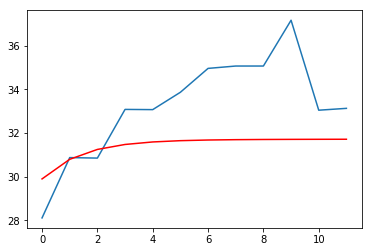

   ========== t = 74 ; D = 12 ========
d = 1:: predicted=31.101481, expected=30.870300
d = 2:: predicted=31.218298, expected=30.847070
d = 3:: predicted=31.277681, expected=33.077510
d = 4:: predicted=31.308194, expected=33.067850
d = 5:: predicted=31.324211, expected=33.863160
d = 6:: predicted=31.332960, expected=34.956730
d = 7:: predicted=31.338029, expected=35.065040
d = 8:: predicted=31.341271, expected=35.065040
d = 9:: predicted=31.343586, expected=37.162800
d = 10:: predicted=31.345443, expected=33.041270
d = 11:: predicted=31.347069, expected=33.125840
d = 12:: predicted=31.348571, expected=32.822570


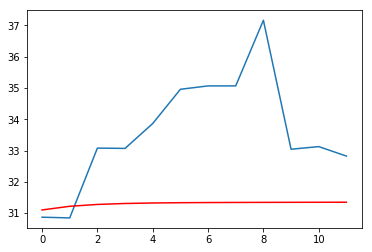

   ========== t = 75 ; D = 12 ========
d = 1:: predicted=31.042383, expected=30.847070
d = 2:: predicted=31.141166, expected=33.077510
d = 3:: predicted=31.191473, expected=33.067850
d = 4:: predicted=31.217433, expected=33.863160
d = 5:: predicted=31.231177, expected=34.956730
d = 6:: predicted=31.238738, expected=35.065040
d = 7:: predicted=31.243245, expected=35.065040
d = 8:: predicted=31.246191, expected=37.162800
d = 9:: predicted=31.248358, expected=33.041270
d = 10:: predicted=31.250143, expected=33.125840
d = 11:: predicted=31.251724, expected=32.822570
d = 12:: predicted=31.253207, expected=35.152440


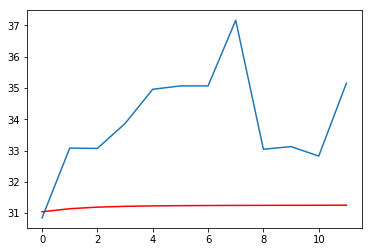

   ========== t = 76 ; D = 12 ========
d = 1:: predicted=32.306363, expected=33.077510
d = 2:: predicted=31.919686, expected=33.067850
d = 3:: predicted=31.726145, expected=33.863160
d = 4:: predicted=31.629611, expected=34.956730
d = 5:: predicted=31.581816, expected=35.065040
d = 6:: predicted=31.558506, expected=35.065040
d = 7:: predicted=31.547487, expected=37.162800
d = 8:: predicted=31.542648, expected=33.041270
d = 9:: predicted=31.540909, expected=33.125840
d = 10:: predicted=31.540740, expected=32.822570
d = 11:: predicted=31.541340, expected=35.152440
d = 12:: predicted=31.542337, expected=34.906000


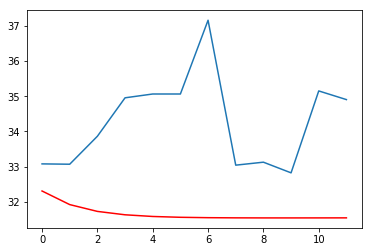

   ========== t = 77 ; D = 12 ========
d = 1:: predicted=32.486582, expected=33.067850
d = 2:: predicted=32.195285, expected=33.863160
d = 3:: predicted=32.049658, expected=34.956730
d = 4:: predicted=31.977207, expected=35.065040
d = 5:: predicted=31.941520, expected=35.065040
d = 6:: predicted=31.924307, expected=37.162800
d = 7:: predicted=31.916362, expected=33.041270
d = 8:: predicted=31.913068, expected=33.125840
d = 9:: predicted=31.912119, expected=32.822570
d = 10:: predicted=31.912342, expected=35.152440
d = 11:: predicted=31.913172, expected=34.906000
d = 12:: predicted=31.914286, expected=33.894260


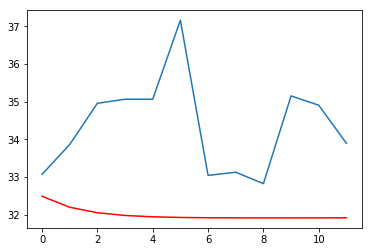

   ========== t = 78 ; D = 12 ========
d = 1:: predicted=33.092691, expected=33.863160
d = 2:: predicted=32.706384, expected=34.956730
d = 3:: predicted=32.513041, expected=35.065040
d = 4:: predicted=32.416621, expected=35.065040
d = 5:: predicted=32.368915, expected=37.162800
d = 6:: predicted=32.345659, expected=33.041270
d = 7:: predicted=32.334713, expected=33.125840
d = 8:: predicted=32.329909, expected=32.822570
d = 9:: predicted=32.328217, expected=35.152440
d = 10:: predicted=32.328080, expected=34.906000
d = 11:: predicted=32.328727, expected=33.894260
d = 12:: predicted=32.329771, expected=33.165970


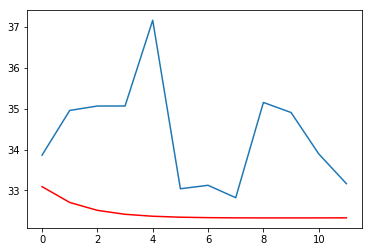

   ========== t = 79 ; D = 12 ========
d = 1:: predicted=33.916637, expected=34.956730
d = 2:: predicted=33.394884, expected=35.065040
d = 3:: predicted=33.133520, expected=35.065040
d = 4:: predicted=33.002955, expected=37.162800
d = 5:: predicted=32.938100, expected=33.041270
d = 6:: predicted=32.906250, expected=33.125840
d = 7:: predicted=32.890981, expected=32.822570
d = 8:: predicted=32.884039, expected=35.152440
d = 9:: predicted=32.881278, expected=34.906000
d = 10:: predicted=32.880618, expected=33.894260
d = 11:: predicted=32.881022, expected=33.165970
d = 12:: predicted=32.881954, expected=33.165970


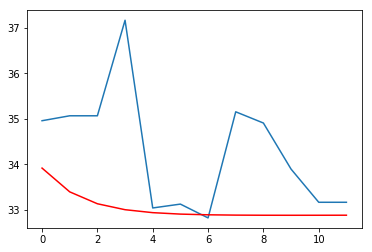

   ========== t = 80 ; D = 12 ========
d = 1:: predicted=34.228132, expected=35.065040
d = 2:: predicted=33.808462, expected=35.065040
d = 3:: predicted=33.598377, expected=37.162800
d = 4:: predicted=33.493605, expected=33.041270
d = 5:: predicted=33.441716, expected=33.125840
d = 6:: predicted=33.416383, expected=32.822570
d = 7:: predicted=33.404399, expected=35.152440
d = 8:: predicted=33.399139, expected=34.906000
d = 9:: predicted=33.397232, expected=33.894260
d = 10:: predicted=33.397008, expected=33.165970
d = 11:: predicted=33.397657, expected=33.165970
d = 12:: predicted=33.398721, expected=30.925750


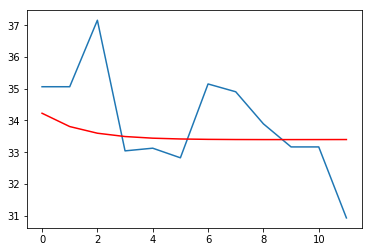

   ========== t = 81 ; D = 12 ========
d = 1:: predicted=34.429696, expected=35.065040
d = 2:: predicted=34.111288, expected=37.162800
d = 3:: predicted=33.952094, expected=33.041270
d = 4:: predicted=33.872866, expected=33.125840
d = 5:: predicted=33.833835, expected=32.822570
d = 6:: predicted=33.814975, expected=35.152440
d = 7:: predicted=33.806258, expected=34.906000
d = 8:: predicted=33.802615, expected=33.894260
d = 9:: predicted=33.801551, expected=33.165970
d = 10:: predicted=33.801776, expected=33.165970
d = 11:: predicted=33.802637, expected=30.925750
d = 12:: predicted=33.803804, expected=28.880160


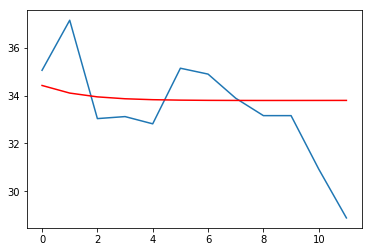

   ========== t = 82 ; D = 12 ========
d = 1:: predicted=35.808736, expected=37.162800
d = 2:: predicted=35.129321, expected=33.041270
d = 3:: predicted=34.788787, expected=33.125840
d = 4:: predicted=34.618492, expected=32.822570
d = 5:: predicted=34.533726, expected=35.152440
d = 6:: predicted=34.491901, expected=34.906000
d = 7:: predicted=34.471664, expected=33.894260
d = 8:: predicted=34.462274, expected=33.165970
d = 9:: predicted=34.458321, expected=33.165970
d = 10:: predicted=34.457121, expected=30.925750
d = 11:: predicted=34.457273, expected=28.880160
d = 12:: predicted=34.458122, expected=28.857850


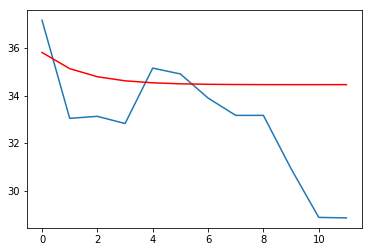

   ========== t = 83 ; D = 12 ========
d = 1:: predicted=33.725350, expected=33.041270
d = 2:: predicted=34.069755, expected=33.125840
d = 3:: predicted=34.243536, expected=32.822570
d = 4:: predicted=34.331592, expected=35.152440
d = 5:: predicted=34.376595, expected=34.906000
d = 6:: predicted=34.399978, expected=33.894260
d = 7:: predicted=34.412488, expected=33.165970
d = 8:: predicted=34.419545, expected=33.165970
d = 9:: predicted=34.423842, expected=30.925750
d = 10:: predicted=34.426782, expected=28.880160
d = 11:: predicted=34.429020, expected=28.857850
d = 12:: predicted=34.430932, expected=30.329310


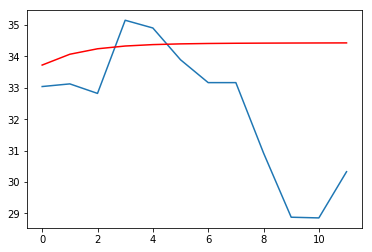

   ========== t = 84 ; D = 12 ========
d = 1:: predicted=33.625489, expected=33.125840
d = 2:: predicted=33.877240, expected=32.822570
d = 3:: predicted=34.004466, expected=35.152440
d = 4:: predicted=34.069129, expected=34.906000
d = 5:: predicted=34.102372, expected=33.894260
d = 6:: predicted=34.119839, expected=33.165970
d = 7:: predicted=34.129352, expected=33.165970
d = 8:: predicted=34.134893, expected=30.925750
d = 9:: predicted=34.138440, expected=28.880160
d = 10:: predicted=34.140990, expected=28.857850
d = 11:: predicted=34.143025, expected=30.329310
d = 12:: predicted=34.144812, expected=30.531240


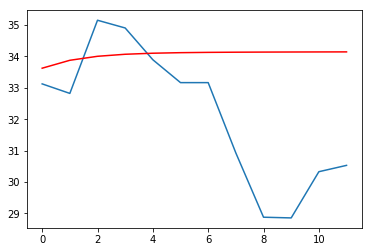

   ========== t = 85 ; D = 12 ========
d = 1:: predicted=33.341802, expected=32.822570
d = 2:: predicted=33.603400, expected=35.152440
d = 3:: predicted=33.735547, expected=34.906000
d = 4:: predicted=33.802689, expected=33.894260
d = 5:: predicted=33.837179, expected=33.165970
d = 6:: predicted=33.855249, expected=33.165970
d = 7:: predicted=33.865089, expected=30.925750
d = 8:: predicted=33.870782, expected=28.880160
d = 9:: predicted=33.874379, expected=28.857850
d = 10:: predicted=33.876947, expected=30.329310
d = 11:: predicted=33.878994, expected=30.531240
d = 12:: predicted=33.880787, expected=33.159400


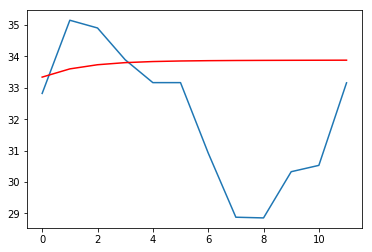

   ========== t = 86 ; D = 12 ========
d = 1:: predicted=34.589783, expected=35.152440
d = 2:: predicted=34.307883, expected=34.906000
d = 3:: predicted=34.167043, expected=33.894260
d = 4:: predicted=34.097046, expected=33.165970
d = 5:: predicted=34.062644, expected=33.165970
d = 6:: predicted=34.046113, expected=30.925750
d = 7:: predicted=34.038567, expected=28.880160
d = 8:: predicted=34.035545, expected=28.857850
d = 9:: predicted=34.034776, expected=30.329310
d = 10:: predicted=34.035142, expected=30.531240
d = 11:: predicted=34.036076, expected=33.159400
d = 12:: predicted=34.037304, expected=32.649350


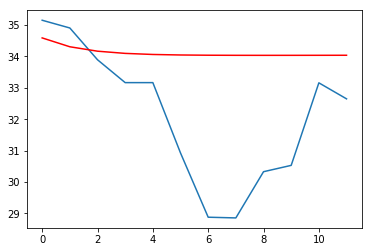

   ========== t = 87 ; D = 12 ========
d = 1:: predicted=34.584413, expected=34.906000
d = 2:: predicted=34.423629, expected=33.894260
d = 3:: predicted=34.343622, expected=33.165970
d = 4:: predicted=34.304189, expected=33.165970
d = 5:: predicted=34.285136, expected=30.925750
d = 6:: predicted=34.276329, expected=28.880160
d = 7:: predicted=34.272676, expected=28.857850
d = 8:: predicted=34.271588, expected=30.329310
d = 9:: predicted=34.271818, expected=30.531240
d = 10:: predicted=34.272694, expected=33.159400
d = 11:: predicted=34.273890, expected=32.649350
d = 12:: predicted=34.275268, expected=29.235390


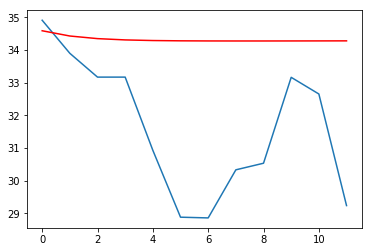

   ========== t = 88 ; D = 12 ========
d = 1:: predicted=34.076977, expected=33.894260
d = 2:: predicted=34.169510, expected=33.165970
d = 3:: predicted=34.216754, expected=33.165970
d = 4:: predicted=34.241259, expected=30.925750
d = 5:: predicted=34.254326, expected=28.880160
d = 6:: predicted=34.261642, expected=28.857850
d = 7:: predicted=34.266088, expected=30.329310
d = 8:: predicted=34.269086, expected=30.531240
d = 9:: predicted=34.271345, expected=33.159400
d = 10:: predicted=34.273255, expected=32.649350
d = 11:: predicted=34.274976, expected=29.235390
d = 12:: predicted=34.276600, expected=29.430310


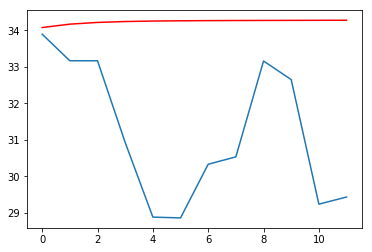

   ========== t = 89 ; D = 12 ========
d = 1:: predicted=33.618512, expected=33.165970
d = 2:: predicted=33.846582, expected=33.165970
d = 3:: predicted=33.961904, expected=30.925750
d = 4:: predicted=34.020587, expected=28.880160
d = 5:: predicted=34.050834, expected=28.857850
d = 6:: predicted=34.066779, expected=30.329310
d = 7:: predicted=34.075547, expected=30.531240
d = 8:: predicted=34.080693, expected=33.159400
d = 9:: predicted=34.084043, expected=32.649350
d = 10:: predicted=34.086488, expected=29.235390
d = 11:: predicted=34.088466, expected=29.430310
d = 12:: predicted=34.090222, expected=30.215250


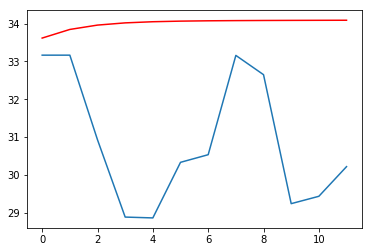

   ========== t = 90 ; D = 12 ========
d = 1:: predicted=33.522600, expected=33.165970
d = 2:: predicted=33.702494, expected=30.925750
d = 3:: predicted=33.793602, expected=28.880160
d = 4:: predicted=33.840123, expected=28.857850
d = 5:: predicted=33.864246, expected=30.329310
d = 6:: predicted=33.877114, expected=30.531240
d = 7:: predicted=33.884327, expected=33.159400
d = 8:: predicted=33.888721, expected=32.649350
d = 9:: predicted=33.891655, expected=29.235390
d = 10:: predicted=33.893880, expected=29.430310
d = 11:: predicted=33.895765, expected=30.215250
d = 12:: predicted=33.897451, expected=26.641220


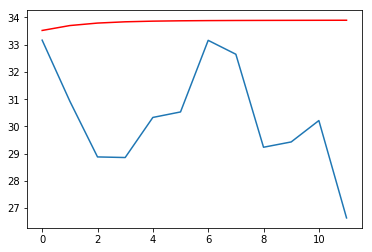

   ========== t = 91 ; D = 12 ========
d = 1:: predicted=32.141760, expected=30.925750
d = 2:: predicted=32.753335, expected=28.880160
d = 3:: predicted=33.061292, expected=28.857850
d = 4:: predicted=33.216725, expected=30.329310
d = 5:: predicted=33.295510, expected=30.531240
d = 6:: predicted=33.335850, expected=33.159400
d = 7:: predicted=33.356853, expected=32.649350
d = 8:: predicted=33.368140, expected=29.235390
d = 9:: predicted=33.374538, expected=29.430310
d = 10:: predicted=33.378497, expected=30.215250
d = 11:: predicted=33.381227, expected=26.641220
d = 12:: predicted=33.383326, expected=27.279640


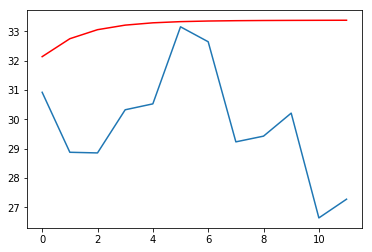

   ========== t = 92 ; D = 12 ========
d = 1:: predicted=30.675953, expected=28.880160
d = 2:: predicted=31.578760, expected=28.857850
d = 3:: predicted=32.032984, expected=30.329310
d = 4:: predicted=32.261876, expected=30.531240
d = 5:: predicted=32.377563, expected=33.159400
d = 6:: predicted=32.436389, expected=32.649350
d = 7:: predicted=32.466655, expected=29.235390
d = 8:: predicted=32.482561, expected=29.430310
d = 9:: predicted=32.491261, expected=30.215250
d = 10:: predicted=32.496357, expected=26.641220
d = 11:: predicted=32.499635, expected=27.279640
d = 12:: predicted=32.501977, expected=27.438580


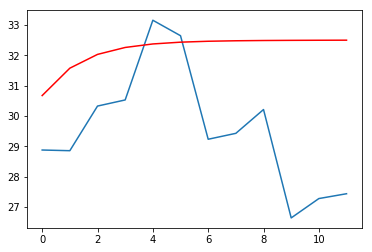

   ========== t = 93 ; D = 12 ========
d = 1:: predicted=30.256525, expected=28.857850
d = 2:: predicted=30.959796, expected=30.329310
d = 3:: predicted=31.313773, expected=30.531240
d = 4:: predicted=31.492283, expected=33.159400
d = 5:: predicted=31.582639, expected=32.649350
d = 6:: predicted=31.628714, expected=29.235390
d = 7:: predicted=31.652555, expected=29.430310
d = 8:: predicted=31.665211, expected=30.215250
d = 9:: predicted=31.672274, expected=26.641220
d = 10:: predicted=31.676503, expected=27.279640
d = 11:: predicted=31.679319, expected=27.438580
d = 12:: predicted=31.681423, expected=26.189530


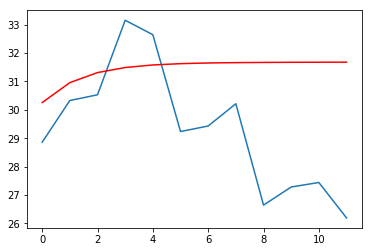

   ========== t = 94 ; D = 12 ========
d = 1:: predicted=30.799970, expected=30.329310
d = 2:: predicted=31.037080, expected=30.531240
d = 3:: predicted=31.156867, expected=33.159400
d = 4:: predicted=31.217725, expected=32.649350
d = 5:: predicted=31.248966, expected=29.235390
d = 6:: predicted=31.265356, expected=29.430310
d = 7:: predicted=31.274259, expected=30.215250
d = 8:: predicted=31.279402, expected=26.641220
d = 9:: predicted=31.282674, expected=27.279640
d = 10:: predicted=31.284995, expected=27.438580
d = 11:: predicted=31.286841, expected=26.189530
d = 12:: predicted=31.288444, expected=26.351500


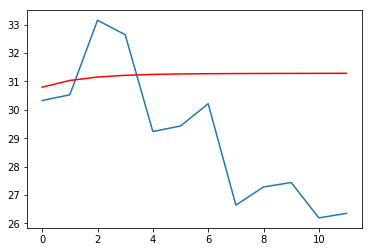

   ========== t = 95 ; D = 12 ========
d = 1:: predicted=30.816834, expected=30.531240
d = 2:: predicted=30.960964, expected=33.159400
d = 3:: predicted=31.034030, expected=32.649350
d = 4:: predicted=31.071416, expected=29.235390
d = 5:: predicted=31.090873, expected=29.430310
d = 6:: predicted=31.101306, expected=30.215250
d = 7:: predicted=31.107230, expected=26.641220
d = 8:: predicted=31.110892, expected=27.279640
d = 9:: predicted=31.113403, expected=27.438580
d = 10:: predicted=31.115343, expected=26.189530
d = 11:: predicted=31.116989, expected=26.351500
d = 12:: predicted=31.118481, expected=27.466050


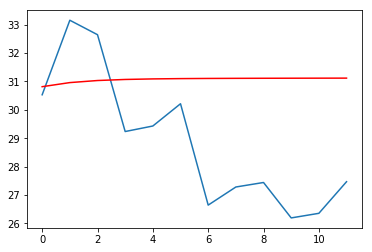

   ========== t = 96 ; D = 12 ========
d = 1:: predicted=32.291858, expected=33.159400
d = 2:: predicted=31.856753, expected=32.649350
d = 3:: predicted=31.638861, expected=29.235390
d = 4:: predicted=31.530078, expected=29.430310
d = 5:: predicted=31.476124, expected=30.215250
d = 6:: predicted=31.449706, expected=26.641220
d = 7:: predicted=31.437114, expected=27.279640
d = 8:: predicted=31.431466, expected=27.438580
d = 9:: predicted=31.429320, expected=26.189530
d = 10:: predicted=31.428919, expected=26.351500
d = 11:: predicted=31.429413, expected=27.466050
d = 12:: predicted=31.430327, expected=24.271150


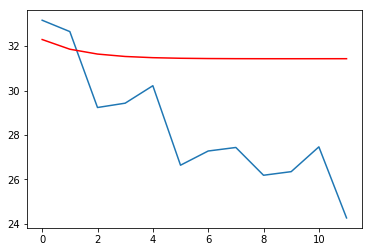

   ========== t = 97 ; D = 12 ========
d = 1:: predicted=32.202235, expected=32.649350
d = 2:: predicted=31.978316, expected=29.235390
d = 3:: predicted=31.866518, expected=29.430310
d = 4:: predicted=31.811058, expected=30.215250
d = 5:: predicted=31.783880, expected=26.641220
d = 6:: predicted=31.770932, expected=27.279640
d = 7:: predicted=31.765107, expected=27.438580
d = 8:: predicted=31.762863, expected=26.189530
d = 9:: predicted=31.762450, expected=26.351500
d = 10:: predicted=31.762934, expected=27.466050
d = 11:: predicted=31.763853, expected=24.271150
d = 12:: predicted=31.764999, expected=25.129350


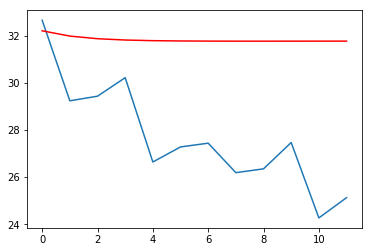

   ========== t = 98 ; D = 12 ========
d = 1:: predicted=30.321437, expected=29.235390
d = 2:: predicted=30.867682, expected=29.430310
d = 3:: predicted=31.142762, expected=30.215250
d = 4:: predicted=31.281625, expected=26.641220
d = 5:: predicted=31.352062, expected=27.279640
d = 6:: predicted=31.388112, expected=27.438580
d = 7:: predicted=31.406915, expected=26.189530
d = 8:: predicted=31.417025, expected=26.351500
d = 9:: predicted=31.422793, expected=27.466050
d = 10:: predicted=31.426375, expected=24.271150
d = 11:: predicted=31.428855, expected=25.129350
d = 12:: predicted=31.430782, expected=26.453970


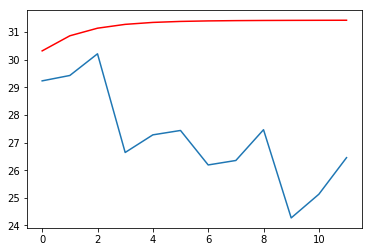

   ========== t = 99 ; D = 12 ========
d = 1:: predicted=30.192179, expected=29.430310
d = 2:: predicted=30.575566, expected=30.215250
d = 3:: predicted=30.768818, expected=26.641220
d = 4:: predicted=30.866570, expected=27.279640
d = 5:: predicted=30.916348, expected=27.438580
d = 6:: predicted=30.942011, expected=26.189530
d = 7:: predicted=30.955596, expected=26.351500
d = 8:: predicted=30.963063, expected=27.466050
d = 9:: predicted=30.967484, expected=24.271150
d = 10:: predicted=30.970387, expected=25.129350
d = 11:: predicted=30.972511, expected=26.453970
d = 12:: predicted=30.974240, expected=26.772830


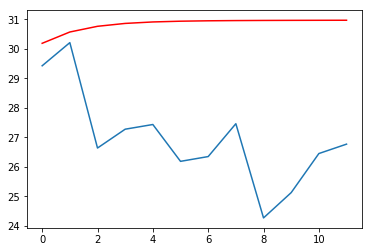

   ========== t = 100 ; D = 12 ========
d = 1:: predicted=30.481843, expected=30.215250
d = 2:: predicted=30.616419, expected=26.641220
d = 3:: predicted=30.684687, expected=27.279640
d = 4:: predicted=30.719646, expected=27.438580
d = 5:: predicted=30.737859, expected=26.189530
d = 6:: predicted=30.747692, expected=26.351500
d = 7:: predicted=30.753283, expected=27.466050
d = 8:: predicted=30.756759, expected=24.271150
d = 9:: predicted=30.759171, expected=25.129350
d = 10:: predicted=30.761035, expected=26.453970
d = 11:: predicted=30.762640, expected=26.772830
d = 12:: predicted=30.764116, expected=27.172270


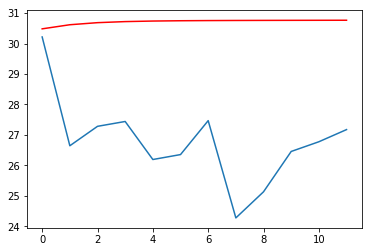

   ========== t = 101 ; D = 12 ========
d = 1:: predicted=28.342626, expected=26.641220
d = 2:: predicted=29.197933, expected=27.279640
d = 3:: predicted=29.628227, expected=27.438580
d = 4:: predicted=29.845025, expected=26.189530
d = 5:: predicted=29.954585, expected=26.351500
d = 6:: predicted=30.010263, expected=27.466050
d = 7:: predicted=30.038886, expected=24.271150
d = 8:: predicted=30.053891, expected=25.129350
d = 9:: predicted=30.062075, expected=26.453970
d = 10:: predicted=30.066823, expected=26.772830
d = 11:: predicted=30.069849, expected=27.172270
d = 12:: predicted=30.072026, expected=26.081410


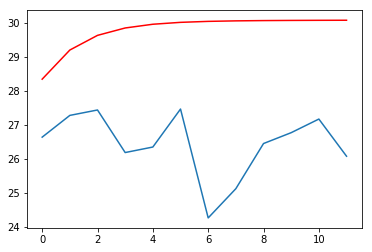

   ========== t = 102 ; D = 12 ========
d = 1:: predicted=28.329670, expected=27.279640
d = 2:: predicted=28.857762, expected=27.438580
d = 3:: predicted=29.123660, expected=26.189530
d = 4:: predicted=29.257875, expected=26.351500
d = 5:: predicted=29.325905, expected=27.466050
d = 6:: predicted=29.360706, expected=24.271150
d = 7:: predicted=29.378818, expected=25.129350
d = 8:: predicted=29.388537, expected=26.453970
d = 9:: predicted=29.394043, expected=26.772830
d = 10:: predicted=29.397436, expected=27.172270
d = 11:: predicted=29.399769, expected=26.081410
d = 12:: predicted=29.401563, expected=24.862220


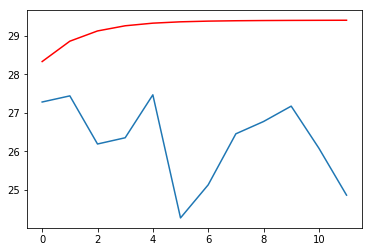

   ========== t = 103 ; D = 12 ========
d = 1:: predicted=28.187107, expected=27.438580
d = 2:: predicted=28.563739, expected=26.189530
d = 3:: predicted=28.753549, expected=26.351500
d = 4:: predicted=28.849513, expected=27.466050
d = 5:: predicted=28.898329, expected=24.271150
d = 6:: predicted=28.923461, expected=25.129350
d = 7:: predicted=28.936703, expected=26.453970
d = 8:: predicted=28.943975, expected=26.772830
d = 9:: predicted=28.948235, expected=27.172270
d = 10:: predicted=28.950993, expected=26.081410
d = 11:: predicted=28.952988, expected=24.862220
d = 12:: predicted=28.954594, expected=25.482190


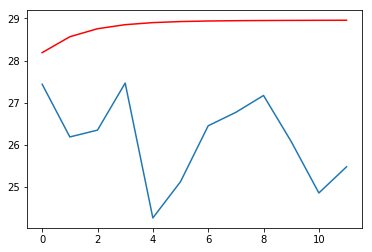

   ========== t = 104 ; D = 12 ========
d = 1:: predicted=27.292552, expected=26.189530
d = 2:: predicted=27.847237, expected=26.351500
d = 3:: predicted=28.126474, expected=27.466050
d = 4:: predicted=28.267331, expected=24.271150
d = 5:: predicted=28.338708, expected=25.129350
d = 6:: predicted=28.375137, expected=26.453970
d = 7:: predicted=28.394048, expected=26.772830
d = 8:: predicted=28.404144, expected=27.172270
d = 9:: predicted=28.409806, expected=26.081410
d = 10:: predicted=28.413259, expected=24.862220
d = 11:: predicted=28.415595, expected=25.482190
d = 12:: predicted=28.417373, expected=26.306550


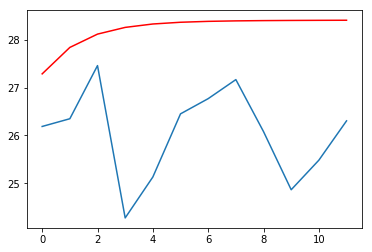

   ========== t = 105 ; D = 12 ========
d = 1:: predicted=27.139231, expected=26.351500
d = 2:: predicted=27.535522, expected=27.466050
d = 3:: predicted=27.735171, expected=24.271150
d = 4:: predicted=27.836061, expected=25.129350
d = 5:: predicted=27.887325, expected=26.453970
d = 6:: predicted=27.913658, expected=26.772830
d = 7:: predicted=27.927473, expected=27.172270
d = 8:: predicted=27.935005, expected=26.081410
d = 9:: predicted=27.939377, expected=24.862220
d = 10:: predicted=27.942150, expected=25.482190
d = 11:: predicted=27.944134, expected=26.306550
d = 12:: predicted=27.945725, expected=24.917840


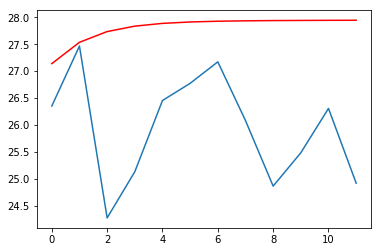

   ========== t = 106 ; D = 12 ========
d = 1:: predicted=27.614295, expected=27.466050
d = 2:: predicted=27.689334, expected=24.271150
d = 3:: predicted=27.727619, expected=25.129350
d = 4:: predicted=27.747444, expected=26.453970
d = 5:: predicted=27.757976, expected=26.772830
d = 6:: predicted=27.763854, expected=27.172270
d = 7:: predicted=27.767397, expected=26.081410
d = 8:: predicted=27.769753, expected=24.862220
d = 9:: predicted=27.771512, expected=25.482190
d = 10:: predicted=27.772980, expected=26.306550
d = 11:: predicted=27.774296, expected=24.917840
d = 12:: predicted=27.775552, expected=26.108090


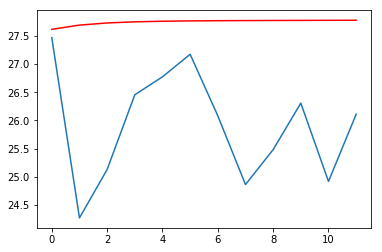

   ========== t = 107 ; D = 12 ========
d = 1:: predicted=25.722659, expected=24.271150
d = 2:: predicted=26.452370, expected=25.129350
d = 3:: predicted=26.819496, expected=26.453970
d = 4:: predicted=27.004483, expected=26.772830
d = 5:: predicted=27.097971, expected=27.172270
d = 6:: predicted=27.145499, expected=26.081410
d = 7:: predicted=27.169943, expected=24.862220
d = 8:: predicted=27.182795, expected=25.482190
d = 9:: predicted=27.189813, expected=26.306550
d = 10:: predicted=27.193902, expected=24.917840
d = 11:: predicted=27.196527, expected=26.108090
d = 12:: predicted=27.198408, expected=29.129050


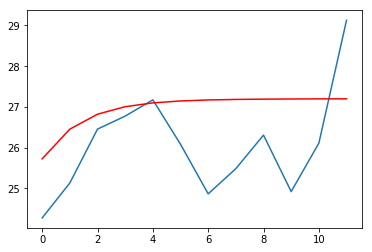

   ========== t = 108 ; D = 12 ========
d = 1:: predicted=25.894724, expected=25.129350
d = 2:: predicted=26.279754, expected=26.453970
d = 3:: predicted=26.473720, expected=26.772830
d = 4:: predicted=26.571718, expected=27.172270
d = 5:: predicted=26.621494, expected=26.081410
d = 6:: predicted=26.647059, expected=24.862220
d = 7:: predicted=26.660444, expected=25.482190
d = 8:: predicted=26.667722, expected=26.306550
d = 9:: predicted=26.671928, expected=24.917840
d = 10:: predicted=26.674582, expected=26.108090
d = 11:: predicted=26.676471, expected=29.129050
d = 12:: predicted=26.677962, expected=19.927720


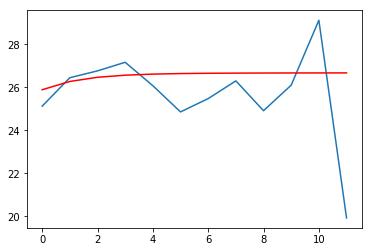

   ========== t = 109 ; D = 12 ========
d = 1:: predicted=26.497127, expected=26.453970
d = 2:: predicted=26.519359, expected=26.772830
d = 3:: predicted=26.531073, expected=27.172270
d = 4:: predicted=26.537506, expected=26.081410
d = 5:: predicted=26.541292, expected=24.862220
d = 6:: predicted=26.543742, expected=25.482190
d = 7:: predicted=26.545512, expected=26.306550
d = 8:: predicted=26.546954, expected=24.917840
d = 9:: predicted=26.548223, expected=26.108090
d = 10:: predicted=26.549409, expected=29.129050
d = 11:: predicted=26.550551, expected=19.927720
d = 12:: predicted=26.551668, expected=21.945040


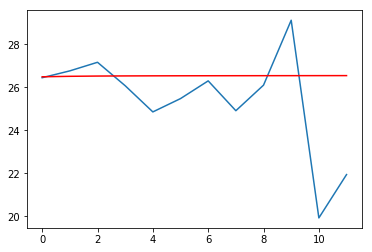

   ========== t = 110 ; D = 12 ========
d = 1:: predicted=26.679389, expected=26.772830
d = 2:: predicted=26.633018, expected=27.172270
d = 3:: predicted=26.610257, expected=26.081410
d = 4:: predicted=26.599374, expected=24.862220
d = 5:: predicted=26.594455, expected=25.482190
d = 6:: predicted=26.592532, expected=26.306550
d = 7:: predicted=26.592115, expected=24.917840
d = 8:: predicted=26.592451, expected=26.108090
d = 9:: predicted=26.593161, expected=29.129050
d = 10:: predicted=26.594074, expected=19.927720
d = 11:: predicted=26.595075, expected=21.945040
d = 12:: predicted=26.596134, expected=24.510980


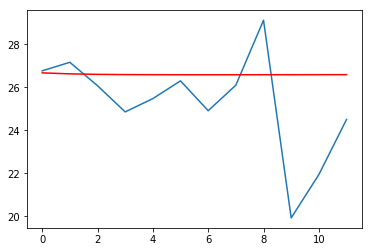

   ========== t = 111 ; D = 12 ========
d = 1:: predicted=26.940196, expected=27.172270
d = 2:: predicted=26.824178, expected=26.081410
d = 3:: predicted=26.766435, expected=24.862220
d = 4:: predicted=26.737990, expected=25.482190
d = 5:: predicted=26.724251, expected=26.306550
d = 6:: predicted=26.717895, expected=24.917840
d = 7:: predicted=26.715255, expected=26.108090
d = 8:: predicted=26.714497, expected=29.129050
d = 9:: predicted=26.714648, expected=19.927720
d = 10:: predicted=26.715288, expected=21.945040
d = 11:: predicted=26.716163, expected=24.510980
d = 12:: predicted=26.717151, expected=23.412120


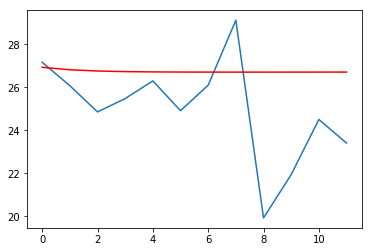

   ========== t = 112 ; D = 12 ========
d = 1:: predicted=26.363573, expected=26.081410
d = 2:: predicted=26.505837, expected=24.862220
d = 3:: predicted=26.577858, expected=25.482190
d = 4:: predicted=26.614594, expected=26.306550
d = 5:: predicted=26.633607, expected=24.917840
d = 6:: predicted=26.643703, expected=26.108090
d = 7:: predicted=26.649318, expected=29.129050
d = 8:: predicted=26.652688, expected=19.927720
d = 9:: predicted=26.654956, expected=21.945040
d = 10:: predicted=26.656624, expected=24.510980
d = 11:: predicted=26.658006, expected=23.412120
d = 12:: predicted=26.659254, expected=24.644800


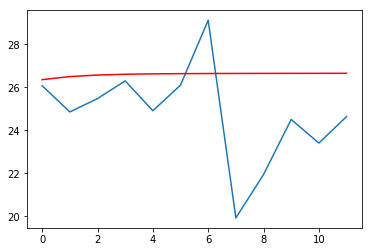

   ========== t = 113 ; D = 12 ========
d = 1:: predicted=25.593344, expected=24.862220
d = 2:: predicted=25.961140, expected=25.482190
d = 3:: predicted=26.146457, expected=26.306550
d = 4:: predicted=26.240086, expected=24.917840
d = 5:: predicted=26.287664, expected=26.108090
d = 6:: predicted=26.312104, expected=29.129050
d = 7:: predicted=26.324914, expected=19.927720
d = 8:: predicted=26.331902, expected=21.945040
d = 9:: predicted=26.335949, expected=24.510980
d = 10:: predicted=26.338499, expected=23.412120
d = 11:: predicted=26.340348, expected=24.644800
d = 12:: predicted=26.341817, expected=25.844780


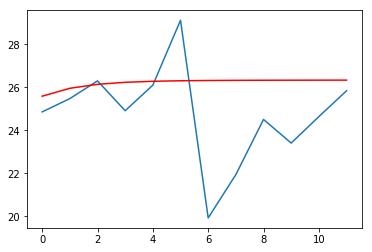

   ========== t = 114 ; D = 12 ========
d = 1:: predicted=25.792412, expected=25.482190
d = 2:: predicted=25.948798, expected=26.306550
d = 3:: predicted=26.027878, expected=24.917840
d = 4:: predicted=26.068146, expected=26.108090
d = 5:: predicted=26.088903, expected=29.129050
d = 6:: predicted=26.099858, expected=19.927720
d = 7:: predicted=26.105904, expected=21.945040
d = 8:: predicted=26.109476, expected=24.510980
d = 9:: predicted=26.111806, expected=23.412120
d = 10:: predicted=26.113521, expected=24.644800
d = 11:: predicted=26.114910, expected=25.844780
d = 12:: predicted=26.116141, expected=26.198700


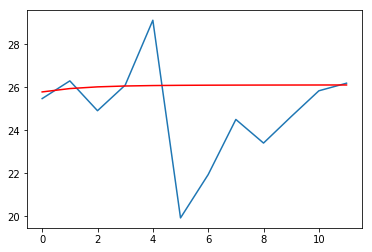

   ========== t = 115 ; D = 12 ========
d = 1:: predicted=26.207814, expected=26.306550
d = 2:: predicted=26.158737, expected=24.917840
d = 3:: predicted=26.134632, expected=26.108090
d = 4:: predicted=26.123046, expected=29.129050
d = 5:: predicted=26.117769, expected=19.927720
d = 6:: predicted=26.115652, expected=21.945040
d = 7:: predicted=26.115113, expected=24.510980
d = 8:: predicted=26.115386, expected=23.412120
d = 9:: predicted=26.116061, expected=24.644800
d = 10:: predicted=26.116923, expected=25.844780
d = 11:: predicted=26.117893, expected=26.198700
d = 12:: predicted=26.118907, expected=27.270480


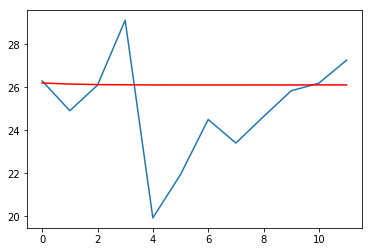

   ========== t = 116 ; D = 12 ========
d = 1:: predicted=25.426413, expected=24.917840
d = 2:: predicted=25.682433, expected=26.108090
d = 3:: predicted=25.811571, expected=29.129050
d = 4:: predicted=25.876985, expected=19.927720
d = 5:: predicted=25.910367, expected=21.945040
d = 6:: predicted=25.927654, expected=24.510980
d = 7:: predicted=25.936872, expected=23.412120
d = 8:: predicted=25.942031, expected=24.644800
d = 9:: predicted=25.945149, expected=25.844780
d = 10:: predicted=25.947253, expected=26.198700
d = 11:: predicted=25.948838, expected=27.270480
d = 12:: predicted=25.950170, expected=29.021400


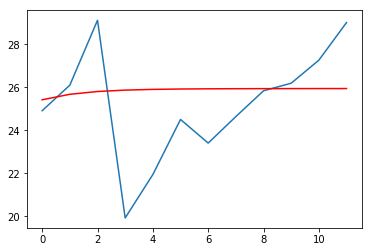

   ========== t = 117 ; D = 12 ========
d = 1:: predicted=26.009450, expected=26.108090
d = 2:: predicted=25.960425, expected=29.129050
d = 3:: predicted=25.936321, expected=19.927720
d = 4:: predicted=25.924752, expected=21.945040
d = 5:: predicted=25.919470, expected=24.510980
d = 6:: predicted=25.917340, expected=23.412120
d = 7:: predicted=25.916796, expected=24.644800
d = 8:: predicted=25.917056, expected=25.844780
d = 9:: predicted=25.917719, expected=26.198700
d = 10:: predicted=25.918575, expected=27.270480
d = 11:: predicted=25.919525, expected=29.021400
d = 12:: predicted=25.920538, expected=26.871840


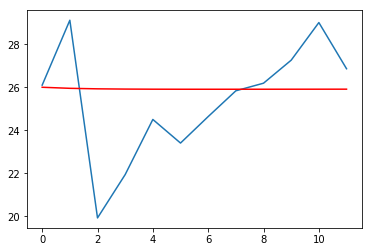

   ========== t = 118 ; D = 12 ========
d = 1:: predicted=27.800698, expected=29.129050
d = 2:: predicted=27.133951, expected=19.927720
d = 3:: predicted=26.799558, expected=21.945040
d = 4:: predicted=26.632130, expected=24.510980
d = 5:: predicted=26.548565, expected=23.412120
d = 6:: predicted=26.507138, expected=24.644800
d = 7:: predicted=26.486868, expected=25.844780
d = 8:: predicted=26.477224, expected=26.198700
d = 9:: predicted=26.472913, expected=27.270480
d = 10:: predicted=26.471293, expected=29.021400
d = 11:: predicted=26.471037, expected=26.871840
d = 12:: predicted=26.471441, expected=25.973350


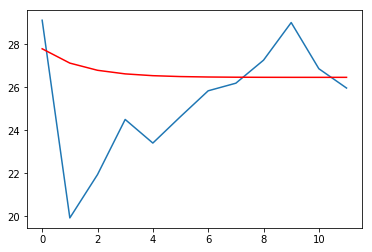

   ========== t = 119 ; D = 12 ========
d = 1:: predicted=22.745126, expected=19.927720
d = 2:: predicted=24.160907, expected=21.945040
d = 3:: predicted=24.872640, expected=24.510980
d = 4:: predicted=25.230694, expected=23.412120
d = 5:: predicted=25.411073, expected=24.644800
d = 6:: predicted=25.502196, expected=25.844780
d = 7:: predicted=25.548502, expected=26.198700
d = 8:: predicted=25.572278, expected=27.270480
d = 9:: predicted=25.584748, expected=29.021400
d = 10:: predicted=25.591530, expected=26.871840
d = 11:: predicted=25.595450, expected=25.973350
d = 12:: predicted=25.597936, expected=28.756540


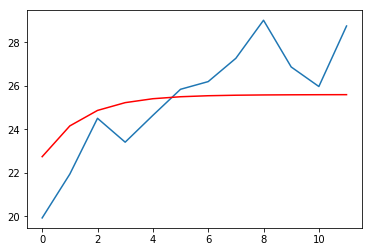

   ========== t = 120 ; D = 12 ========
d = 1:: predicted=23.277677, expected=21.945040
d = 2:: predicted=23.947613, expected=24.510980
d = 3:: predicted=24.284628, expected=23.412120
d = 4:: predicted=24.454433, expected=24.644800
d = 5:: predicted=24.540220, expected=25.844780
d = 6:: predicted=24.583801, expected=26.198700
d = 7:: predicted=24.606172, expected=27.270480
d = 8:: predicted=24.617919, expected=29.021400
d = 9:: predicted=24.624318, expected=26.871840
d = 10:: predicted=24.628020, expected=25.973350
d = 11:: predicted=24.630373, expected=28.756540
d = 12:: predicted=24.632051, expected=25.571750


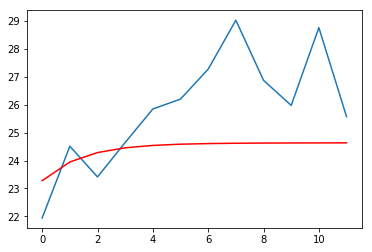

   ========== t = 121 ; D = 12 ========
d = 1:: predicted=24.472715, expected=24.510980
d = 2:: predicted=24.453982, expected=23.412120
d = 3:: predicted=24.445061, expected=24.644800
d = 4:: predicted=24.441069, expected=25.844780
d = 5:: predicted=24.439543, expected=26.198700
d = 6:: predicted=24.439263, expected=27.270480
d = 7:: predicted=24.439609, expected=29.021400
d = 8:: predicted=24.440282, expected=26.871840
d = 9:: predicted=24.441129, expected=25.973350
d = 10:: predicted=24.442023, expected=28.756540
d = 11:: predicted=24.442972, expected=25.571750
d = 12:: predicted=24.443926, expected=25.096090


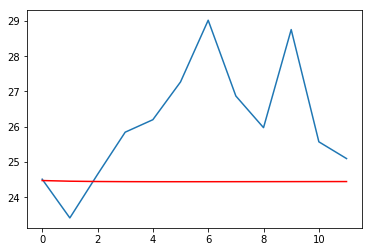

   ========== t = 122 ; D = 12 ========
d = 1:: predicted=23.845967, expected=23.412120
d = 2:: predicted=24.064382, expected=24.644800
d = 3:: predicted=24.174588, expected=25.844780
d = 4:: predicted=24.230435, expected=26.198700
d = 5:: predicted=24.258971, expected=27.270480
d = 6:: predicted=24.273805, expected=29.021400
d = 7:: predicted=24.281728, expected=26.871840
d = 8:: predicted=24.286182, expected=25.973350
d = 9:: predicted=24.288903, expected=28.756540
d = 10:: predicted=24.290766, expected=25.571750
d = 11:: predicted=24.292180, expected=25.096090
d = 12:: predicted=24.293385, expected=25.875160


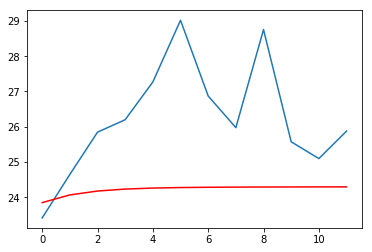

   ========== t = 123 ; D = 12 ========
d = 1:: predicted=24.470480, expected=24.644800
d = 2:: predicted=24.383396, expected=25.844780
d = 3:: predicted=24.340134, expected=26.198700
d = 4:: predicted=24.318884, expected=27.270480
d = 5:: predicted=24.308707, expected=29.021400
d = 6:: predicted=24.304072, expected=26.871840
d = 7:: predicted=24.302232, expected=25.973350
d = 8:: predicted=24.301790, expected=28.756540
d = 9:: predicted=24.302043, expected=25.571750
d = 10:: predicted=24.302657, expected=25.096090
d = 11:: predicted=24.303452, expected=25.875160
d = 12:: predicted=24.304337, expected=28.205170


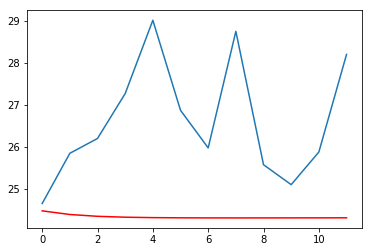

   ========== t = 124 ; D = 12 ========
d = 1:: predicted=25.216287, expected=25.844780
d = 2:: predicted=24.901072, expected=26.198700
d = 3:: predicted=24.743214, expected=27.270480
d = 4:: predicted=24.664408, expected=29.021400
d = 5:: predicted=24.625312, expected=26.871840
d = 6:: predicted=24.606163, expected=25.973350
d = 7:: predicted=24.597040, expected=28.756540
d = 8:: predicted=24.592952, expected=25.571750
d = 9:: predicted=24.591373, expected=25.096090
d = 10:: predicted=24.591077, expected=25.875160
d = 11:: predicted=24.591417, expected=28.205170
d = 12:: predicted=24.592089, expected=26.700810


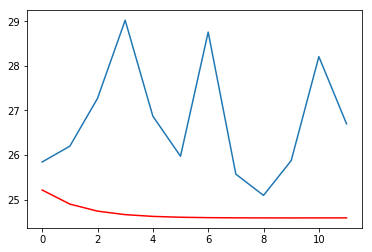

   ========== t = 125 ; D = 12 ========
d = 1:: predicted=25.573386, expected=26.198700
d = 2:: predicted=25.259771, expected=27.270480
d = 3:: predicted=25.102729, expected=29.021400
d = 4:: predicted=25.024334, expected=26.871840
d = 5:: predicted=24.985460, expected=25.973350
d = 6:: predicted=24.966434, expected=28.756540
d = 7:: predicted=24.957378, expected=25.571750
d = 8:: predicted=24.953329, expected=25.096090
d = 9:: predicted=24.951807, expected=25.875160
d = 10:: predicted=24.951536, expected=28.205170
d = 11:: predicted=24.951895, expected=26.700810
d = 12:: predicted=24.952581, expected=25.742740


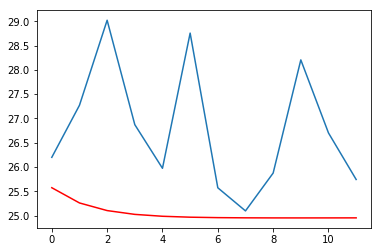

   ========== t = 126 ; D = 12 ========
d = 1:: predicted=26.348675, expected=27.270480
d = 2:: predicted=25.886126, expected=29.021400
d = 3:: predicted=25.654284, expected=26.871840
d = 4:: predicted=25.538334, expected=25.973350
d = 5:: predicted=25.480606, expected=28.756540
d = 6:: predicted=25.452117, expected=25.571750
d = 7:: predicted=25.438318, expected=25.096090
d = 8:: predicted=25.431880, expected=25.875160
d = 9:: predicted=25.429171, expected=28.205170
d = 10:: predicted=25.428324, expected=26.700810
d = 11:: predicted=25.428411, expected=25.742740
d = 12:: predicted=25.428965, expected=24.832550


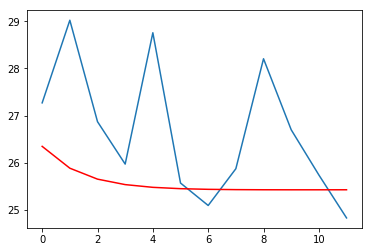

   ========== t = 127 ; D = 12 ========
d = 1:: predicted=27.588731, expected=29.021400
d = 2:: predicted=26.869599, expected=26.871840
d = 3:: predicted=26.508874, expected=25.973350
d = 4:: predicted=26.328194, expected=28.756540
d = 5:: predicted=26.237968, expected=25.571750
d = 6:: predicted=26.193170, expected=25.096090
d = 7:: predicted=26.171199, expected=25.875160
d = 8:: predicted=26.160699, expected=28.205170
d = 9:: predicted=26.155952, expected=26.700810
d = 10:: predicted=26.154091, expected=25.742740
d = 11:: predicted=26.153682, expected=24.832550
d = 12:: predicted=26.154020, expected=26.516170


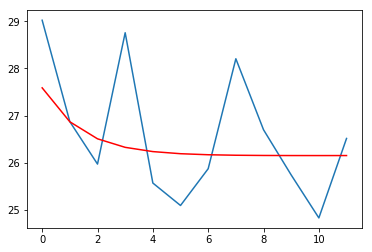

   ========== t = 128 ; D = 12 ========
d = 1:: predicted=26.671291, expected=26.871840
d = 2:: predicted=26.571086, expected=25.973350
d = 3:: predicted=26.521298, expected=28.756540
d = 4:: predicted=26.496828, expected=25.571750
d = 5:: predicted=26.485080, expected=25.096090
d = 6:: predicted=26.479704, expected=25.875160
d = 7:: predicted=26.477545, expected=28.205170
d = 8:: predicted=26.477005, expected=26.700810
d = 9:: predicted=26.477263, expected=25.742740
d = 10:: predicted=26.477935, expected=24.832550
d = 11:: predicted=26.478805, expected=26.516170
d = 12:: predicted=26.479774, expected=27.752160


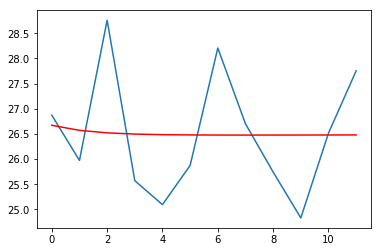

   ========== t = 129 ; D = 12 ========
d = 1:: predicted=26.199469, expected=25.973350
d = 2:: predicted=26.313594, expected=28.756540
d = 3:: predicted=26.371453, expected=25.571750
d = 4:: predicted=26.401051, expected=25.096090
d = 5:: predicted=26.416467, expected=25.875160
d = 6:: predicted=26.424741, expected=28.205170
d = 7:: predicted=26.429439, expected=26.700810
d = 8:: predicted=26.432324, expected=25.742740
d = 9:: predicted=26.434320, expected=24.832550
d = 10:: predicted=26.435861, expected=26.516170
d = 11:: predicted=26.437160, expected=27.752160
d = 12:: predicted=26.438356, expected=28.199490


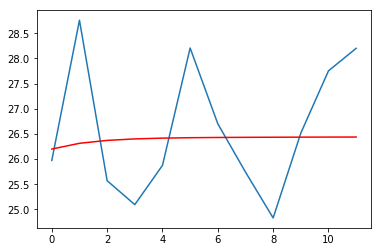

   ========== t = 130 ; D = 12 ========
d = 1:: predicted=27.777129, expected=28.756540
d = 2:: predicted=27.285671, expected=25.571750
d = 3:: predicted=27.039350, expected=25.096090
d = 4:: predicted=26.916157, expected=25.875160
d = 5:: predicted=26.854818, expected=28.205170
d = 6:: predicted=26.824558, expected=26.700810
d = 7:: predicted=26.809897, expected=25.742740
d = 8:: predicted=26.803094, expected=24.832550
d = 9:: predicted=26.800216, expected=26.516170
d = 10:: predicted=26.799307, expected=27.752160
d = 11:: predicted=26.799395, expected=28.199490
d = 12:: predicted=26.799989, expected=26.955960


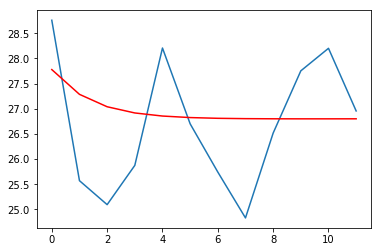

   ========== t = 131 ; D = 12 ========
d = 1:: predicted=26.151267, expected=25.571750
d = 2:: predicted=26.442917, expected=25.096090
d = 3:: predicted=26.589982, expected=25.875160
d = 4:: predicted=26.664397, expected=28.205170
d = 5:: predicted=26.702327, expected=26.700810
d = 6:: predicted=26.721921, expected=25.742740
d = 7:: predicted=26.732309, expected=24.832550
d = 8:: predicted=26.738080, expected=26.516170
d = 9:: predicted=26.741518, expected=27.752160
d = 10:: predicted=26.743784, expected=28.199490
d = 11:: predicted=26.745451, expected=26.955960
d = 12:: predicted=26.746842, expected=28.815770


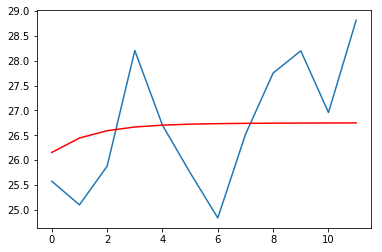

   ========== t = 132 ; D = 12 ========
d = 1:: predicted=25.746150, expected=25.096090
d = 2:: predicted=26.073237, expected=25.875160
d = 3:: predicted=26.238066, expected=28.205170
d = 4:: predicted=26.321413, expected=26.700810
d = 5:: predicted=26.363823, expected=25.742740
d = 6:: predicted=26.385653, expected=24.832550
d = 7:: predicted=26.397162, expected=26.516170
d = 8:: predicted=26.403487, expected=27.752160
d = 9:: predicted=26.407180, expected=28.199490
d = 10:: predicted=26.409591, expected=26.955960
d = 11:: predicted=26.411322, expected=28.815770
d = 12:: predicted=26.412733, expected=27.287110


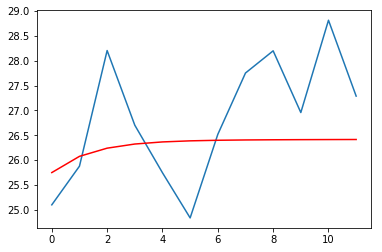

   ========== t = 133 ; D = 12 ========
d = 1:: predicted=26.056680, expected=25.875160
d = 2:: predicted=26.148389, expected=28.205170
d = 3:: predicted=26.195015, expected=26.700810
d = 4:: predicted=26.218952, expected=25.742740
d = 5:: predicted=26.231511, expected=24.832550
d = 6:: predicted=26.238354, expected=26.516170
d = 7:: predicted=26.242323, expected=27.752160
d = 8:: predicted=26.244850, expected=28.199490
d = 9:: predicted=26.246649, expected=26.955960
d = 10:: predicted=26.248075, expected=28.815770
d = 11:: predicted=26.249336, expected=27.287110
d = 12:: predicted=26.250491, expected=26.610820


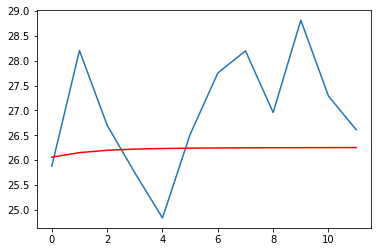

   ========== t = 134 ; D = 12 ========
d = 1:: predicted=27.380176, expected=28.205170
d = 2:: predicted=26.966289, expected=26.700810
d = 3:: predicted=26.758912, expected=25.742740
d = 4:: predicted=26.655287, expected=24.832550
d = 5:: predicted=26.603771, expected=26.516170
d = 6:: predicted=26.578422, expected=27.752160
d = 7:: predicted=26.566240, expected=28.199490
d = 8:: predicted=26.560654, expected=26.955960
d = 9:: predicted=26.558379, expected=28.815770
d = 10:: predicted=26.557768, expected=27.287110
d = 11:: predicted=26.558006, expected=26.610820
d = 12:: predicted=26.558654, expected=27.188760


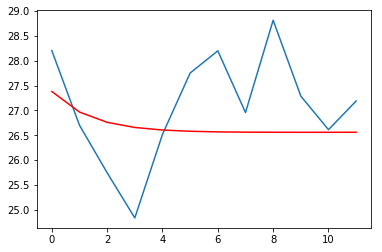

   ========== t = 135 ; D = 12 ========
d = 1:: predicted=26.698981, expected=26.700810
d = 2:: predicted=26.698602, expected=25.742740
d = 3:: predicted=26.698962, expected=24.832550
d = 4:: predicted=26.699699, expected=26.516170
d = 5:: predicted=26.700598, expected=27.752160
d = 6:: predicted=26.701588, expected=28.199490
d = 7:: predicted=26.702632, expected=26.955960
d = 8:: predicted=26.703692, expected=28.815770
d = 9:: predicted=26.704770, expected=27.287110
d = 10:: predicted=26.705844, expected=26.610820
d = 11:: predicted=26.706934, expected=27.188760
d = 12:: predicted=26.708027, expected=25.395090


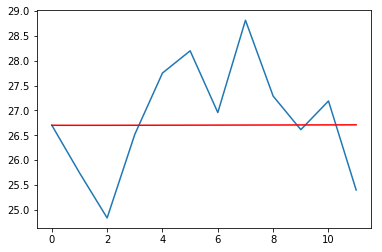

   ========== t = 136 ; D = 12 ========
d = 1:: predicted=26.146567, expected=25.742740
d = 2:: predicted=26.349958, expected=24.832550
d = 3:: predicted=26.452670, expected=26.516170
d = 4:: predicted=26.504814, expected=27.752160
d = 5:: predicted=26.531526, expected=28.199490
d = 6:: predicted=26.545497, expected=26.955960
d = 7:: predicted=26.553050, expected=28.815770
d = 8:: predicted=26.557382, expected=27.287110
d = 9:: predicted=26.560089, expected=26.610820
d = 10:: predicted=26.561996, expected=27.188760
d = 11:: predicted=26.563491, expected=25.395090
d = 12:: predicted=26.564781, expected=27.872850


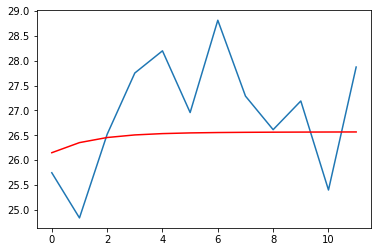

   ========== t = 137 ; D = 12 ========
d = 1:: predicted=25.528404, expected=24.832550
d = 2:: predicted=25.878491, expected=26.516170
d = 3:: predicted=26.054893, expected=27.752160
d = 4:: predicted=26.144027, expected=28.199490
d = 5:: predicted=26.189327, expected=26.955960
d = 6:: predicted=26.212616, expected=28.815770
d = 7:: predicted=26.224848, expected=27.287110
d = 8:: predicted=26.231517, expected=26.610820
d = 9:: predicted=26.235399, expected=27.188760
d = 10:: predicted=26.237887, expected=25.395090
d = 11:: predicted=26.239662, expected=27.872850
d = 12:: predicted=26.241068, expected=28.515160


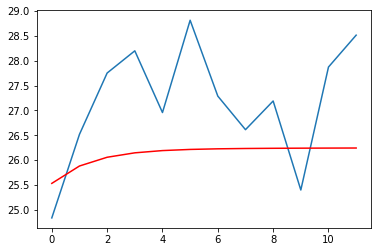

   ========== t = 138 ; D = 12 ========
d = 1:: predicted=26.356057, expected=26.516170
d = 2:: predicted=26.276151, expected=27.752160
d = 3:: predicted=26.236534, expected=28.199490
d = 4:: predicted=26.217164, expected=26.955960
d = 5:: predicted=26.207961, expected=28.815770
d = 6:: predicted=26.203861, expected=27.287110
d = 7:: predicted=26.202343, expected=26.610820
d = 8:: predicted=26.202104, expected=27.188760
d = 9:: predicted=26.202507, expected=25.395090
d = 10:: predicted=26.203248, expected=27.872850
d = 11:: predicted=26.204142, expected=28.515160
d = 12:: predicted=26.205113, expected=27.415990


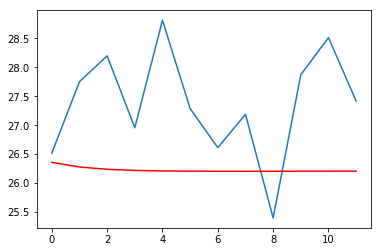

   ========== t = 139 ; D = 12 ========
d = 1:: predicted=27.120077, expected=27.752160
d = 2:: predicted=26.803079, expected=28.199490
d = 3:: predicted=26.644390, expected=26.955960
d = 4:: predicted=26.565192, expected=28.815770
d = 5:: predicted=26.525966, expected=27.287110
d = 6:: predicted=26.506789, expected=26.610820
d = 7:: predicted=26.497701, expected=27.188760
d = 8:: predicted=26.493665, expected=25.395090
d = 9:: predicted=26.492157, expected=27.872850
d = 10:: predicted=26.491947, expected=28.515160
d = 11:: predicted=26.492381, expected=27.415990
d = 12:: predicted=26.493123, expected=28.278940


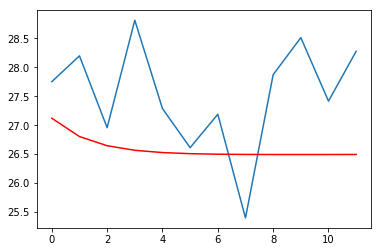

   ========== t = 140 ; D = 12 ========
d = 1:: predicted=27.532979, expected=28.199490
d = 2:: predicted=27.198718, expected=26.955960
d = 3:: predicted=27.031346, expected=28.815770
d = 4:: predicted=26.947827, expected=27.287110
d = 5:: predicted=26.906403, expected=26.610820
d = 6:: predicted=26.886147, expected=27.188760
d = 7:: predicted=26.876507, expected=25.395090
d = 8:: predicted=26.872217, expected=27.872850
d = 9:: predicted=26.870594, expected=28.515160
d = 10:: predicted=26.870332, expected=27.415990
d = 11:: predicted=26.870739, expected=28.278940
d = 12:: predicted=26.871486, expected=34.338340


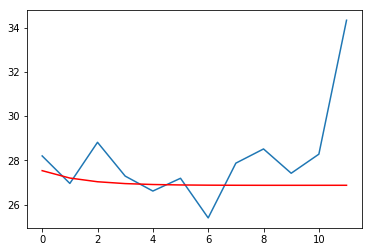

   ========== t = 141 ; D = 12 ========
d = 1:: predicted=26.967452, expected=26.955960
d = 2:: predicted=26.973772, expected=28.815770
d = 3:: predicted=26.977499, expected=27.287110
d = 4:: predicted=26.979920, expected=26.610820
d = 5:: predicted=26.981682, expected=27.188760
d = 6:: predicted=26.983120, expected=25.395090
d = 7:: predicted=26.984382, expected=27.872850
d = 8:: predicted=26.985556, expected=28.515160
d = 9:: predicted=26.986703, expected=27.415990
d = 10:: predicted=26.987826, expected=28.278940
d = 11:: predicted=26.988933, expected=34.338340
d = 12:: predicted=26.990038, expected=38.307910


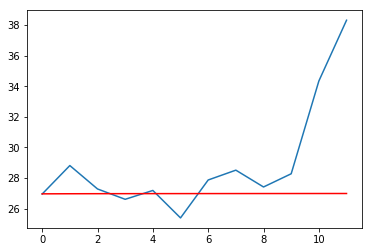

   ========== t = 142 ; D = 12 ========
d = 1:: predicted=28.056035, expected=28.815770
d = 2:: predicted=27.674957, expected=27.287110
d = 3:: predicted=27.484071, expected=26.610820
d = 4:: predicted=27.388738, expected=27.188760
d = 5:: predicted=27.341422, expected=25.395090
d = 6:: predicted=27.318195, expected=27.872850
d = 7:: predicted=27.307078, expected=28.515160
d = 8:: predicted=27.302036, expected=27.415990
d = 9:: predicted=27.300067, expected=28.278940
d = 10:: predicted=27.299627, expected=34.338340
d = 11:: predicted=27.299970, expected=38.307910
d = 12:: predicted=27.300689, expected=39.024700


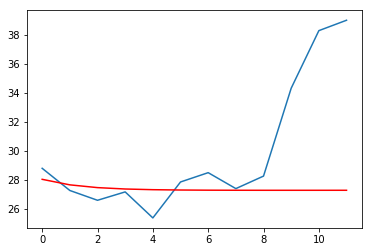

   ========== t = 143 ; D = 12 ========
d = 1:: predicted=27.345790, expected=27.287110
d = 2:: predicted=27.375819, expected=26.610820
d = 3:: predicted=27.391475, expected=27.188760
d = 4:: predicted=27.399888, expected=25.395090
d = 5:: predicted=27.404678, expected=27.872850
d = 6:: predicted=27.407635, expected=28.515160
d = 7:: predicted=27.409682, expected=27.415990
d = 8:: predicted=27.411263, expected=28.278940
d = 9:: predicted=27.412605, expected=34.338340
d = 10:: predicted=27.413822, expected=38.307910
d = 11:: predicted=27.415008, expected=39.024700
d = 12:: predicted=27.416162, expected=38.233750


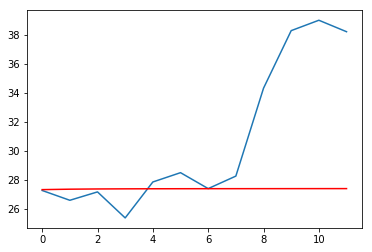

   ========== t = 144 ; D = 12 ========
d = 1:: predicted=26.943958, expected=26.610820
d = 2:: predicted=27.111864, expected=27.188760
d = 3:: predicted=27.196765, expected=25.395090
d = 4:: predicted=27.239975, expected=27.872850
d = 5:: predicted=27.262230, expected=28.515160
d = 6:: predicted=27.273961, expected=27.415990
d = 7:: predicted=27.280409, expected=28.278940
d = 8:: predicted=27.284206, expected=34.338340
d = 9:: predicted=27.286653, expected=38.307910
d = 10:: predicted=27.288447, expected=39.024700
d = 11:: predicted=27.289901, expected=38.233750
d = 12:: predicted=27.291184, expected=39.064050


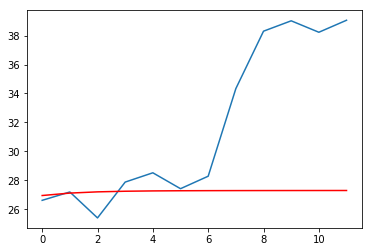

   ========== t = 145 ; D = 12 ========
d = 1:: predicted=27.210514, expected=27.188760
d = 2:: predicted=27.222001, expected=25.395090
d = 3:: predicted=27.228307, expected=27.872850
d = 4:: predicted=27.232031, expected=28.515160
d = 5:: predicted=27.234473, expected=27.415990
d = 6:: predicted=27.236234, expected=28.278940
d = 7:: predicted=27.237677, expected=34.338340
d = 8:: predicted=27.238950, expected=38.307910
d = 9:: predicted=27.240141, expected=39.024700
d = 10:: predicted=27.241291, expected=38.233750
d = 11:: predicted=27.242440, expected=39.064050
d = 12:: predicted=27.243538, expected=29.285390


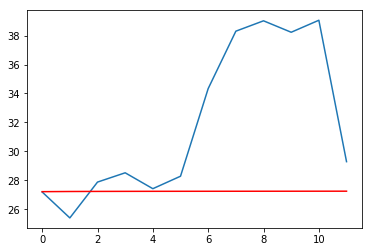

   ========== t = 146 ; D = 12 ========
d = 1:: predicted=26.165263, expected=25.395090
d = 2:: predicted=26.552681, expected=27.872850
d = 3:: predicted=26.747847, expected=28.515160
d = 4:: predicted=26.846420, expected=27.415990
d = 5:: predicted=26.896485, expected=28.278940
d = 6:: predicted=26.922173, expected=34.338340
d = 7:: predicted=26.935624, expected=38.307910
d = 8:: predicted=26.942929, expected=39.024700
d = 9:: predicted=26.947142, expected=38.233750
d = 10:: predicted=26.949805, expected=39.064050
d = 11:: predicted=26.951678, expected=29.285390
d = 12:: predicted=26.953176, expected=31.387700


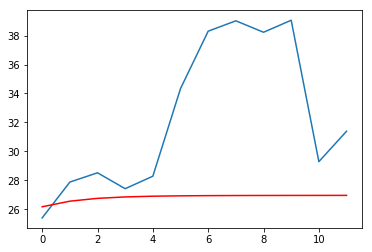

   ========== t = 147 ; D = 12 ========
d = 1:: predicted=27.439243, expected=27.872850
d = 2:: predicted=27.221961, expected=28.515160
d = 3:: predicted=27.113354, expected=27.415990
d = 4:: predicted=27.059328, expected=28.278940
d = 5:: predicted=27.032753, expected=34.338340
d = 6:: predicted=27.019950, expected=38.307910
d = 7:: predicted=27.014061, expected=39.024700
d = 8:: predicted=27.011657, expected=38.233750
d = 9:: predicted=27.010983, expected=39.064050
d = 10:: predicted=27.011184, expected=29.285390
d = 11:: predicted=27.011836, expected=31.387700
d = 12:: predicted=27.012708, expected=29.413660


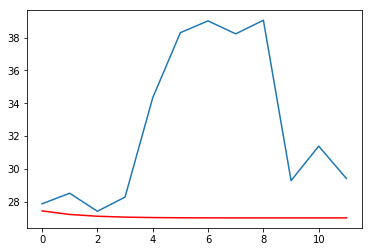

   ========== t = 148 ; D = 12 ========
d = 1:: predicted=27.920200, expected=28.515160
d = 2:: predicted=27.621883, expected=27.415990
d = 3:: predicted=27.472586, expected=28.278940
d = 4:: predicted=27.398143, expected=34.338340
d = 5:: predicted=27.361286, expected=38.307910
d = 6:: predicted=27.343327, expected=39.024700
d = 7:: predicted=27.334864, expected=38.233750
d = 8:: predicted=27.331164, expected=39.064050
d = 9:: predicted=27.329853, expected=29.285390
d = 10:: predicted=27.329749, expected=31.387700
d = 11:: predicted=27.330248, expected=29.413660
d = 12:: predicted=27.331065, expected=30.697530


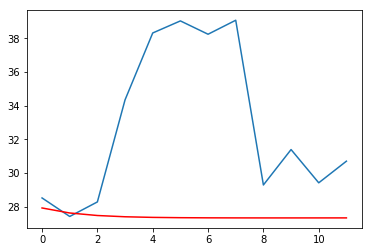

   ========== t = 149 ; D = 12 ========
d = 1:: predicted=27.422481, expected=27.415990
d = 2:: predicted=27.426287, expected=28.278940
d = 3:: predicted=27.428759, expected=34.338340
d = 4:: predicted=27.430558, expected=38.307910
d = 5:: predicted=27.432012, expected=39.024700
d = 6:: predicted=27.433297, expected=38.233750
d = 7:: predicted=27.434514, expected=39.064050
d = 8:: predicted=27.435678, expected=29.285390
d = 9:: predicted=27.436813, expected=31.387700
d = 10:: predicted=27.437928, expected=29.413660
d = 11:: predicted=27.439048, expected=30.697530
d = 12:: predicted=27.440166, expected=30.575230


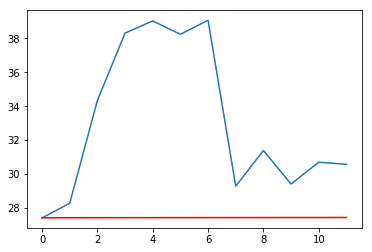

   ========== t = 150 ; D = 12 ========
d = 1:: predicted=27.930713, expected=28.278940
d = 2:: predicted=27.756350, expected=34.338340
d = 3:: predicted=27.669301, expected=38.307910
d = 4:: predicted=27.626146, expected=39.024700
d = 5:: predicted=27.605027, expected=38.233750
d = 6:: predicted=27.594968, expected=39.064050
d = 7:: predicted=27.590478, expected=29.285390
d = 8:: predicted=27.588781, expected=31.387700
d = 9:: predicted=27.588491, expected=29.413660
d = 10:: predicted=27.588912, expected=30.697530
d = 11:: predicted=27.589667, expected=30.575230
d = 12:: predicted=27.590598, expected=30.453000


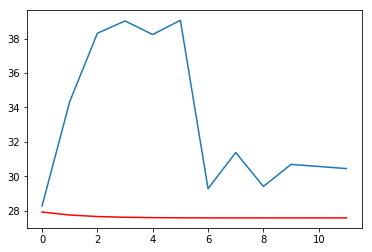

   ========== t = 151 ; D = 12 ========
d = 1:: predicted=31.552592, expected=34.338340
d = 2:: predicted=30.153790, expected=38.307910
d = 3:: predicted=29.451709, expected=39.024700
d = 4:: predicted=29.099604, expected=38.233750
d = 5:: predicted=28.923303, expected=39.064050
d = 6:: predicted=28.835352, expected=29.285390
d = 7:: predicted=28.791749, expected=31.387700
d = 8:: predicted=28.770451, expected=29.413660
d = 9:: predicted=28.760322, expected=30.697530
d = 10:: predicted=28.755837, expected=30.575230
d = 11:: predicted=28.754159, expected=30.453000
d = 12:: predicted=28.753906, expected=71.348000


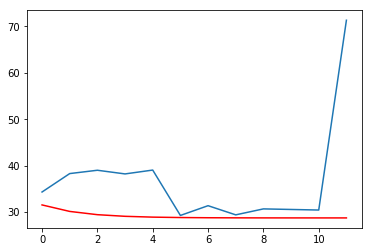

   ========== t = 152 ; D = 12 ========
d = 1:: predicted=34.518110, expected=38.307910
d = 2:: predicted=32.614987, expected=39.024700
d = 3:: predicted=31.659625, expected=38.233750
d = 4:: predicted=31.180349, expected=39.064050
d = 5:: predicted=30.940215, expected=29.285390
d = 6:: predicted=30.820228, expected=31.387700
d = 7:: predicted=30.760595, expected=29.413660
d = 8:: predicted=30.731263, expected=30.697530
d = 9:: predicted=30.717174, expected=30.575230
d = 10:: predicted=30.710729, expected=30.453000
d = 11:: predicted=30.708129, expected=71.348000
d = 12:: predicted=30.707465, expected=112.243810


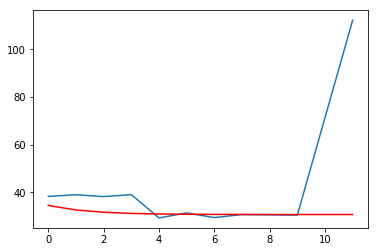

   ========== t = 153 ; D = 12 ========
d = 1:: predicted=35.818186, expected=39.024700
d = 2:: predicted=34.208115, expected=38.233750
d = 3:: predicted=33.400000, expected=39.064050
d = 4:: predicted=32.994731, expected=29.285390
d = 5:: predicted=32.791838, expected=31.387700
d = 6:: predicted=32.690608, expected=29.413660
d = 7:: predicted=32.640448, expected=30.697530
d = 8:: predicted=32.615928, expected=30.575230
d = 9:: predicted=32.604287, expected=30.453000
d = 10:: predicted=32.599131, expected=71.348000
d = 11:: predicted=32.597211, expected=112.243810
d = 12:: predicted=32.596946, expected=91.610840


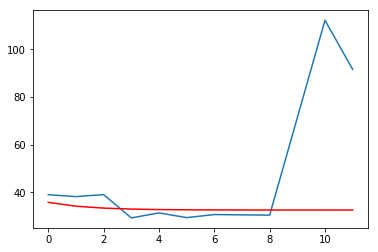

   ========== t = 154 ; D = 12 ========
d = 1:: predicted=36.104521, expected=38.233750
d = 2:: predicted=35.035646, expected=39.064050
d = 3:: predicted=34.499436, expected=29.285390
d = 4:: predicted=34.230792, expected=31.387700
d = 5:: predicted=34.096561, expected=29.413660
d = 6:: predicted=34.029848, expected=30.697530
d = 7:: predicted=33.997055, expected=30.575230
d = 8:: predicted=33.981294, expected=30.453000
d = 9:: predicted=33.974092, expected=71.348000
d = 10:: predicted=33.971191, expected=112.243810
d = 11:: predicted=33.970463, expected=91.610840
d = 12:: predicted=33.970810, expected=70.977870


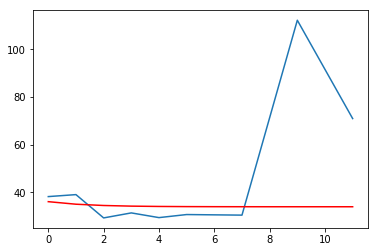

   ========== t = 155 ; D = 12 ========
d = 1:: predicted=37.088491, expected=39.064050
d = 2:: predicted=36.096841, expected=29.285390
d = 3:: predicted=35.599427, expected=31.387700
d = 4:: predicted=35.350316, expected=29.413660
d = 5:: predicted=35.225926, expected=30.697530
d = 6:: predicted=35.164186, expected=30.575230
d = 7:: predicted=35.133918, expected=30.453000
d = 8:: predicted=35.119456, expected=71.348000
d = 9:: predicted=35.112942, expected=112.243810
d = 10:: predicted=35.110402, expected=91.610840
d = 11:: predicted=35.109875, expected=70.977870
d = 12:: predicted=35.110365, expected=90.922890


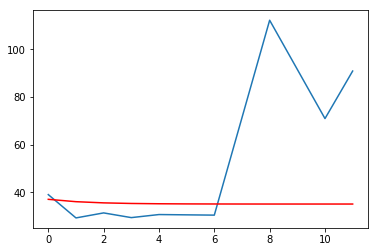

   ========== t = 156 ; D = 12 ========
d = 1:: predicted=31.847778, expected=29.285390
d = 2:: predicted=33.135677, expected=31.387700
d = 3:: predicted=33.783367, expected=29.413660
d = 4:: predicted=34.109441, expected=30.697530
d = 5:: predicted=34.273983, expected=30.575230
d = 6:: predicted=34.357361, expected=30.453000
d = 7:: predicted=34.399995, expected=71.348000
d = 8:: predicted=34.422119, expected=112.243810
d = 9:: predicted=34.433958, expected=91.610840
d = 10:: predicted=34.440650, expected=70.977870
d = 11:: predicted=34.444745, expected=90.922890
d = 12:: predicted=34.447521, expected=76.200970


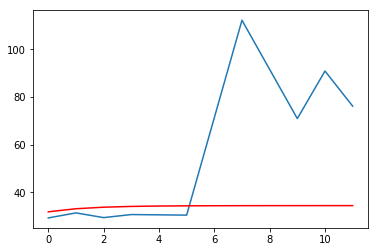

   ========== t = 157 ; D = 12 ========
d = 1:: predicted=32.491148, expected=31.387700
d = 2:: predicted=33.046149, expected=29.413660
d = 3:: predicted=33.325656, expected=30.697530
d = 4:: predicted=33.466761, expected=30.575230
d = 5:: predicted=33.538365, expected=30.453000
d = 6:: predicted=33.575041, expected=71.348000
d = 7:: predicted=33.594170, expected=112.243810
d = 8:: predicted=33.604488, expected=91.610840
d = 9:: predicted=33.610379, expected=70.977870
d = 10:: predicted=33.614067, expected=90.922890
d = 11:: predicted=33.616587, expected=76.200970
d = 12:: predicted=33.618577, expected=42.088660


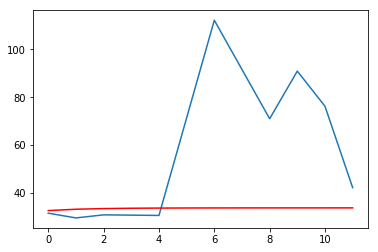

   ========== t = 158 ; D = 12 ========
d = 1:: predicted=31.092753, expected=29.413660
d = 2:: predicted=31.936909, expected=30.697530
d = 3:: predicted=32.361654, expected=30.575230
d = 4:: predicted=32.575717, expected=30.453000
d = 5:: predicted=32.683917, expected=71.348000
d = 6:: predicted=32.738968, expected=112.243810
d = 7:: predicted=32.767302, expected=91.610840
d = 8:: predicted=32.782215, expected=70.977870
d = 9:: predicted=32.790403, expected=90.922890
d = 10:: predicted=32.795205, expected=76.200970
d = 11:: predicted=32.798294, expected=42.088660
d = 12:: predicted=32.800535, expected=40.908740


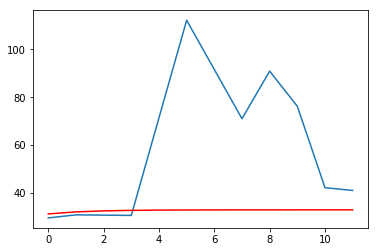

   ========== t = 159 ; D = 12 ========
d = 1:: predicted=31.462019, expected=30.697530
d = 2:: predicted=31.846724, expected=30.575230
d = 3:: predicted=32.040641, expected=30.453000
d = 4:: predicted=32.138726, expected=71.348000
d = 5:: predicted=32.188678, expected=112.243810
d = 6:: predicted=32.214430, expected=91.610840
d = 7:: predicted=32.228042, expected=70.977870
d = 8:: predicted=32.235558, expected=90.922890
d = 9:: predicted=32.240001, expected=76.200970
d = 10:: predicted=32.242911, expected=42.088660
d = 11:: predicted=32.245060, expected=40.908740
d = 12:: predicted=32.246788, expected=35.070750


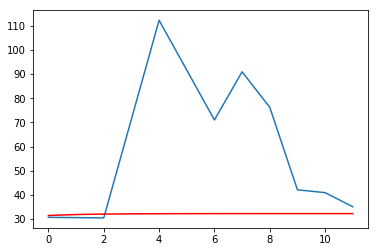

   ========== t = 160 ; D = 12 ========
d = 1:: predicted=31.221824, expected=30.575230
d = 2:: predicted=31.547295, expected=30.453000
d = 3:: predicted=31.711452, expected=71.348000
d = 4:: predicted=31.794571, expected=112.243810
d = 5:: predicted=31.836987, expected=91.610840
d = 6:: predicted=31.858956, expected=70.977870
d = 7:: predicted=31.870653, expected=90.922890
d = 8:: predicted=31.877189, expected=76.200970
d = 9:: predicted=31.881143, expected=42.088660
d = 10:: predicted=31.883783, expected=40.908740
d = 11:: predicted=31.885774, expected=35.070750
d = 12:: predicted=31.887443, expected=34.406050


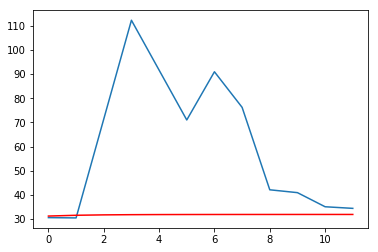

   ========== t = 161 ; D = 12 ========
d = 1:: predicted=31.008767, expected=30.453000
d = 2:: predicted=31.288599, expected=71.348000
d = 3:: predicted=31.429828, expected=112.243810
d = 4:: predicted=31.501419, expected=91.610840
d = 5:: predicted=31.538035, expected=70.977870
d = 6:: predicted=31.557092, expected=90.922890
d = 7:: predicted=31.567302, expected=76.200970
d = 8:: predicted=31.573094, expected=42.088660
d = 9:: predicted=31.576659, expected=40.908740
d = 10:: predicted=31.579121, expected=35.070750
d = 11:: predicted=31.580993, expected=34.406050
d = 12:: predicted=31.582590, expected=33.296020


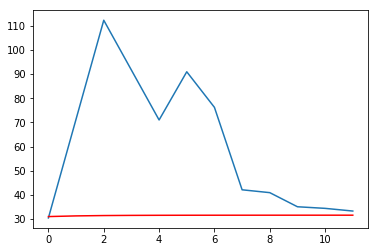

   ========== t = 162 ; D = 12 ========
d = 1:: predicted=54.746939, expected=71.348000
d = 2:: predicted=46.408477, expected=112.243810
d = 3:: predicted=42.220600, expected=91.610840
d = 4:: predicted=40.117678, expected=70.977870
d = 5:: predicted=39.062118, expected=90.922890
d = 6:: predicted=38.532693, expected=76.200970
d = 7:: predicted=38.267550, expected=42.088660
d = 8:: predicted=38.135186, expected=40.908740
d = 9:: predicted=38.069508, expected=35.070750
d = 10:: predicted=38.037335, expected=34.406050
d = 11:: predicted=38.021991, expected=33.296020
d = 12:: predicted=38.015101, expected=39.120570


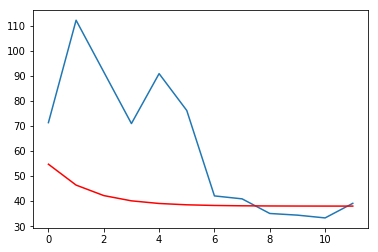

   ========== t = 163 ; D = 12 ========
d = 1:: predicted=82.451171, expected=112.243810
d = 2:: predicted=67.485173, expected=91.610840
d = 3:: predicted=59.967787, expected=70.977870
d = 4:: predicted=56.192383, expected=90.922890
d = 5:: predicted=54.296922, expected=76.200970
d = 6:: predicted=53.345818, expected=42.088660
d = 7:: predicted=52.869192, expected=40.908740
d = 8:: predicted=52.630925, expected=35.070750
d = 9:: predicted=52.512380, expected=34.406050
d = 10:: predicted=52.454021, expected=33.296020
d = 11:: predicted=52.425870, expected=39.120570
d = 12:: predicted=52.412904, expected=40.972580


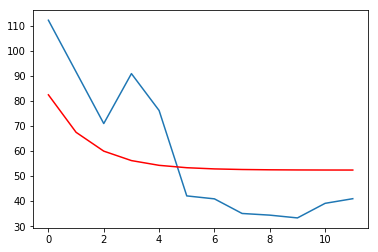

   ========== t = 164 ; D = 12 ========
d = 1:: predicted=77.304986, expected=91.610840
d = 2:: predicted=70.120222, expected=70.977870
d = 3:: predicted=66.512558, expected=90.922890
d = 4:: predicted=64.701782, expected=76.200970
d = 5:: predicted=63.793625, expected=42.088660
d = 6:: predicted=63.338863, expected=40.908740
d = 7:: predicted=63.111862, expected=35.070750
d = 8:: predicted=62.999275, expected=34.406050
d = 9:: predicted=62.944176, expected=33.296020
d = 10:: predicted=62.917918, expected=39.120570
d = 11:: predicted=62.906172, expected=40.972580
d = 12:: predicted=62.901721, expected=41.378550


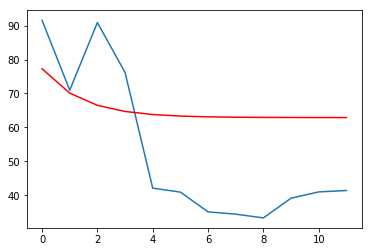

   ========== t = 165 ; D = 12 ========
d = 1:: predicted=68.586889, expected=70.977870
d = 2:: predicted=67.387435, expected=90.922890
d = 3:: predicted=66.786473, expected=76.200970
d = 4:: predicted=66.486119, expected=42.088660
d = 5:: predicted=66.336777, expected=40.908740
d = 6:: predicted=66.263301, expected=35.070750
d = 7:: predicted=66.227905, expected=34.406050
d = 8:: predicted=66.211634, expected=33.296020
d = 9:: predicted=66.204993, expected=39.120570
d = 10:: predicted=66.203179, expected=40.972580
d = 11:: predicted=66.203792, expected=41.378550
d = 12:: predicted=66.205608, expected=41.312510


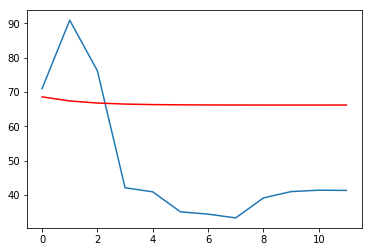

   ========== t = 166 ; D = 12 ========
d = 1:: predicted=80.793398, expected=90.922890
d = 2:: predicted=75.707089, expected=76.200970
d = 3:: predicted=73.153917, expected=42.088660
d = 4:: predicted=71.873138, expected=40.908740
d = 5:: predicted=71.231442, expected=35.070750
d = 6:: predicted=70.910724, expected=34.406050
d = 7:: predicted=70.751287, expected=33.296020
d = 8:: predicted=70.672846, expected=39.120570
d = 9:: predicted=70.635044, expected=40.972580
d = 10:: predicted=70.617702, expected=41.378550
d = 11:: predicted=70.610624, expected=41.312510
d = 12:: predicted=70.608692, expected=49.643640


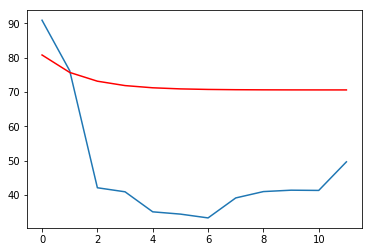

   ========== t = 167 ; D = 12 ========
d = 1:: predicted=74.562153, expected=76.200970
d = 2:: predicted=73.740701, expected=42.088660
d = 3:: predicted=73.329796, expected=40.908740
d = 4:: predicted=73.125098, expected=35.070750
d = 5:: predicted=73.023960, expected=34.406050
d = 6:: predicted=72.974849, expected=33.296020
d = 7:: predicted=72.951862, expected=39.120570
d = 8:: predicted=72.942007, expected=40.972580
d = 9:: predicted=72.938746, expected=41.378550
d = 10:: predicted=72.938800, expected=41.312510
d = 11:: predicted=72.940520, expected=49.643640
d = 12:: predicted=72.943070, expected=43.082650


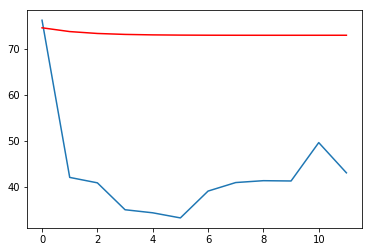

   ========== t = 168 ; D = 12 ========
d = 1:: predicted=55.057113, expected=42.088660
d = 2:: predicted=61.572474, expected=40.908740
d = 3:: predicted=64.846584, expected=35.070750
d = 4:: predicted=66.492675, expected=34.406050
d = 5:: predicted=67.321044, expected=33.296020
d = 6:: predicted=67.738669, expected=39.120570
d = 7:: predicted=67.950014, expected=40.972580
d = 8:: predicted=68.057730, expected=41.378550
d = 9:: predicted=68.113405, expected=41.312510
d = 10:: predicted=68.142933, expected=49.643640
d = 11:: predicted=68.159336, expected=43.082650
d = 12:: predicted=68.169145, expected=39.563560


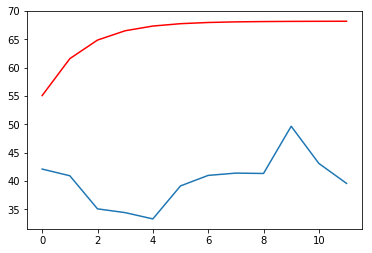

   ========== t = 169 ; D = 12 ========
d = 1:: predicted=51.390569, expected=40.908740
d = 2:: predicted=56.656841, expected=35.070750
d = 3:: predicted=59.303426, expected=34.406050
d = 4:: predicted=60.634181, expected=33.296020
d = 5:: predicted=61.304026, expected=39.120570
d = 6:: predicted=61.641879, expected=40.972580
d = 7:: predicted=61.812993, expected=41.378550
d = 8:: predicted=61.900347, expected=41.312510
d = 9:: predicted=61.945632, expected=49.643640
d = 10:: predicted=61.969788, expected=43.082650
d = 11:: predicted=61.983335, expected=39.563560
d = 12:: predicted=61.991553, expected=37.166180


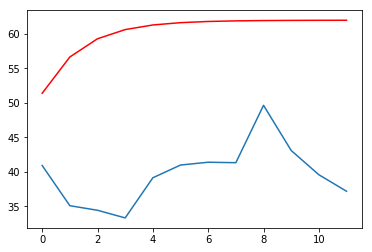

   ========== t = 170 ; D = 12 ========
d = 1:: predicted=45.578688, expected=35.070750
d = 2:: predicted=50.857922, expected=34.406050
d = 3:: predicted=53.510836, expected=33.296020
d = 4:: predicted=54.844630, expected=39.120570
d = 5:: predicted=55.515837, expected=40.972580
d = 6:: predicted=55.854254, expected=41.378550
d = 7:: predicted=56.025493, expected=41.312510
d = 8:: predicted=56.112764, expected=49.643640
d = 9:: predicted=56.157851, expected=43.082650
d = 10:: predicted=56.181773, expected=39.563560
d = 11:: predicted=56.195054, expected=37.166180
d = 12:: predicted=56.202993, expected=36.218180


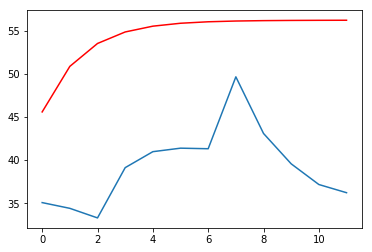

   ========== t = 171 ; D = 12 ========
d = 1:: predicted=42.777353, expected=34.406050
d = 2:: predicted=46.983218, expected=33.296020
d = 3:: predicted=49.096859, expected=39.120570
d = 4:: predicted=50.159651, expected=40.972580
d = 5:: predicted=50.694600, expected=41.378550
d = 6:: predicted=50.964434, expected=41.312510
d = 7:: predicted=51.101082, expected=49.643640
d = 8:: predicted=51.170878, expected=43.082650
d = 9:: predicted=51.207073, expected=39.563560
d = 10:: predicted=51.226382, expected=37.166180
d = 11:: predicted=51.237228, expected=36.218180
d = 12:: predicted=51.243821, expected=36.407790


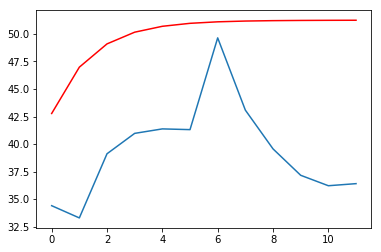

   ========== t = 172 ; D = 12 ========
d = 1:: predicted=40.208300, expected=33.296020
d = 2:: predicted=43.681187, expected=39.120570
d = 3:: predicted=45.426553, expected=40.972580
d = 4:: predicted=46.304236, expected=41.378550
d = 5:: predicted=46.746126, expected=41.312510
d = 6:: predicted=46.969106, expected=49.643640
d = 7:: predicted=47.082147, expected=43.082650
d = 8:: predicted=47.139966, expected=39.563560
d = 9:: predicted=47.170035, expected=37.166180
d = 10:: predicted=47.186189, expected=36.218180
d = 11:: predicted=47.195338, expected=36.407790
d = 12:: predicted=47.200976, expected=36.363720


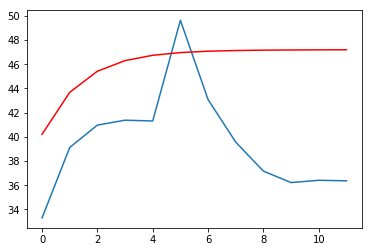

   ========== t = 173 ; D = 12 ========
d = 1:: predicted=42.021265, expected=39.120570
d = 2:: predicted=43.479173, expected=40.972580
d = 3:: predicted=44.212434, expected=41.378550
d = 4:: predicted=44.581690, expected=41.312510
d = 5:: predicted=44.768134, expected=49.643640
d = 6:: predicted=44.862750, expected=43.082650
d = 7:: predicted=44.911272, expected=39.563560
d = 8:: predicted=44.936618, expected=37.166180
d = 9:: predicted=44.950340, expected=36.218180
d = 10:: predicted=44.958222, expected=36.407790
d = 11:: predicted=44.963144, expected=36.363720
d = 12:: predicted=44.966605, expected=34.617750


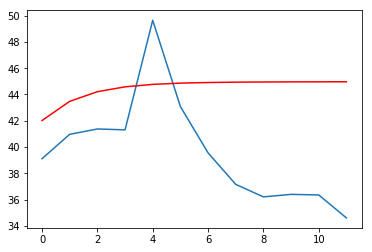

   ========== t = 174 ; D = 12 ========
d = 1:: predicted=42.442680, expected=40.972580
d = 2:: predicted=43.182015, expected=41.378550
d = 3:: predicted=43.554309, expected=41.312510
d = 4:: predicted=43.742271, expected=49.643640
d = 5:: predicted=43.837632, expected=43.082650
d = 6:: predicted=43.886480, expected=39.563560
d = 7:: predicted=43.911972, expected=37.166180
d = 8:: predicted=43.925734, expected=36.218180
d = 9:: predicted=43.933603, expected=36.407790
d = 10:: predicted=43.938511, expected=36.363720
d = 11:: predicted=43.941930, expected=34.617750
d = 12:: predicted=43.944606, expected=37.545740


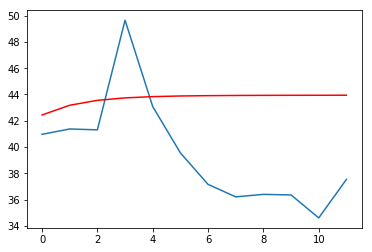

   ========== t = 175 ; D = 12 ========
d = 1:: predicted=42.350657, expected=41.378550
d = 2:: predicted=42.839861, expected=41.312510
d = 3:: predicted=43.086498, expected=49.643640
d = 4:: predicted=43.211323, expected=43.082650
d = 5:: predicted=43.274949, expected=39.563560
d = 6:: predicted=43.307857, expected=37.166180
d = 7:: predicted=43.325323, expected=36.218180
d = 8:: predicted=43.335051, expected=36.407790
d = 9:: predicted=43.340880, expected=36.363720
d = 10:: predicted=43.344737, expected=34.617750
d = 11:: predicted=43.347614, expected=37.545740
d = 12:: predicted=43.350008, expected=38.911560


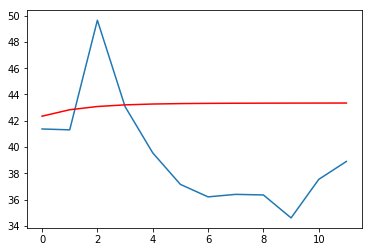

   ========== t = 176 ; D = 12 ========
d = 1:: predicted=42.098145, expected=41.312510
d = 2:: predicted=42.493664, expected=49.643640
d = 3:: predicted=42.693249, expected=43.082650
d = 4:: predicted=42.794416, expected=39.563560
d = 5:: predicted=42.846168, expected=37.166180
d = 6:: predicted=42.873081, expected=36.218180
d = 7:: predicted=42.887523, expected=36.407790
d = 8:: predicted=42.895715, expected=36.363720
d = 9:: predicted=42.900761, expected=34.617750
d = 10:: predicted=42.904223, expected=37.545740
d = 11:: predicted=42.906900, expected=38.911560
d = 12:: predicted=42.909163, expected=38.493530


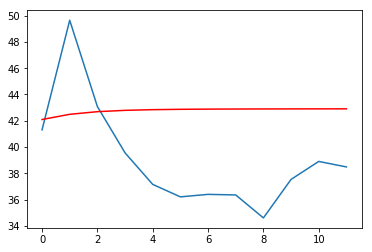

   ========== t = 177 ; D = 12 ========
d = 1:: predicted=46.787972, expected=49.643640
d = 2:: predicted=45.354631, expected=43.082650
d = 3:: predicted=44.635674, expected=39.563560
d = 4:: predicted=44.275510, expected=37.166180
d = 5:: predicted=44.095577, expected=36.218180
d = 6:: predicted=44.006150, expected=36.407790
d = 7:: predicted=43.962173, expected=36.363720
d = 8:: predicted=43.941063, expected=34.617750
d = 9:: predicted=43.931411, expected=37.545740
d = 10:: predicted=43.927517, expected=38.911560
d = 11:: predicted=43.926515, expected=38.493530
d = 12:: predicted=43.926975, expected=43.972010


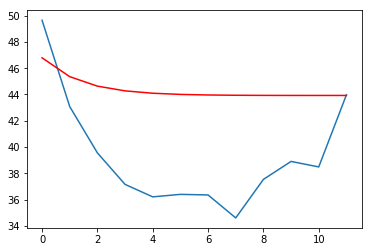

   ========== t = 178 ; D = 12 ========
d = 1:: predicted=43.630536, expected=43.082650
d = 2:: predicted=43.906672, expected=39.563560
d = 3:: predicted=44.046343, expected=37.166180
d = 4:: predicted=44.117445, expected=36.218180
d = 5:: predicted=44.154124, expected=36.407790
d = 6:: predicted=44.173491, expected=36.363720
d = 7:: predicted=44.184186, expected=34.617750
d = 8:: predicted=44.190506, expected=37.545740
d = 9:: predicted=44.194655, expected=38.911560
d = 10:: predicted=44.197697, expected=38.493530
d = 11:: predicted=44.200186, expected=43.972010
d = 12:: predicted=44.202402, expected=42.492150


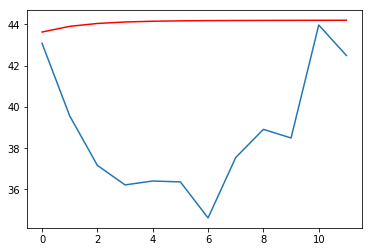

   ========== t = 179 ; D = 12 ========
d = 1:: predicted=41.461535, expected=39.563560
d = 2:: predicted=42.415761, expected=37.166180
d = 3:: predicted=42.895973, expected=36.218180
d = 4:: predicted=43.138108, expected=36.407790
d = 5:: predicted=43.260654, expected=36.363720
d = 6:: predicted=43.323153, expected=34.617750
d = 7:: predicted=43.355482, expected=37.545740
d = 8:: predicted=43.372666, expected=38.911560
d = 9:: predicted=43.382232, expected=38.493530
d = 10:: predicted=43.387964, expected=43.972010
d = 11:: predicted=43.391790, expected=42.492150
d = 12:: predicted=43.394652, expected=41.291390


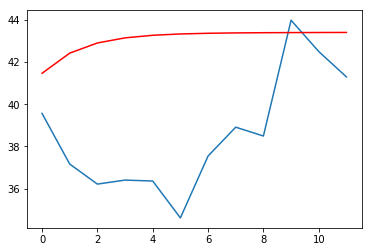

   ========== t = 180 ; D = 12 ========
d = 1:: predicted=39.634807, expected=37.166180
d = 2:: predicted=40.875630, expected=36.218180
d = 3:: predicted=41.499748, expected=36.407790
d = 4:: predicted=41.814136, expected=36.363720
d = 5:: predicted=41.972948, expected=34.617750
d = 6:: predicted=42.053632, expected=37.545740
d = 7:: predicted=42.095059, expected=38.911560
d = 8:: predicted=42.116776, expected=38.493530
d = 9:: predicted=42.128576, expected=43.972010
d = 10:: predicted=42.135420, expected=42.492150
d = 11:: predicted=42.139764, expected=41.291390
d = 12:: predicted=42.142844, expected=45.662490


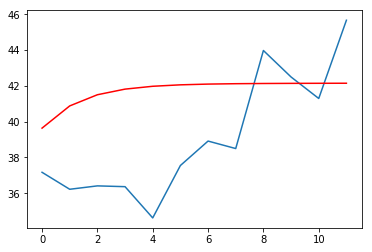

   ========== t = 181 ; D = 12 ========
d = 1:: predicted=38.521518, expected=36.218180
d = 2:: predicted=39.679297, expected=36.407790
d = 3:: predicted=40.261676, expected=36.363720
d = 4:: predicted=40.555046, expected=34.617750
d = 5:: predicted=40.703277, expected=37.545740
d = 6:: predicted=40.778603, expected=38.911560
d = 7:: predicted=40.817309, expected=38.493530
d = 8:: predicted=40.837623, expected=43.972010
d = 9:: predicted=40.848697, expected=42.492150
d = 10:: predicted=40.855150, expected=41.291390
d = 11:: predicted=40.859262, expected=45.662490
d = 12:: predicted=40.862192, expected=57.824450


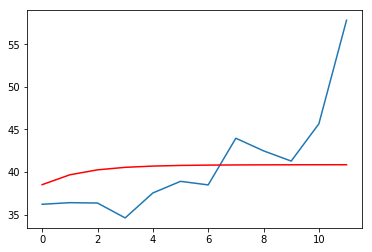

   ========== t = 182 ; D = 12 ========
d = 1:: predicted=38.109821, expected=36.407790
d = 2:: predicted=38.965531, expected=36.363720
d = 3:: predicted=39.396171, expected=34.617750
d = 4:: predicted=39.613318, expected=37.545740
d = 5:: predicted=39.723229, expected=38.911560
d = 6:: predicted=39.779284, expected=38.493530
d = 7:: predicted=39.808283, expected=43.972010
d = 8:: predicted=39.823703, expected=42.492150
d = 9:: predicted=39.832305, expected=41.291390
d = 10:: predicted=39.837475, expected=45.662490
d = 11:: predicted=39.840917, expected=57.824450
d = 12:: predicted=39.843484, expected=48.472810


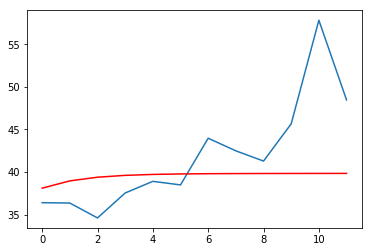

   ========== t = 183 ; D = 12 ========
d = 1:: predicted=37.700399, expected=36.363720
d = 2:: predicted=38.372605, expected=34.617750
d = 3:: predicted=38.711068, expected=37.545740
d = 4:: predicted=38.881889, expected=38.911560
d = 5:: predicted=38.968514, expected=38.493530
d = 6:: predicted=39.012850, expected=43.972010
d = 7:: predicted=39.035941, expected=42.492150
d = 8:: predicted=39.048372, expected=41.291390
d = 9:: predicted=39.055447, expected=45.662490
d = 10:: predicted=39.059821, expected=57.824450
d = 11:: predicted=39.062859, expected=48.472810
d = 12:: predicted=39.065224, expected=38.488630


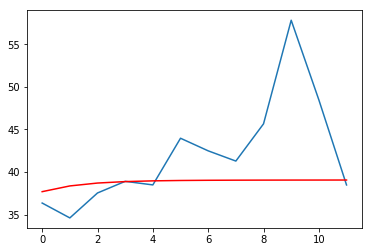

   ========== t = 184 ; D = 12 ========
d = 1:: predicted=36.382209, expected=34.617750
d = 2:: predicted=37.269235, expected=37.545740
d = 3:: predicted=37.715573, expected=38.911560
d = 4:: predicted=37.940555, expected=38.493530
d = 5:: predicted=38.054371, expected=43.972010
d = 6:: predicted=38.112327, expected=42.492150
d = 7:: predicted=38.142251, expected=41.291390
d = 8:: predicted=38.158100, expected=45.662490
d = 9:: predicted=38.166846, expected=57.824450
d = 10:: predicted=38.172058, expected=48.472810
d = 11:: predicted=38.175466, expected=38.488630
d = 12:: predicted=38.177998, expected=41.502370


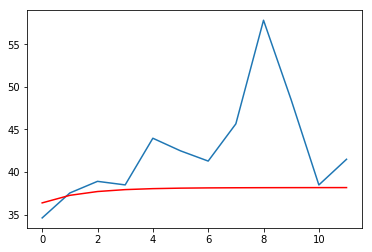

   ========== t = 185 ; D = 12 ========
d = 1:: predicted=37.691986, expected=37.545740
d = 2:: predicted=37.766232, expected=38.911560
d = 3:: predicted=37.804319, expected=38.493530
d = 4:: predicted=37.824266, expected=43.972010
d = 5:: predicted=37.835073, expected=42.492150
d = 6:: predicted=37.841293, expected=41.291390
d = 7:: predicted=37.845224, expected=45.662490
d = 8:: predicted=37.847983, expected=57.824450
d = 9:: predicted=37.850167, expected=48.472810
d = 10:: predicted=37.852067, expected=38.488630
d = 11:: predicted=37.853823, expected=41.502370
d = 12:: predicted=37.855507, expected=41.984430


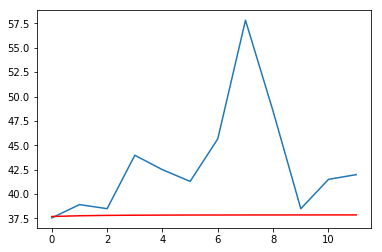

   ========== t = 186 ; D = 12 ========
d = 1:: predicted=38.464126, expected=38.911560
d = 2:: predicted=38.240185, expected=38.493530
d = 3:: predicted=38.128505, expected=43.972010
d = 4:: predicted=38.073220, expected=42.492150
d = 5:: predicted=38.046266, expected=41.291390
d = 6:: predicted=38.033513, expected=45.662490
d = 7:: predicted=38.027916, expected=57.824450
d = 8:: predicted=38.025899, expected=48.472810
d = 9:: predicted=38.025723, expected=38.488630
d = 10:: predicted=38.026412, expected=41.502370
d = 11:: predicted=38.027564, expected=41.984430
d = 12:: predicted=38.028931, expected=51.739130


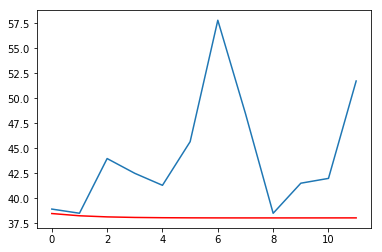

   ========== t = 187 ; D = 12 ========
d = 1:: predicted=38.332667, expected=38.493530
d = 2:: predicted=38.252672, expected=43.972010
d = 3:: predicted=38.213301, expected=42.492150
d = 4:: predicted=38.194333, expected=41.291390
d = 5:: predicted=38.185613, expected=45.662490
d = 6:: predicted=38.182041, expected=57.824450
d = 7:: predicted=38.181052, expected=48.472810
d = 8:: predicted=38.181367, expected=38.488630
d = 9:: predicted=38.182317, expected=41.502370
d = 10:: predicted=38.183615, expected=41.984430
d = 11:: predicted=38.185054, expected=51.739130
d = 12:: predicted=38.186581, expected=88.653860


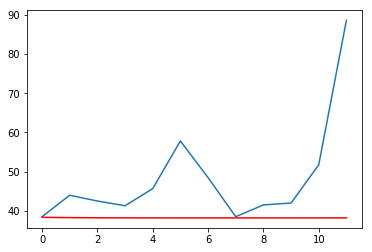

   ========== t = 188 ; D = 12 ========
d = 1:: predicted=41.575417, expected=43.972010
d = 2:: predicted=40.372517, expected=42.492150
d = 3:: predicted=39.769180, expected=41.291390
d = 4:: predicted=39.466970, expected=45.662490
d = 5:: predicted=39.316003, expected=57.824450
d = 6:: predicted=39.241026, expected=48.472810
d = 7:: predicted=39.204190, expected=38.488630
d = 8:: predicted=39.186511, expected=41.502370
d = 9:: predicted=39.178470, expected=41.984430
d = 10:: predicted=39.175258, expected=51.739130
d = 11:: predicted=39.174479, expected=88.653860
d = 12:: predicted=39.174909, expected=94.735260


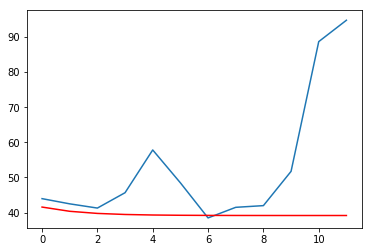

   ========== t = 189 ; D = 12 ========
d = 1:: predicted=41.275115, expected=42.492150
d = 2:: predicted=40.664699, expected=41.291390
d = 3:: predicted=40.358975, expected=45.662490
d = 4:: predicted=40.206258, expected=57.824450
d = 5:: predicted=40.130419, expected=48.472810
d = 6:: predicted=40.093177, expected=38.488630
d = 7:: predicted=40.075321, expected=41.502370
d = 8:: predicted=40.067188, expected=41.984430
d = 9:: predicted=40.063963, expected=51.739130
d = 10:: predicted=40.063192, expected=88.653860
d = 11:: predicted=40.063663, expected=94.735260
d = 12:: predicted=40.064733, expected=94.137440


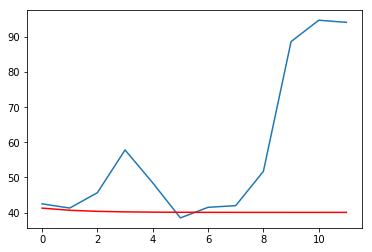

   ========== t = 190 ; D = 12 ========
d = 1:: predicted=40.865352, expected=41.291390
d = 2:: predicted=40.652236, expected=45.662490
d = 3:: predicted=40.546046, expected=57.824450
d = 4:: predicted=40.493600, expected=48.472810
d = 5:: predicted=40.468094, expected=38.488630
d = 6:: predicted=40.456150, expected=41.502370
d = 7:: predicted=40.451002, expected=41.984430
d = 8:: predicted=40.449280, expected=51.739130
d = 9:: predicted=40.449276, expected=88.653860
d = 10:: predicted=40.450129, expected=94.735260
d = 11:: predicted=40.451428, expected=94.137440
d = 12:: predicted=40.452943, expected=82.566350


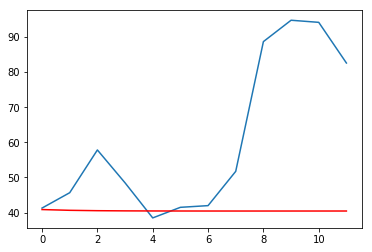

   ========== t = 191 ; D = 12 ========
d = 1:: predicted=43.523867, expected=45.662490
d = 2:: predicted=42.450607, expected=57.824450
d = 3:: predicted=41.912435, expected=48.472810
d = 4:: predicted=41.643007, expected=38.488630
d = 5:: predicted=41.508560, expected=41.502370
d = 6:: predicted=41.441932, expected=41.984430
d = 7:: predicted=41.409336, expected=51.739130
d = 8:: predicted=41.393852, expected=88.653860
d = 9:: predicted=41.386947, expected=94.735260
d = 10:: predicted=41.384371, expected=94.137440
d = 11:: predicted=41.383946, expected=82.566350
d = 12:: predicted=41.384626, expected=59.893320


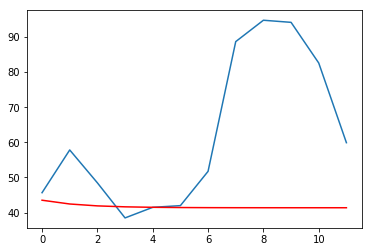

   ========== t = 192 ; D = 12 ========
d = 1:: predicted=51.124050, expected=57.824450
d = 2:: predicted=47.759638, expected=48.472810
d = 3:: predicted=46.070765, expected=38.488630
d = 4:: predicted=45.223462, expected=41.502370
d = 5:: predicted=44.798827, expected=41.984430
d = 6:: predicted=44.586520, expected=51.739130
d = 7:: predicted=44.480839, expected=88.653860
d = 8:: predicted=44.428696, expected=94.735260
d = 9:: predicted=44.403476, expected=94.137440
d = 10:: predicted=44.391771, expected=82.566350
d = 11:: predicted=44.386852, expected=59.893320
d = 12:: predicted=44.385323, expected=50.718330


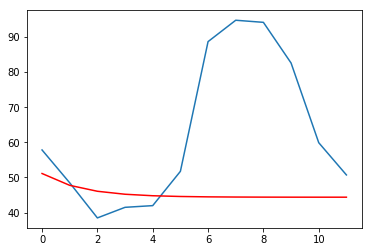

   ========== t = 193 ; D = 12 ========
d = 1:: predicted=47.226807, expected=48.472810
d = 2:: predicted=46.601989, expected=38.488630
d = 3:: predicted=46.289150, expected=41.502370
d = 4:: predicted=46.133027, expected=41.984430
d = 5:: predicted=46.055592, expected=51.739130
d = 6:: predicted=46.017702, expected=88.653860
d = 7:: predicted=45.999655, expected=94.735260
d = 8:: predicted=45.991594, expected=94.137440
d = 9:: predicted=45.988546, expected=82.566350
d = 10:: predicted=45.988010, expected=59.893320
d = 11:: predicted=45.988737, expected=50.718330
d = 12:: predicted=45.990093, expected=45.007260


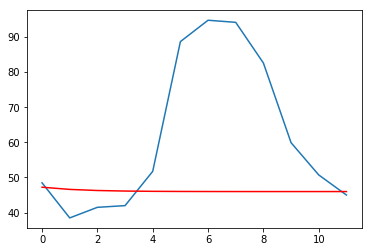

   ========== t = 194 ; D = 12 ========
d = 1:: predicted=41.700596, expected=38.488630
d = 2:: predicted=43.314798, expected=41.502370
d = 3:: predicted=44.126535, expected=41.984430
d = 4:: predicted=44.535208, expected=51.739130
d = 5:: predicted=44.741433, expected=88.653860
d = 6:: predicted=44.845986, expected=94.735260
d = 7:: predicted=44.899464, expected=94.137440
d = 8:: predicted=44.927301, expected=82.566350
d = 9:: predicted=44.942237, expected=59.893320
d = 10:: predicted=44.950707, expected=50.718330
d = 11:: predicted=44.955934, expected=45.007260
d = 12:: predicted=44.959528, expected=43.439070


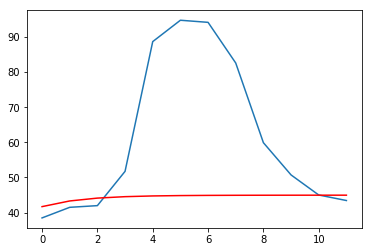

   ========== t = 195 ; D = 12 ========
d = 1:: predicted=42.727720, expected=41.502370
d = 2:: predicted=43.344111, expected=41.984430
d = 3:: predicted=43.654660, expected=51.739130
d = 4:: predicted=43.811573, expected=88.653860
d = 5:: predicted=43.891328, expected=94.735260
d = 6:: predicted=43.932332, expected=94.137440
d = 7:: predicted=43.953861, expected=82.566350
d = 8:: predicted=43.965622, expected=59.893320
d = 9:: predicted=43.972479, expected=50.718330
d = 10:: predicted=43.976861, expected=45.007260
d = 11:: predicted=43.979993, expected=43.439070
d = 12:: predicted=43.982517, expected=41.725950


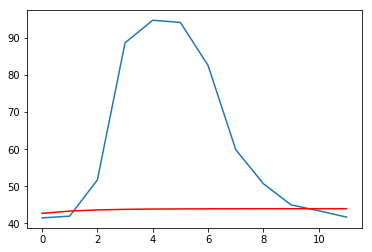

   ========== t = 196 ; D = 12 ========
d = 1:: predicted=42.736496, expected=41.984430
d = 2:: predicted=43.115167, expected=51.739130
d = 3:: predicted=43.306293, expected=88.653860
d = 4:: predicted=43.403217, expected=94.735260
d = 5:: predicted=43.452834, expected=94.137440
d = 6:: predicted=43.478693, expected=82.566350
d = 7:: predicted=43.492600, expected=59.893320
d = 8:: predicted=43.500517, expected=50.718330
d = 9:: predicted=43.505435, expected=45.007260
d = 10:: predicted=43.508836, expected=43.439070
d = 11:: predicted=43.511477, expected=41.725950
d = 12:: predicted=43.513737, expected=43.346430


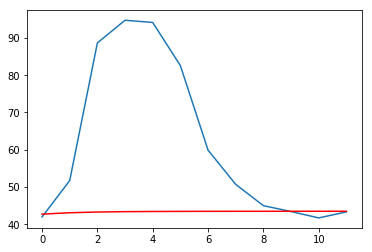

   ========== t = 197 ; D = 12 ========
d = 1:: predicted=48.264704, expected=51.739130
d = 2:: predicted=46.520589, expected=88.653860
d = 3:: predicted=45.645569, expected=94.735260
d = 4:: predicted=45.207032, expected=94.137440
d = 5:: predicted=44.987741, expected=82.566350
d = 6:: predicted=44.878552, expected=59.893320
d = 7:: predicted=44.824676, expected=50.718330
d = 8:: predicted=44.798577, expected=45.007260
d = 9:: predicted=44.786441, expected=43.439070
d = 10:: predicted=44.781301, expected=41.725950
d = 11:: predicted=44.779689, expected=43.346430
d = 12:: predicted=44.779836, expected=40.634290


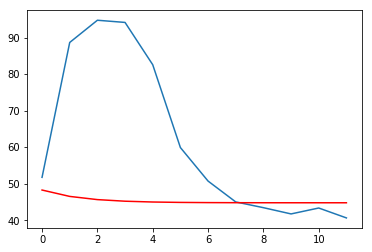

   ========== t = 198 ; D = 12 ========
d = 1:: predicted=70.616979, expected=88.653860
d = 2:: predicted=61.558771, expected=94.735260
d = 3:: predicted=57.010253, expected=94.137440
d = 4:: predicted=54.726803, expected=82.566350
d = 5:: predicted=53.581065, expected=59.893320
d = 6:: predicted=53.006733, expected=50.718330
d = 7:: predicted=52.719405, expected=45.007260
d = 8:: predicted=52.576249, expected=43.439070
d = 9:: predicted=52.505494, expected=41.725950
d = 10:: predicted=52.471113, expected=43.346430
d = 11:: predicted=52.454993, expected=40.634290
d = 12:: predicted=52.448037, expected=41.556640


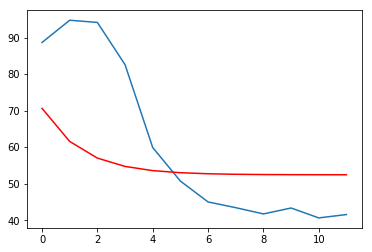

   ========== t = 199 ; D = 12 ========
d = 1:: predicted=78.347235, expected=94.735260
d = 2:: predicted=70.117335, expected=94.137440
d = 3:: predicted=65.985028, expected=82.566350
d = 4:: predicted=63.910871, expected=59.893320
d = 5:: predicted=62.870460, expected=50.718330
d = 6:: predicted=62.349259, expected=45.007260
d = 7:: predicted=62.088854, expected=43.439070
d = 8:: predicted=61.959449, expected=41.725950
d = 9:: predicted=61.895847, expected=43.346430
d = 10:: predicted=61.865246, expected=40.634290
d = 11:: predicted=61.851287, expected=41.556640
d = 12:: predicted=61.845630, expected=46.007530


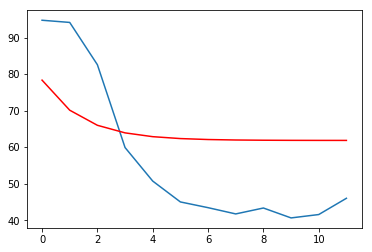

   ========== t = 200 ; D = 12 ========
d = 1:: predicted=81.802280, expected=94.137440
d = 2:: predicted=75.608393, expected=82.566350
d = 3:: predicted=72.498995, expected=59.893320
d = 4:: predicted=70.938855, expected=50.718330
d = 5:: predicted=70.156813, expected=45.007260
d = 6:: predicted=69.765585, expected=43.439070
d = 7:: predicted=69.570652, expected=41.725950
d = 8:: predicted=69.474306, expected=43.346430
d = 9:: predicted=69.427478, expected=40.634290
d = 10:: predicted=69.405517, expected=41.556640
d = 11:: predicted=69.396040, expected=46.007530
d = 12:: predicted=69.392853, expected=49.548440


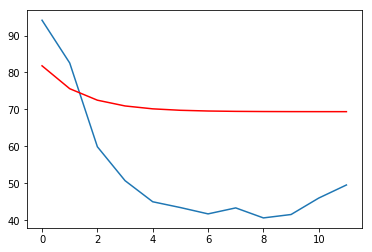

   ========== t = 201 ; D = 12 ========
d = 1:: predicted=77.919990, expected=82.566350
d = 2:: predicted=75.588033, expected=59.893320
d = 3:: predicted=74.418464, expected=50.718330
d = 4:: predicted=73.832714, expected=45.007260
d = 5:: predicted=73.540196, expected=43.439070
d = 6:: predicted=73.394926, expected=41.725950
d = 7:: predicted=73.323642, expected=43.346430
d = 8:: predicted=73.289467, expected=40.634290
d = 9:: predicted=73.273977, expected=41.556640
d = 10:: predicted=73.267846, expected=46.007530
d = 11:: predicted=73.266427, expected=49.548440
d = 12:: predicted=73.267372, expected=47.017210


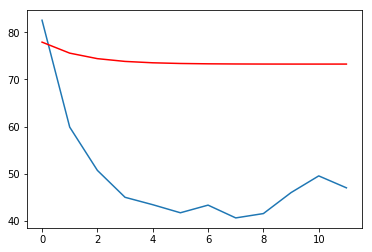

   ========== t = 202 ; D = 12 ========
d = 1:: predicted=65.783549, expected=59.893320
d = 2:: predicted=68.743479, expected=50.718330
d = 3:: predicted=70.231687, expected=45.007260
d = 4:: predicted=70.980736, expected=43.439070
d = 5:: predicted=71.358549, expected=41.725950
d = 6:: predicted=71.549918, expected=43.346430
d = 7:: predicted=71.647660, expected=40.634290
d = 8:: predicted=71.698362, expected=41.556640
d = 9:: predicted=71.725437, expected=46.007530
d = 10:: predicted=71.740671, expected=49.548440
d = 11:: predicted=71.749929, expected=47.017210
d = 12:: predicted=71.756197, expected=48.251130


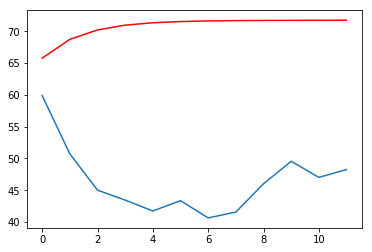

   ========== t = 203 ; D = 12 ========
d = 1:: predicted=59.086573, expected=50.718330
d = 2:: predicted=63.291020, expected=45.007260
d = 3:: predicted=65.404217, expected=43.439070
d = 4:: predicted=66.467070, expected=41.725950
d = 5:: predicted=67.002389, expected=43.346430
d = 6:: predicted=67.272786, expected=40.634290
d = 7:: predicted=67.410092, expected=41.556640
d = 8:: predicted=67.480577, expected=46.007530
d = 9:: predicted=67.517490, expected=49.548440
d = 10:: predicted=67.537544, expected=47.017210
d = 11:: predicted=67.549111, expected=48.251130
d = 12:: predicted=67.556456, expected=81.124900


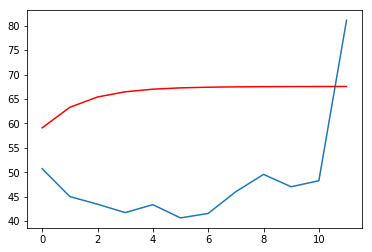

   ========== t = 204 ; D = 12 ========
d = 1:: predicted=53.836651, expected=45.007260
d = 2:: predicted=58.272595, expected=43.439070
d = 3:: predicted=60.501940, expected=41.725950
d = 4:: predicted=61.623029, expected=43.346430
d = 5:: predicted=62.187490, expected=40.634290
d = 6:: predicted=62.472394, expected=41.556640
d = 7:: predicted=62.616879, expected=46.007530
d = 8:: predicted=62.690840, expected=49.548440
d = 9:: predicted=62.729382, expected=47.017210
d = 10:: predicted=62.750133, expected=48.251130
d = 11:: predicted=62.761954, expected=81.124900
d = 12:: predicted=62.769277, expected=43.632350


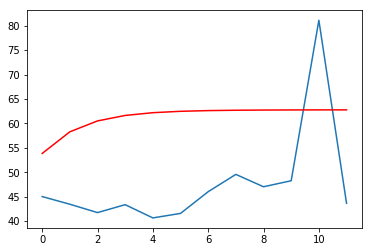

   ========== t = 205 ; D = 12 ========
d = 1:: predicted=50.896007, expected=43.439070
d = 2:: predicted=54.642515, expected=41.725950
d = 3:: predicted=56.525476, expected=43.346430
d = 4:: predicted=57.472475, expected=40.634290
d = 5:: predicted=57.949392, expected=41.556640
d = 6:: predicted=58.190201, expected=46.007530
d = 7:: predicted=58.312454, expected=49.548440
d = 8:: predicted=58.375130, expected=47.017210
d = 9:: predicted=58.407901, expected=48.251130
d = 10:: predicted=58.425645, expected=81.124900
d = 11:: predicted=58.435861, expected=43.632350
d = 12:: predicted=58.442285, expected=42.800860


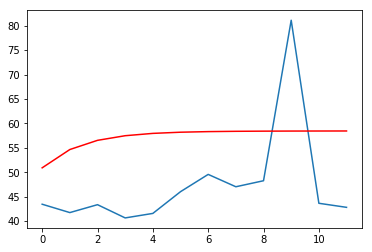

   ========== t = 206 ; D = 12 ========
d = 1:: predicted=48.186812, expected=41.725950
d = 2:: predicted=51.432945, expected=43.346430
d = 3:: predicted=53.064495, expected=40.634290
d = 4:: predicted=53.885120, expected=41.556640
d = 5:: predicted=54.298466, expected=46.007530
d = 6:: predicted=54.507274, expected=49.548440
d = 7:: predicted=54.613342, expected=47.017210
d = 8:: predicted=54.667808, expected=48.251130
d = 9:: predicted=54.696362, expected=81.124900
d = 10:: predicted=54.711905, expected=43.632350
d = 11:: predicted=54.720915, expected=42.800860
d = 12:: predicted=54.726636, expected=44.828010


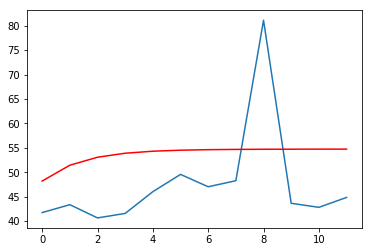

   ========== t = 207 ; D = 12 ========
d = 1:: predicted=47.652010, expected=43.346430
d = 2:: predicted=49.815572, expected=40.634290
d = 3:: predicted=50.903323, expected=41.556640
d = 4:: predicted=51.450768, expected=46.007530
d = 5:: predicted=51.726846, expected=49.548440
d = 6:: predicted=51.866638, expected=47.017210
d = 7:: predicted=51.937986, expected=48.251130
d = 8:: predicted=51.974946, expected=81.124900
d = 9:: predicted=51.994639, expected=43.632350
d = 10:: predicted=52.005661, expected=42.800860
d = 11:: predicted=52.012323, expected=44.828010
d = 12:: predicted=52.016817, expected=54.543480


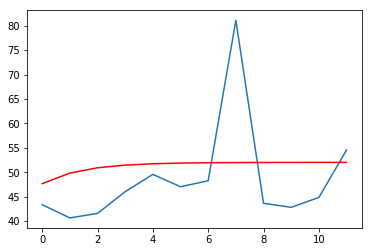

   ========== t = 208 ; D = 12 ========
d = 1:: predicted=45.086699, expected=40.634290
d = 2:: predicted=47.323937, expected=41.556640
d = 3:: predicted=48.448636, expected=46.007530
d = 4:: predicted=49.014572, expected=49.548440
d = 5:: predicted=49.299884, expected=47.017210
d = 6:: predicted=49.444237, expected=48.251130
d = 7:: predicted=49.517817, expected=81.124900
d = 8:: predicted=49.555842, expected=43.632350
d = 9:: predicted=49.576011, expected=42.800860
d = 10:: predicted=49.587218, expected=44.828010
d = 11:: predicted=49.593916, expected=54.543480
d = 12:: predicted=49.598353, expected=75.885430


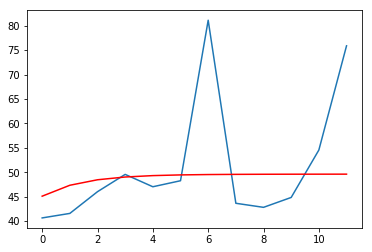

   ========== t = 209 ; D = 12 ========
d = 1:: predicted=44.607466, expected=41.556640
d = 2:: predicted=46.140717, expected=46.007530
d = 3:: predicted=46.911799, expected=49.548440
d = 4:: predicted=47.300084, expected=47.017210
d = 5:: predicted=47.496114, expected=48.251130
d = 6:: predicted=47.595596, expected=81.124900
d = 7:: predicted=47.646597, expected=43.632350
d = 8:: predicted=47.673231, expected=42.800860
d = 9:: predicted=47.687654, expected=44.828010
d = 10:: predicted=47.695901, expected=54.543480
d = 11:: predicted=47.701068, expected=75.885430
d = 12:: predicted=47.704702, expected=93.609180


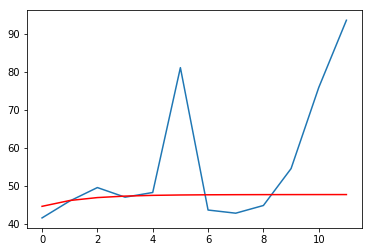

   ========== t = 210 ; D = 12 ========
d = 1:: predicted=46.510673, expected=46.007530
d = 2:: predicted=46.764372, expected=49.548440
d = 3:: predicted=46.892791, expected=47.017210
d = 4:: predicted=46.958298, expected=48.251130
d = 5:: predicted=46.992211, expected=81.124900
d = 6:: predicted=47.010241, expected=43.632350
d = 7:: predicted=47.020314, expected=42.800860
d = 8:: predicted=47.026386, expected=44.828010
d = 9:: predicted=47.030433, expected=54.543480
d = 10:: predicted=47.033480, expected=75.885430
d = 11:: predicted=47.036011, expected=93.609180
d = 12:: predicted=47.038299, expected=73.391900


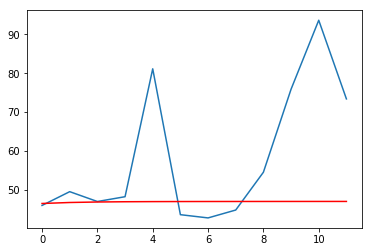

   ========== t = 211 ; D = 12 ========
d = 1:: predicted=48.471816, expected=49.548440
d = 2:: predicted=47.932108, expected=47.017210
d = 3:: predicted=47.662049, expected=48.251130
d = 4:: predicted=47.527454, expected=81.124900
d = 5:: predicted=47.460867, expected=43.632350
d = 6:: predicted=47.428444, expected=42.800860
d = 7:: predicted=47.413186, expected=44.828010
d = 8:: predicted=47.406525, expected=54.543480
d = 9:: predicted=47.404200, expected=75.885430
d = 10:: predicted=47.404042, expected=93.609180
d = 11:: predicted=47.404995, expected=73.391900
d = 12:: predicted=47.406481, expected=98.474440


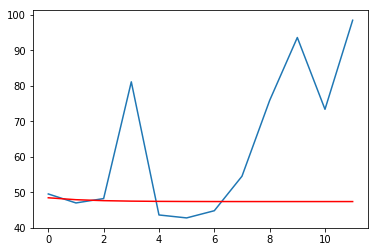

   ========== t = 212 ; D = 12 ========
d = 1:: predicted=47.255282, expected=47.017210
d = 2:: predicted=47.375866, expected=48.251130
d = 3:: predicted=47.437457, expected=81.124900
d = 4:: predicted=47.469402, expected=43.632350
d = 5:: predicted=47.486471, expected=42.800860
d = 6:: predicted=47.496061, expected=44.828010
d = 7:: predicted=47.501888, expected=54.543480
d = 8:: predicted=47.505825, expected=75.885430
d = 9:: predicted=47.508827, expected=93.609180
d = 10:: predicted=47.511352, expected=73.391900
d = 11:: predicted=47.513643, expected=98.474440
d = 12:: predicted=47.515809, expected=94.187370


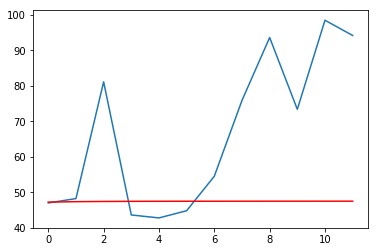

   ========== t = 213 ; D = 12 ========
d = 1:: predicted=47.931729, expected=48.251130
d = 2:: predicted=47.772324, expected=81.124900
d = 3:: predicted=47.693296, expected=43.632350
d = 4:: predicted=47.654621, expected=42.800860
d = 5:: predicted=47.636220, expected=44.828010
d = 6:: predicted=47.627995, expected=54.543480
d = 7:: predicted=47.624880, expected=75.885430
d = 8:: predicted=47.624332, expected=93.609180
d = 9:: predicted=47.625095, expected=73.391900
d = 10:: predicted=47.626486, expected=98.474440
d = 11:: predicted=47.628207, expected=94.187370
d = 12:: predicted=47.630088, expected=57.434360


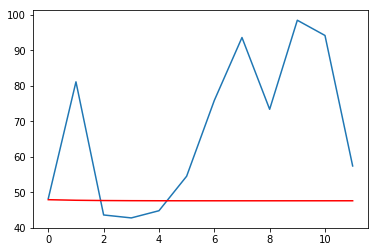

   ========== t = 214 ; D = 12 ========
d = 1:: predicted=67.198831, expected=81.124900
d = 2:: predicted=60.205783, expected=43.632350
d = 3:: predicted=56.694754, expected=42.800860
d = 4:: predicted=54.932553, expected=44.828010
d = 5:: predicted=54.048670, expected=54.543480
d = 6:: predicted=53.605911, expected=75.885430
d = 7:: predicted=53.384691, expected=93.609180
d = 8:: predicted=53.274753, expected=73.391900
d = 9:: predicted=53.220694, expected=98.474440
d = 10:: predicted=53.194693, expected=94.187370
d = 11:: predicted=53.182782, expected=57.434360
d = 12:: predicted=53.177963, expected=71.750000


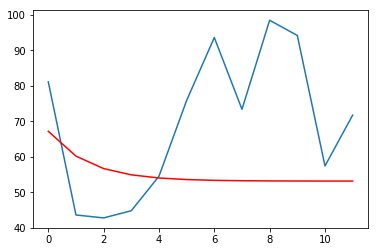

   ========== t = 215 ; D = 12 ========
d = 1:: predicted=48.555681, expected=43.632350
d = 2:: predicted=51.029362, expected=42.800860
d = 3:: predicted=52.272819, expected=44.828010
d = 4:: predicted=52.898453, expected=54.543480
d = 5:: predicted=53.213832, expected=75.885430
d = 6:: predicted=53.373365, expected=93.609180
d = 7:: predicted=53.454643, expected=73.391900
d = 8:: predicted=53.496621, expected=98.474440
d = 9:: predicted=53.518867, expected=94.187370
d = 10:: predicted=53.531197, expected=57.434360
d = 11:: predicted=53.538558, expected=71.750000
d = 12:: predicted=53.543421, expected=57.906300


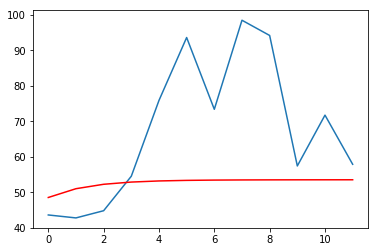

   ========== t = 216 ; D = 12 ========
d = 1:: predicted=46.945170, expected=42.800860
d = 2:: predicted=49.027585, expected=44.828010
d = 3:: predicted=50.074493, expected=54.543480
d = 4:: predicted=50.601372, expected=75.885430
d = 5:: predicted=50.867074, expected=93.609180
d = 6:: predicted=51.001612, expected=73.391900
d = 7:: predicted=51.070284, expected=98.474440
d = 8:: predicted=51.105877, expected=94.187370
d = 9:: predicted=51.124854, expected=57.434360
d = 10:: predicted=51.135495, expected=71.750000
d = 11:: predicted=51.141937, expected=57.906300
d = 12:: predicted=51.146281, expected=53.815250


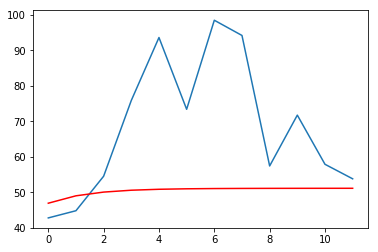

   ========== t = 217 ; D = 12 ========
d = 1:: predicted=47.182110, expected=44.828010
d = 2:: predicted=48.365416, expected=54.543480
d = 3:: predicted=48.960751, expected=75.885430
d = 4:: predicted=49.260794, expected=93.609180
d = 5:: predicted=49.412547, expected=73.391900
d = 6:: predicted=49.489813, expected=98.474440
d = 7:: predicted=49.529692, expected=94.187370
d = 8:: predicted=49.550786, expected=57.434360
d = 9:: predicted=49.562435, expected=71.750000
d = 10:: predicted=49.569360, expected=57.906300
d = 11:: predicted=49.573900, expected=53.815250
d = 12:: predicted=49.577245, expected=47.646080


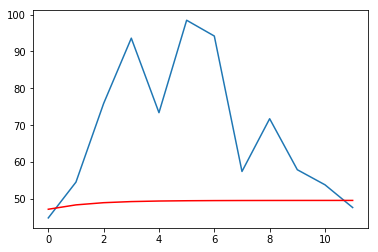

   ========== t = 218 ; D = 12 ========
d = 1:: predicted=52.318486, expected=54.543480
d = 2:: predicted=51.202159, expected=75.885430
d = 3:: predicted=50.642603, expected=93.609180
d = 4:: predicted=50.362676, expected=73.391900
d = 5:: predicted=50.223162, expected=98.474440
d = 6:: predicted=50.154173, expected=94.187370
d = 7:: predicted=50.120606, expected=57.434360
d = 8:: predicted=50.104817, expected=71.750000
d = 9:: predicted=50.097966, expected=57.906300
d = 10:: predicted=50.095608, expected=53.815250
d = 11:: predicted=50.095498, expected=47.646080
d = 12:: predicted=50.096517, expected=46.642760


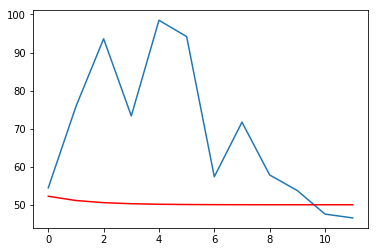

   ========== t = 219 ; D = 12 ========
d = 1:: predicted=65.297649, expected=75.885430
d = 2:: predicted=59.981545, expected=93.609180
d = 3:: predicted=57.312914, expected=73.391900
d = 4:: predicted=55.973887, expected=98.474440
d = 5:: predicted=55.302600, expected=94.187370
d = 6:: predicted=54.966659, expected=57.434360
d = 7:: predicted=54.799111, expected=71.750000
d = 8:: predicted=54.716168, expected=57.906300
d = 9:: predicted=54.675685, expected=53.815250
d = 10:: predicted=54.656566, expected=47.646080
d = 11:: predicted=54.648143, expected=46.642760
d = 12:: predicted=54.645085, expected=47.384360


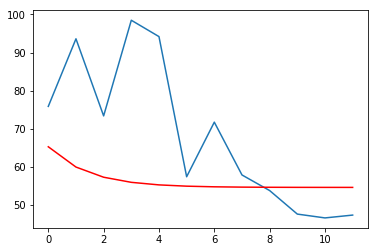

   ========== t = 220 ; D = 12 ========
d = 1:: predicted=78.101349, expected=93.609180
d = 2:: predicted=70.314337, expected=73.391900
d = 3:: predicted=66.404908, expected=98.474440
d = 4:: predicted=64.442886, expected=94.187370
d = 5:: predicted=63.458885, expected=57.434360
d = 6:: predicted=62.966059, expected=71.750000
d = 7:: predicted=62.719940, expected=57.906300
d = 8:: predicted=62.597709, expected=53.815250
d = 9:: predicted=62.537683, expected=47.646080
d = 10:: predicted=62.508918, expected=46.642760
d = 11:: predicted=62.495842, expected=47.384360
d = 12:: predicted=62.490650, expected=57.712110


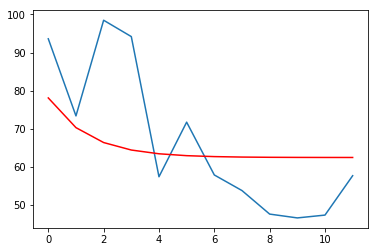

   ========== t = 221 ; D = 12 ========
d = 1:: predicted=69.906689, expected=73.391900
d = 2:: predicted=68.157917, expected=98.474440
d = 3:: predicted=67.281152, expected=94.187370
d = 4:: predicted=66.842319, expected=57.434360
d = 5:: predicted=66.623415, expected=71.750000
d = 6:: predicted=66.514929, expected=57.906300
d = 7:: predicted=66.461926, expected=53.815250
d = 8:: predicted=66.436780, expected=47.646080
d = 9:: predicted=66.425616, expected=46.642760
d = 10:: predicted=66.421472, expected=47.384360
d = 11:: predicted=66.420860, expected=57.712110
d = 12:: predicted=66.422022, expected=56.923320


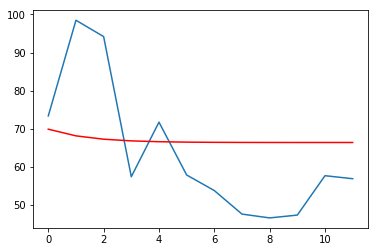

   ========== t = 222 ; D = 12 ========
d = 1:: predicted=85.364707, expected=98.474440
d = 2:: predicted=78.782649, expected=94.187370
d = 3:: predicted=75.478768, expected=57.434360
d = 4:: predicted=73.821184, expected=71.750000
d = 5:: predicted=72.990363, expected=57.906300
d = 6:: predicted=72.574732, expected=53.815250
d = 7:: predicted=72.367619, expected=47.646080
d = 8:: predicted=72.265205, expected=46.642760
d = 9:: predicted=72.215382, expected=47.384360
d = 10:: predicted=72.191949, expected=57.712110
d = 11:: predicted=72.181810, expected=56.923320
d = 12:: predicted=72.178331, expected=44.405610


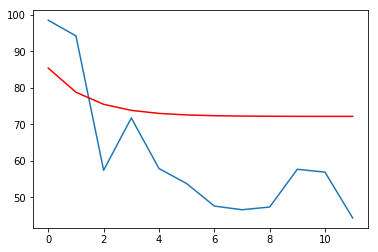

   ========== t = 223 ; D = 12 ========
d = 1:: predicted=85.913872, expected=94.187370
d = 2:: predicted=81.760750, expected=57.434360
d = 3:: predicted=79.676826, expected=71.750000
d = 4:: predicted=78.632039, expected=57.906300
d = 5:: predicted=78.109095, expected=53.815250
d = 6:: predicted=77.848232, expected=47.646080
d = 7:: predicted=77.718966, expected=46.642760
d = 8:: predicted=77.655783, expected=47.384360
d = 9:: predicted=77.625780, expected=57.712110
d = 10:: predicted=77.612458, expected=56.923320
d = 11:: predicted=77.607503, expected=44.405610
d = 12:: predicted=77.606770, expected=43.857210


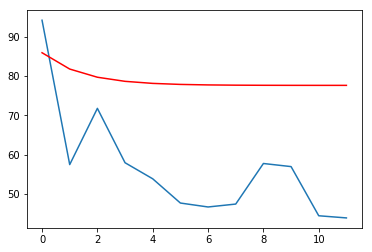

   ========== t = 224 ; D = 12 ========
d = 1:: predicted=66.402795, expected=57.434360
d = 2:: predicted=70.908176, expected=71.750000
d = 3:: predicted=73.172347, expected=57.906300
d = 4:: predicted=74.311022, expected=53.815250
d = 5:: predicted=74.884524, expected=47.646080
d = 6:: predicted=75.174197, expected=46.642760
d = 7:: predicted=75.321354, expected=47.384360
d = 8:: predicted=75.396929, expected=57.712110
d = 9:: predicted=75.436577, expected=56.923320
d = 10:: predicted=75.458166, expected=44.405610
d = 11:: predicted=75.470683, expected=43.857210
d = 12:: predicted=75.478650, expected=42.464210


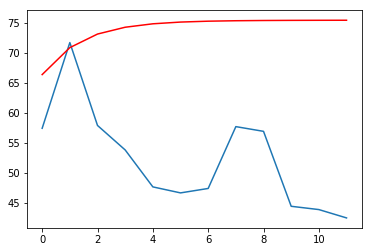

   ========== t = 225 ; D = 12 ========
d = 1:: predicted=72.700046, expected=71.750000
d = 2:: predicted=73.178755, expected=57.906300
d = 3:: predicted=73.420785, expected=53.815250
d = 4:: predicted=73.543967, expected=47.646080
d = 5:: predicted=73.607475, expected=46.642760
d = 6:: predicted=73.641002, expected=47.384360
d = 7:: predicted=73.659481, expected=57.712110
d = 8:: predicted=73.670406, expected=56.923320
d = 9:: predicted=73.677526, expected=44.405610
d = 10:: predicted=73.682735, expected=43.857210
d = 11:: predicted=73.686996, expected=42.464210
d = 12:: predicted=73.690766, expected=40.732280


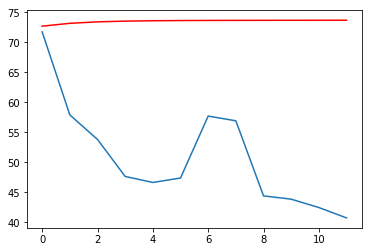

   ========== t = 226 ; D = 12 ========
d = 1:: predicted=64.421483, expected=57.906300
d = 2:: predicted=67.694772, expected=53.815250
d = 3:: predicted=69.340080, expected=47.646080
d = 4:: predicted=70.167862, expected=46.642760
d = 5:: predicted=70.585127, expected=47.384360
d = 6:: predicted=70.796229, expected=57.712110
d = 7:: predicted=70.903818, expected=56.923320
d = 8:: predicted=70.959418, expected=44.405610
d = 9:: predicted=70.988911, expected=43.857210
d = 10:: predicted=71.005299, expected=42.464210
d = 11:: predicted=71.015102, expected=40.732280
d = 12:: predicted=71.021605, expected=41.911230


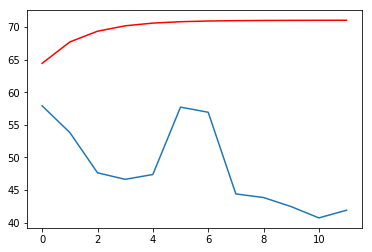

   ========== t = 227 ; D = 12 ========
d = 1:: predicted=60.545140, expected=53.815250
d = 2:: predicted=63.926158, expected=47.646080
d = 3:: predicted=65.625481, expected=46.642760
d = 4:: predicted=66.480307, expected=47.384360
d = 5:: predicted=66.911064, expected=57.712110
d = 6:: predicted=67.128868, expected=56.923320
d = 7:: predicted=67.239722, expected=44.405610
d = 8:: predicted=67.296872, expected=43.857210
d = 9:: predicted=67.327057, expected=42.464210
d = 10:: predicted=67.343694, expected=40.732280
d = 11:: predicted=67.353530, expected=41.911230
d = 12:: predicted=67.359963, expected=41.642790


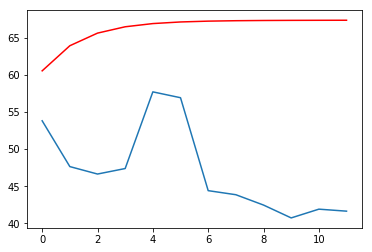

   ========== t = 228 ; D = 12 ========
d = 1:: predicted=55.405513, expected=47.646080
d = 2:: predicted=59.303439, expected=46.642760
d = 3:: predicted=61.262244, expected=47.384360
d = 4:: predicted=62.247263, expected=57.712110
d = 5:: predicted=62.743305, expected=56.923320
d = 6:: predicted=62.993783, expected=44.405610
d = 7:: predicted=63.120961, expected=43.857210
d = 8:: predicted=63.186195, expected=42.464210
d = 9:: predicted=63.220358, expected=40.732280
d = 10:: predicted=63.238883, expected=41.911230
d = 11:: predicted=63.249568, expected=41.642790
d = 12:: predicted=63.256328, expected=51.001060


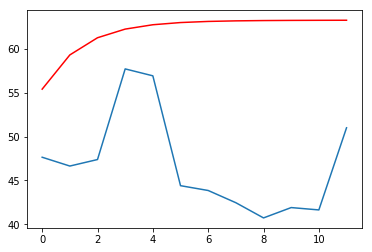

   ========== t = 229 ; D = 12 ========
d = 1:: predicted=53.040665, expected=46.642760
d = 2:: predicted=56.254756, expected=47.384360
d = 3:: predicted=57.870063, expected=57.712110
d = 4:: predicted=58.682507, expected=56.923320
d = 5:: predicted=59.091783, expected=44.405610
d = 6:: predicted=59.298598, expected=43.857210
d = 7:: predicted=59.403750, expected=42.464210
d = 8:: predicted=59.457844, expected=40.732280
d = 9:: predicted=59.486309, expected=41.911230
d = 10:: predicted=59.501897, expected=41.642790
d = 11:: predicted=59.511020, expected=51.001060
d = 12:: predicted=59.516888, expected=47.490800


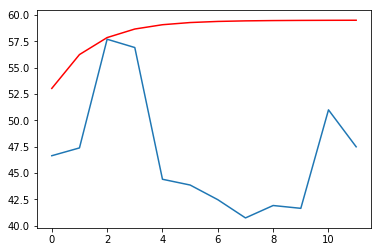

   ========== t = 230 ; D = 12 ========
d = 1:: predicted=52.007837, expected=47.384360
d = 2:: predicted=54.330801, expected=57.712110
d = 3:: predicted=55.498526, expected=56.923320
d = 4:: predicted=56.086134, expected=44.405610
d = 5:: predicted=56.382453, expected=43.857210
d = 6:: predicted=56.532468, expected=42.464210
d = 7:: predicted=56.609033, expected=40.732280
d = 8:: predicted=56.648690, expected=41.911230
d = 9:: predicted=56.669842, expected=41.642790
d = 10:: predicted=56.681689, expected=51.001060
d = 11:: predicted=56.688859, expected=47.490800
d = 12:: predicted=56.693704, expected=54.359340


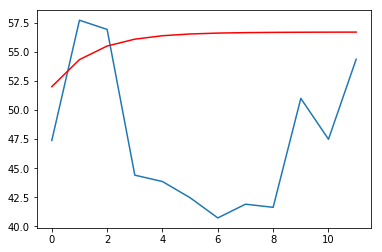

   ========== t = 231 ; D = 12 ========
d = 1:: predicted=56.977999, expected=57.712110
d = 2:: predicted=56.610571, expected=56.923320
d = 3:: predicted=56.427283, expected=44.405610
d = 4:: predicted=56.336467, expected=43.857210
d = 5:: predicted=56.292061, expected=42.464210
d = 6:: predicted=56.270985, expected=40.732280
d = 7:: predicted=56.261607, expected=41.911230
d = 8:: predicted=56.258117, expected=41.642790
d = 9:: predicted=56.257584, expected=51.001060
d = 10:: predicted=56.258531, expected=47.490800
d = 11:: predicted=56.260232, expected=54.359340
d = 12:: predicted=56.262285, expected=54.392020


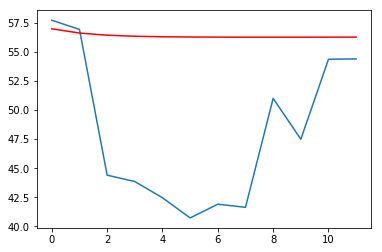

   ========== t = 232 ; D = 12 ========
d = 1:: predicted=56.701317, expected=56.923320
d = 2:: predicted=56.591056, expected=44.405610
d = 3:: predicted=56.536915, expected=43.857210
d = 4:: predicted=56.510935, expected=42.464210
d = 5:: predicted=56.499113, expected=40.732280
d = 6:: predicted=56.494402, expected=41.911230
d = 7:: predicted=56.493251, expected=41.642790
d = 8:: predicted=56.493897, expected=51.001060
d = 9:: predicted=56.495431, expected=47.490800
d = 10:: predicted=56.497417, expected=54.359340
d = 11:: predicted=56.499652, expected=54.392020
d = 12:: predicted=56.502002, expected=53.212470


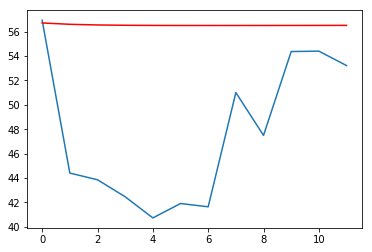

   ========== t = 233 ; D = 12 ========
d = 1:: predicted=49.462734, expected=44.405610
d = 2:: predicted=52.003377, expected=43.857210
d = 3:: predicted=53.280363, expected=42.464210
d = 4:: predicted=53.922792, expected=40.732280
d = 5:: predicted=54.246563, expected=41.911230
d = 6:: predicted=54.410335, expected=41.642790
d = 7:: predicted=54.493721, expected=51.001060
d = 8:: predicted=54.536785, expected=47.490800
d = 9:: predicted=54.559574, expected=54.359340
d = 10:: predicted=54.572196, expected=54.392020
d = 11:: predicted=54.579713, expected=53.212470
d = 12:: predicted=54.584656, expected=45.909270


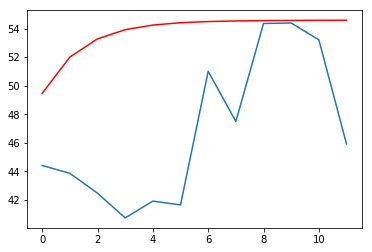

   ========== t = 234 ; D = 12 ========
d = 1:: predicted=47.986017, expected=43.857210
d = 2:: predicted=50.060449, expected=42.464210
d = 3:: predicted=51.103262, expected=40.732280
d = 4:: predicted=51.628026, expected=41.911230
d = 5:: predicted=51.892665, expected=41.642790
d = 6:: predicted=52.026681, expected=51.001060
d = 7:: predicted=52.095084, expected=47.490800
d = 8:: predicted=52.130542, expected=54.359340
d = 9:: predicted=52.149452, expected=54.392020
d = 10:: predicted=52.160076, expected=53.212470
d = 11:: predicted=52.166514, expected=45.909270
d = 12:: predicted=52.170869, expected=51.512340


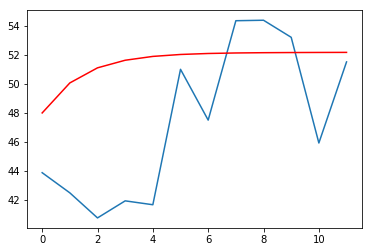

   ========== t = 235 ; D = 12 ========
d = 1:: predicted=46.230601, expected=42.464210
d = 2:: predicted=48.122984, expected=40.732280
d = 3:: predicted=49.074319, expected=41.911230
d = 4:: predicted=49.553093, expected=41.642790
d = 5:: predicted=49.794586, expected=51.001060
d = 6:: predicted=49.916926, expected=47.490800
d = 7:: predicted=49.979420, expected=54.359340
d = 8:: predicted=50.011863, expected=54.392020
d = 9:: predicted=50.029212, expected=53.212470
d = 10:: predicted=50.038996, expected=45.909270
d = 11:: predicted=50.044972, expected=51.512340
d = 12:: predicted=50.049031, expected=50.339610


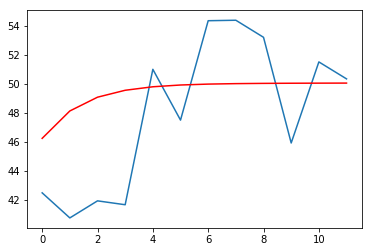

   ========== t = 236 ; D = 12 ========
d = 1:: predicted=44.360683, expected=40.732280
d = 2:: predicted=46.183723, expected=41.911230
d = 3:: predicted=47.100194, expected=41.642790
d = 4:: predicted=47.561410, expected=51.001060
d = 5:: predicted=47.794038, expected=47.490800
d = 6:: predicted=47.911854, expected=54.359340
d = 7:: predicted=47.972034, expected=54.392020
d = 8:: predicted=48.003276, expected=53.212470
d = 9:: predicted=48.019987, expected=45.909270
d = 10:: predicted=48.029383, expected=51.512340
d = 11:: predicted=48.035113, expected=50.339610
d = 12:: predicted=48.039015, expected=43.850740


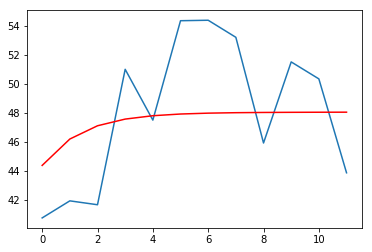

   ========== t = 237 ; D = 12 ========
d = 1:: predicted=44.220560, expected=41.911230
d = 2:: predicted=45.381173, expected=41.642790
d = 3:: predicted=45.964965, expected=51.001060
d = 4:: predicted=46.259109, expected=47.490800
d = 5:: predicted=46.407785, expected=54.359340
d = 6:: predicted=46.483421, expected=54.392020
d = 7:: predicted=46.522381, expected=53.212470
d = 8:: predicted=46.542925, expected=45.909270
d = 9:: predicted=46.554217, expected=51.512340
d = 10:: predicted=46.560875, expected=50.339610
d = 11:: predicted=46.565188, expected=43.850740
d = 12:: predicted=46.568339, expected=44.439540


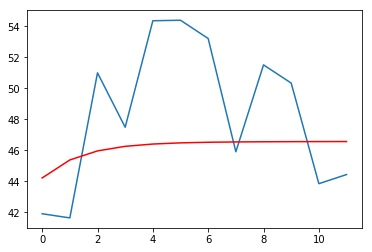

   ========== t = 238 ; D = 12 ========
d = 1:: predicted=43.540682, expected=41.642790
d = 2:: predicted=44.494673, expected=51.001060
d = 3:: predicted=44.974684, expected=47.490800
d = 4:: predicted=45.216686, expected=54.359340
d = 5:: predicted=45.339148, expected=54.392020
d = 6:: predicted=45.401584, expected=53.212470
d = 7:: predicted=45.433905, expected=45.909270
d = 8:: predicted=45.451078, expected=51.512340
d = 9:: predicted=45.460656, expected=50.339610
d = 10:: predicted=45.466418, expected=43.850740
d = 11:: predicted=45.470263, expected=44.439540
d = 12:: predicted=45.473148, expected=42.863270


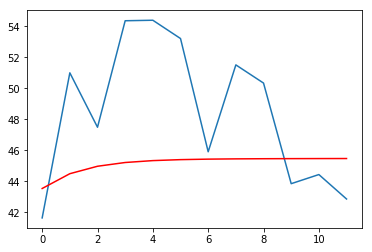

   ========== t = 239 ; D = 12 ========
d = 1:: predicted=48.572630, expected=51.001060
d = 2:: predicted=47.354166, expected=47.490800
d = 3:: predicted=46.743258, expected=54.359340
d = 4:: predicted=46.437466, expected=54.392020
d = 5:: predicted=46.284873, expected=53.212470
d = 6:: predicted=46.209210, expected=45.909270
d = 7:: predicted=46.172188, expected=51.512340
d = 8:: predicted=46.154556, expected=50.339610
d = 9:: predicted=46.146680, expected=43.850740
d = 10:: predicted=46.143694, expected=44.439540
d = 11:: predicted=46.143155, expected=42.863270
d = 12:: predicted=46.143851, expected=41.391620


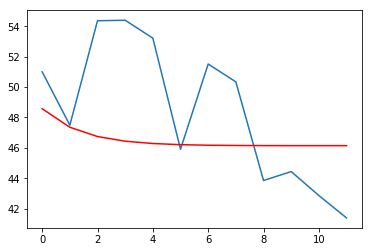

   ========== t = 240 ; D = 12 ========
d = 1:: predicted=47.097264, expected=47.490800
d = 2:: predicted=46.900624, expected=54.359340
d = 3:: predicted=46.802860, expected=54.392020
d = 4:: predicted=46.754758, expected=53.212470
d = 5:: predicted=46.731572, expected=45.909270
d = 6:: predicted=46.720914, expected=51.512340
d = 7:: predicted=46.716538, expected=50.339610
d = 8:: predicted=46.715326, expected=43.850740
d = 9:: predicted=46.715697, expected=44.439540
d = 10:: predicted=46.716863, expected=42.863270
d = 11:: predicted=46.718439, expected=41.391620
d = 12:: predicted=46.720202, expected=50.912580


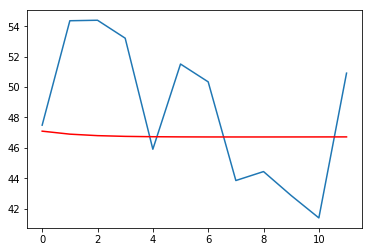

   ========== t = 241 ; D = 12 ========
d = 1:: predicted=51.206993, expected=54.359340
d = 2:: predicted=49.625035, expected=54.392020
d = 3:: predicted=48.831664, expected=53.212470
d = 4:: predicted=48.434262, expected=45.909270
d = 5:: predicted=48.235728, expected=51.512340
d = 6:: predicted=48.137038, expected=50.339610
d = 7:: predicted=48.088497, expected=43.850740
d = 8:: predicted=48.065136, expected=44.439540
d = 9:: predicted=48.054418, expected=42.863270
d = 10:: predicted=48.050037, expected=41.391620
d = 11:: predicted=48.048854, expected=50.912580
d = 12:: predicted=48.049263, expected=47.546500


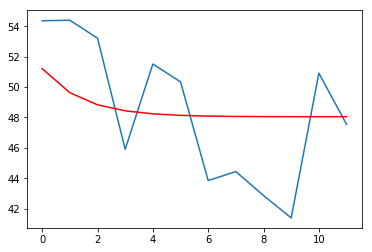

   ========== t = 242 ; D = 12 ========
d = 1:: predicted=51.966807, expected=54.392020
d = 2:: predicted=50.750022, expected=53.212470
d = 3:: predicted=50.140051, expected=45.909270
d = 4:: predicted=49.834806, expected=51.512340
d = 5:: predicted=49.682572, expected=50.339610
d = 6:: predicted=49.607176, expected=43.850740
d = 7:: predicted=49.570366, expected=44.439540
d = 8:: predicted=49.552916, expected=42.863270
d = 9:: predicted=49.545227, expected=41.391620
d = 10:: predicted=49.542397, expected=50.912580
d = 11:: predicted=49.542018, expected=47.546500
d = 12:: predicted=49.542879, expected=47.567260


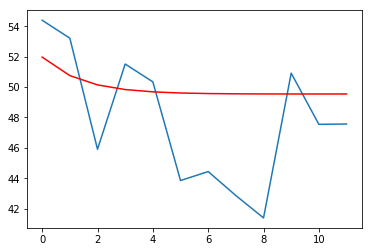

   ========== t = 243 ; D = 12 ========
d = 1:: predicted=51.851507, expected=53.212470
d = 2:: predicted=51.169157, expected=45.909270
d = 3:: predicted=50.827569, expected=51.512340
d = 4:: predicted=50.657122, expected=50.339610
d = 5:: predicted=50.572606, expected=43.850740
d = 6:: predicted=50.531232, expected=44.439540
d = 7:: predicted=50.511518, expected=42.863270
d = 8:: predicted=50.502680, expected=41.391620
d = 9:: predicted=50.499315, expected=50.912580
d = 10:: predicted=50.498698, expected=47.546500
d = 11:: predicted=50.499457, expected=47.567260
d = 12:: predicted=50.500886, expected=47.451790


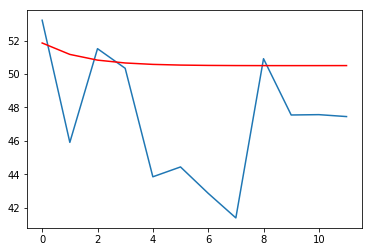

   ========== t = 244 ; D = 12 ========
d = 1:: predicted=47.917231, expected=45.909270
d = 2:: predicted=48.926589, expected=51.512340
d = 3:: predicted=49.434502, expected=50.339610
d = 4:: predicted=49.690607, expected=43.850740
d = 5:: predicted=49.820261, expected=44.439540
d = 6:: predicted=49.886423, expected=42.863270
d = 7:: predicted=49.920716, expected=41.391620
d = 8:: predicted=49.938996, expected=50.912580
d = 9:: predicted=49.949219, expected=47.546500
d = 10:: predicted=49.955410, expected=47.567260
d = 11:: predicted=49.959566, expected=47.451790
d = 12:: predicted=49.962712, expected=47.476480


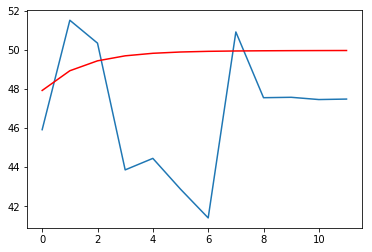

   ========== t = 245 ; D = 12 ========
d = 1:: predicted=50.733814, expected=51.512340
d = 2:: predicted=50.343933, expected=50.339610
d = 3:: predicted=50.149208, expected=43.850740
d = 4:: predicted=50.052487, expected=44.439540
d = 5:: predicted=50.004960, expected=42.863270
d = 6:: predicted=49.982143, expected=41.391620
d = 7:: predicted=49.971751, expected=50.912580
d = 8:: predicted=49.967594, expected=47.546500
d = 9:: predicted=49.966552, expected=47.567260
d = 10:: predicted=49.967085, expected=47.451790
d = 11:: predicted=49.968396, expected=47.476480
d = 12:: predicted=49.970112, expected=42.740570


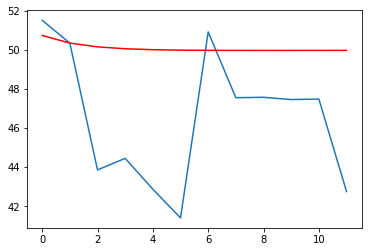

   ========== t = 246 ; D = 12 ========
d = 1:: predicted=50.241589, expected=50.339610
d = 2:: predicted=50.193426, expected=43.850740
d = 3:: predicted=50.170293, expected=44.439540
d = 4:: predicted=50.159750, expected=42.863270
d = 5:: predicted=50.155511, expected=41.391620
d = 6:: predicted=50.154436, expected=50.912580
d = 7:: predicted=50.154955, expected=47.546500
d = 8:: predicted=50.156283, expected=47.567260
d = 9:: predicted=50.157992, expected=47.451790
d = 10:: predicted=50.159921, expected=47.476480
d = 11:: predicted=50.161943, expected=42.740570
d = 12:: predicted=50.164012, expected=39.086700


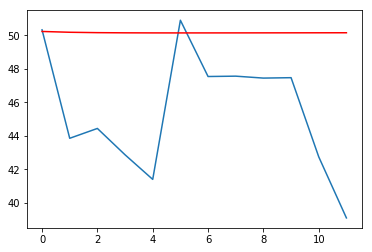

   ========== t = 247 ; D = 12 ========
d = 1:: predicted=46.490154, expected=43.850740
d = 2:: predicted=47.816575, expected=44.439540
d = 3:: predicted=48.483674, expected=42.863270
d = 4:: predicted=48.819701, expected=41.391620
d = 5:: predicted=48.989474, expected=50.912580
d = 6:: predicted=49.075755, expected=47.546500
d = 7:: predicted=49.120111, expected=47.567260
d = 8:: predicted=49.143412, expected=47.451790
d = 9:: predicted=49.156160, expected=47.476480
d = 10:: predicted=49.163597, expected=42.740570
d = 11:: predicted=49.168352, expected=39.086700
d = 12:: predicted=49.171784, expected=39.883490


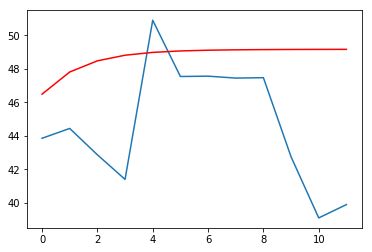

   ========== t = 248 ; D = 12 ========
d = 1:: predicted=46.234710, expected=44.439540
d = 2:: predicted=47.137176, expected=42.863270
d = 3:: predicted=47.591360, expected=41.391620
d = 4:: predicted=47.820431, expected=50.912580
d = 5:: predicted=47.936466, expected=47.546500
d = 6:: predicted=47.995743, expected=47.567260
d = 7:: predicted=48.026513, expected=47.451790
d = 8:: predicted=48.042976, expected=47.476480
d = 9:: predicted=48.052248, expected=42.740570
d = 10:: predicted=48.057910, expected=39.086700
d = 11:: predicted=48.061754, expected=39.883490
d = 12:: predicted=48.064701, expected=37.939610


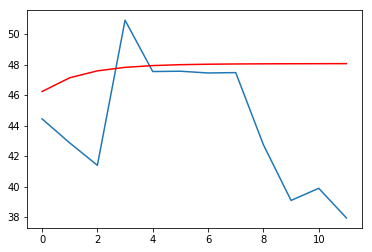

   ========== t = 249 ; D = 12 ========
d = 1:: predicted=44.911037, expected=42.863270
d = 2:: predicted=45.940319, expected=41.391620
d = 3:: predicted=46.458152, expected=50.912580
d = 4:: predicted=46.719163, expected=47.546500
d = 5:: predicted=46.851206, expected=47.567260
d = 6:: predicted=46.918499, expected=47.451790
d = 7:: predicted=46.953266, expected=47.476480
d = 8:: predicted=46.971702, expected=42.740570
d = 9:: predicted=46.981959, expected=39.086700
d = 10:: predicted=46.988081, expected=39.883490
d = 11:: predicted=46.992137, expected=37.939610
d = 12:: predicted=46.995153, expected=38.274090


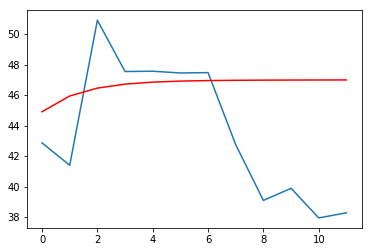

   ========== t = 250 ; D = 12 ========
d = 1:: predicted=43.589672, expected=41.391620
d = 2:: predicted=44.694396, expected=50.912580
d = 3:: predicted=45.250072, expected=47.546500
d = 4:: predicted=45.530062, expected=47.567260
d = 5:: predicted=45.671619, expected=47.451790
d = 6:: predicted=45.743648, expected=47.476480
d = 7:: predicted=45.780781, expected=42.740570
d = 8:: predicted=45.800367, expected=39.086700
d = 9:: predicted=45.811160, expected=39.883490
d = 10:: predicted=45.817524, expected=37.939610
d = 11:: predicted=45.821687, expected=38.274090
d = 12:: predicted=45.824716, expected=36.718430


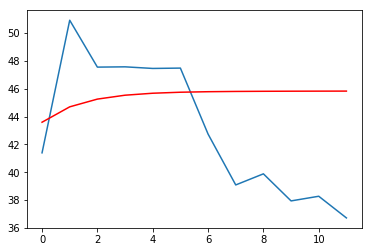

   ========== t = 251 ; D = 12 ========
d = 1:: predicted=48.647086, expected=50.912580
d = 2:: predicted=47.510424, expected=47.546500
d = 3:: predicted=46.940618, expected=47.567260
d = 4:: predicted=46.655462, expected=47.451790
d = 5:: predicted=46.513231, expected=47.476480
d = 6:: predicted=46.442767, expected=42.740570
d = 7:: predicted=46.408350, expected=39.086700
d = 8:: predicted=46.392036, expected=39.883490
d = 9:: predicted=46.384806, expected=37.939610
d = 10:: predicted=46.382142, expected=38.274090
d = 11:: predicted=46.381776, expected=36.718430
d = 12:: predicted=46.382542, expected=35.957770


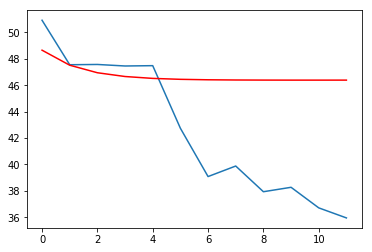

   ========== t = 252 ; D = 12 ========
d = 1:: predicted=47.218126, expected=47.546500
d = 2:: predicted=47.054218, expected=47.567260
d = 3:: predicted=46.972888, expected=47.451790
d = 4:: predicted=46.933030, expected=47.476480
d = 5:: predicted=46.913988, expected=42.740570
d = 6:: predicted=46.905404, expected=39.086700
d = 7:: predicted=46.902064, expected=39.883490
d = 8:: predicted=46.901370, expected=37.939610
d = 9:: predicted=46.901994, expected=38.274090
d = 10:: predicted=46.903276, expected=36.718430
d = 11:: predicted=46.904914, expected=35.957770
d = 12:: predicted=46.906713, expected=35.842230


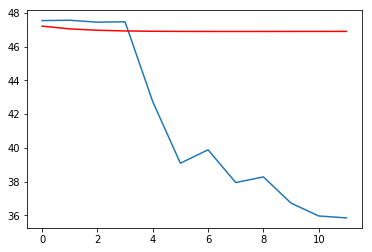

   ========== t = 253 ; D = 12 ========
d = 1:: predicted=47.317250, expected=47.567260
d = 2:: predicted=47.192685, expected=47.451790
d = 3:: predicted=47.131122, expected=47.476480
d = 4:: predicted=47.101178, expected=42.740570
d = 5:: predicted=47.087124, expected=39.086700
d = 6:: predicted=47.081049, expected=39.883490
d = 7:: predicted=47.078982, expected=37.939610
d = 8:: predicted=47.078915, expected=38.274090
d = 9:: predicted=47.079877, expected=36.718430
d = 10:: predicted=47.081332, expected=35.957770
d = 11:: predicted=47.083048, expected=35.842230
d = 12:: predicted=47.084878, expected=35.728120


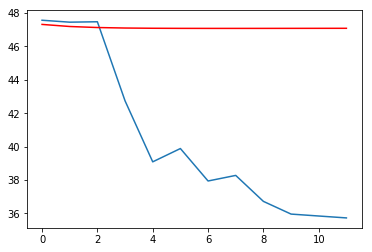

   ========== t = 254 ; D = 12 ========
d = 1:: predicted=47.318793, expected=47.451790
d = 2:: predicted=47.252992, expected=47.476480
d = 3:: predicted=47.220921, expected=42.740570
d = 4:: predicted=47.205799, expected=39.086700
d = 5:: predicted=47.199200, expected=39.883490
d = 6:: predicted=47.196859, expected=37.939610
d = 7:: predicted=47.196679, expected=38.274090
d = 8:: predicted=47.197571, expected=36.718430
d = 9:: predicted=47.198993, expected=35.957770
d = 10:: predicted=47.200693, expected=35.842230
d = 11:: predicted=47.202529, expected=35.728120
d = 12:: predicted=47.204432, expected=47.158040


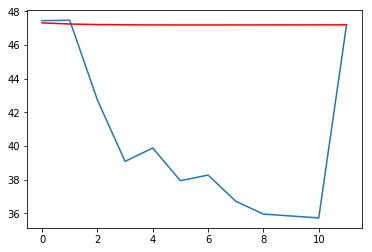

   ========== t = 255 ; D = 12 ========
d = 1:: predicted=47.375066, expected=47.476480
d = 2:: predicted=47.325130, expected=42.740570
d = 3:: predicted=47.301031, expected=39.086700
d = 4:: predicted=47.289917, expected=39.883490
d = 5:: predicted=47.285317, expected=37.939610
d = 6:: predicted=47.284001, expected=38.274090
d = 7:: predicted=47.284318, expected=36.718430
d = 8:: predicted=47.285461, expected=35.957770
d = 9:: predicted=47.287012, expected=35.842230
d = 10:: predicted=47.288783, expected=35.728120
d = 11:: predicted=47.290656, expected=47.158040
d = 12:: predicted=47.292584, expected=41.010860


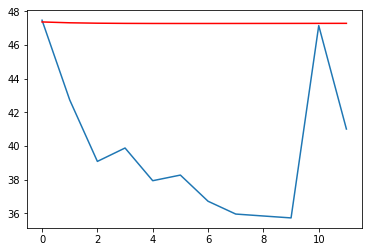

   ========== t = 256 ; D = 12 ========
d = 1:: predicted=44.646390, expected=42.740570
d = 2:: predicted=45.604354, expected=39.086700
d = 3:: predicted=46.086362, expected=39.883490
d = 4:: predicted=46.329391, expected=37.939610
d = 5:: predicted=46.452381, expected=38.274090
d = 6:: predicted=46.515112, expected=36.718430
d = 7:: predicted=46.547580, expected=35.957770
d = 8:: predicted=46.564851, expected=35.842230
d = 9:: predicted=46.574478, expected=35.728120
d = 10:: predicted=46.580293, expected=47.158040
d = 11:: predicted=46.584186, expected=41.010860
d = 12:: predicted=46.587101, expected=35.557450


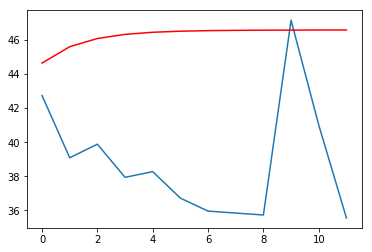

   ========== t = 257 ; D = 12 ========
d = 1:: predicted=42.084432, expected=39.086700
d = 2:: predicted=43.590689, expected=39.883490
d = 3:: predicted=44.347992, expected=37.939610
d = 4:: predicted=44.729200, expected=38.274090
d = 5:: predicted=44.921565, expected=36.718430
d = 6:: predicted=45.019090, expected=35.957770
d = 7:: predicted=45.068998, expected=35.842230
d = 8:: predicted=45.094997, expected=35.728120
d = 9:: predicted=45.108984, expected=47.158040
d = 10:: predicted=45.116929, expected=41.010860
d = 11:: predicted=45.121854, expected=35.557450
d = 12:: predicted=45.125259, expected=35.436090


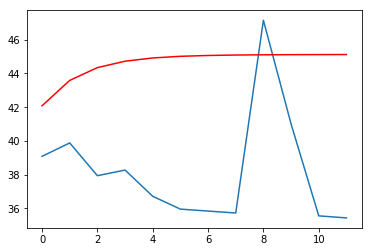

   ========== t = 258 ; D = 12 ========
d = 1:: predicted=41.866300, expected=39.883490
d = 2:: predicted=42.862867, expected=37.939610
d = 3:: predicted=43.364201, expected=38.274090
d = 4:: predicted=43.616845, expected=36.718430
d = 5:: predicted=43.744615, expected=35.957770
d = 6:: predicted=43.809684, expected=35.842230
d = 7:: predicted=43.843260, expected=35.728120
d = 8:: predicted=43.861015, expected=47.158040
d = 9:: predicted=43.870844, expected=41.010860
d = 10:: predicted=43.876672, expected=35.557450
d = 11:: predicted=43.880502, expected=35.436090
d = 12:: predicted=43.883327, expected=34.592700


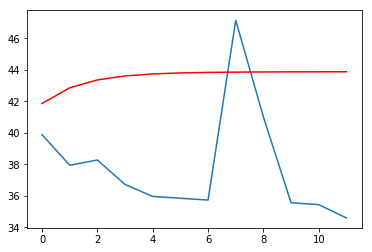

   ========== t = 259 ; D = 12 ========
d = 1:: predicted=40.283532, expected=37.939610
d = 2:: predicted=41.461406, expected=38.274090
d = 3:: predicted=42.053754, expected=36.718430
d = 4:: predicted=42.352070, expected=35.957770
d = 5:: predicted=42.502749, expected=35.842230
d = 6:: predicted=42.579285, expected=35.728120
d = 7:: predicted=42.618593, expected=47.158040
d = 8:: predicted=42.639199, expected=41.010860
d = 9:: predicted=42.650420, expected=35.557450
d = 10:: predicted=42.656934, expected=35.436090
d = 11:: predicted=42.661069, expected=34.592700
d = 12:: predicted=42.664026, expected=32.707500


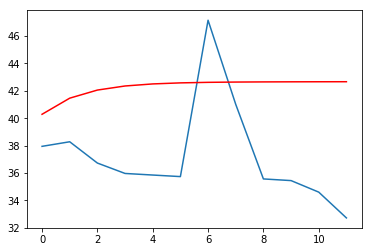

   ========== t = 260 ; D = 12 ========
d = 1:: predicted=39.946236, expected=38.274090
d = 2:: predicted=40.786762, expected=36.718430
d = 3:: predicted=41.209686, expected=35.957770
d = 4:: predicted=41.422900, expected=35.842230
d = 5:: predicted=41.530816, expected=35.728120
d = 6:: predicted=41.585841, expected=47.158040
d = 7:: predicted=41.614328, expected=41.010860
d = 8:: predicted=41.629478, expected=35.557450
d = 9:: predicted=41.637940, expected=35.436090
d = 10:: predicted=41.643043, expected=34.592700
d = 11:: predicted=41.646451, expected=32.707500
d = 12:: predicted=41.649010, expected=34.796400


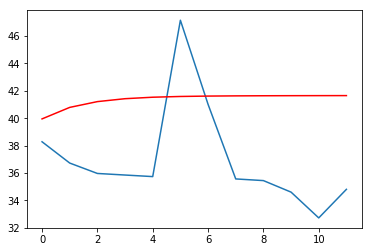

   ========== t = 261 ; D = 12 ========
d = 1:: predicted=38.661244, expected=36.718430
d = 2:: predicted=39.637668, expected=35.957770
d = 3:: predicted=40.128813, expected=35.842230
d = 4:: predicted=40.376254, expected=35.728120
d = 5:: predicted=40.501340, expected=47.158040
d = 6:: predicted=40.564971, expected=41.010860
d = 7:: predicted=40.597755, expected=35.557450
d = 8:: predicted=40.615038, expected=35.436090
d = 9:: predicted=40.624545, expected=34.592700
d = 10:: predicted=40.630139, expected=32.707500
d = 11:: predicted=40.633769, expected=34.796400
d = 12:: predicted=40.636407, expected=32.533110


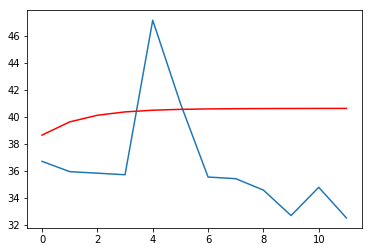

   ========== t = 262 ; D = 12 ========
d = 1:: predicted=37.777235, expected=35.957770
d = 2:: predicted=38.691679, expected=35.842230
d = 3:: predicted=39.151664, expected=35.728120
d = 4:: predicted=39.383448, expected=47.158040
d = 5:: predicted=39.500646, expected=41.010860
d = 6:: predicted=39.560291, expected=35.557450
d = 7:: predicted=39.591037, expected=35.436090
d = 8:: predicted=39.607287, expected=34.592700
d = 9:: predicted=39.616240, expected=32.707500
d = 10:: predicted=39.621546, expected=34.796400
d = 11:: predicted=39.625000, expected=32.533110
d = 12:: predicted=39.627537, expected=33.213820


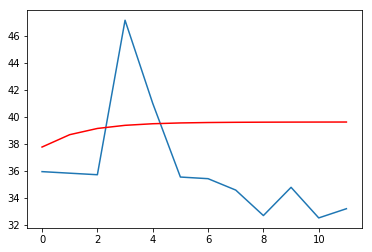

   ========== t = 263 ; D = 12 ========
d = 1:: predicted=37.297885, expected=35.842230
d = 2:: predicted=38.029619, expected=35.728120
d = 3:: predicted=38.397834, expected=47.158040
d = 4:: predicted=38.583530, expected=41.010860
d = 5:: predicted=38.677558, expected=35.557450
d = 6:: predicted=38.725543, expected=35.436090
d = 7:: predicted=38.750420, expected=34.592700
d = 8:: predicted=38.763703, expected=32.707500
d = 9:: predicted=38.771144, expected=34.796400
d = 10:: predicted=38.775652, expected=32.533110
d = 11:: predicted=38.778698, expected=33.213820
d = 12:: predicted=38.781023, expected=27.531410


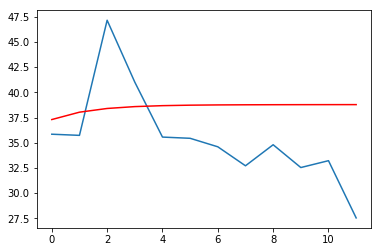

   ========== t = 264 ; D = 12 ========
d = 1:: predicted=36.903314, expected=35.728120
d = 2:: predicted=37.494205, expected=47.158040
d = 3:: predicted=37.791681, expected=41.010860
d = 4:: predicted=37.941821, expected=35.557450
d = 5:: predicted=38.017979, expected=35.436090
d = 6:: predicted=38.056984, expected=34.592700
d = 7:: predicted=38.077323, expected=32.707500
d = 8:: predicted=38.088310, expected=34.796400
d = 9:: predicted=38.094582, expected=32.533110
d = 10:: predicted=38.098507, expected=33.213820
d = 11:: predicted=38.101235, expected=27.531410
d = 12:: predicted=38.103375, expected=38.364960


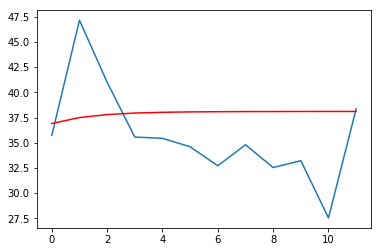

   ========== t = 265 ; D = 12 ========
d = 1:: predicted=43.309052, expected=47.158040
d = 2:: predicted=41.377074, expected=41.010860
d = 3:: predicted=40.407723, expected=35.557450
d = 4:: predicted=39.921748, expected=35.436090
d = 5:: predicted=39.678522, expected=34.592700
d = 6:: predicted=39.557175, expected=32.707500
d = 7:: predicted=39.497032, expected=34.796400
d = 8:: predicted=39.467625, expected=32.533110
d = 9:: predicted=39.453650, expected=33.213820
d = 10:: predicted=39.447421, expected=27.531410
d = 11:: predicted=39.445088, expected=38.364960
d = 12:: predicted=39.444731, expected=43.123380


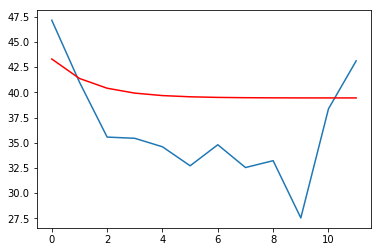

   ========== t = 266 ; D = 12 ========
d = 1:: predicted=40.621849, expected=41.010860
d = 2:: predicted=40.427310, expected=35.557450
d = 3:: predicted=40.330442, expected=35.436090
d = 4:: predicted=40.282601, expected=34.592700
d = 5:: predicted=40.259405, expected=32.707500
d = 6:: predicted=40.248569, expected=34.796400
d = 7:: predicted=40.243942, expected=32.533110
d = 8:: predicted=40.242422, expected=33.213820
d = 9:: predicted=40.242479, expected=27.531410
d = 10:: predicted=40.243314, expected=38.364960
d = 11:: predicted=40.244548, expected=43.123380
d = 12:: predicted=40.245984, expected=53.209500


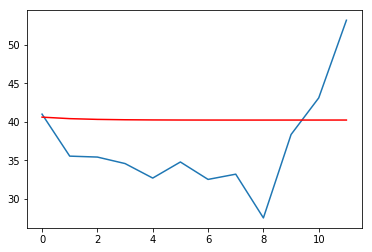

   ========== t = 267 ; D = 12 ========
d = 1:: predicted=37.539120, expected=35.557450
d = 2:: predicted=38.534997, expected=35.436090
d = 3:: predicted=39.035889, expected=34.592700
d = 4:: predicted=39.288204, expected=32.707500
d = 5:: predicted=39.415706, expected=34.796400
d = 6:: predicted=39.480523, expected=32.533110
d = 7:: predicted=39.513863, expected=33.213820
d = 8:: predicted=39.531401, expected=27.531410
d = 9:: predicted=39.540997, expected=38.364960
d = 10:: predicted=39.546623, expected=43.123380
d = 11:: predicted=39.550247, expected=53.209500
d = 12:: predicted=39.552857, expected=44.670590


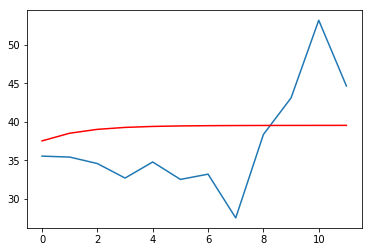

   ========== t = 268 ; D = 12 ========
d = 1:: predicted=37.018799, expected=35.436090
d = 2:: predicted=37.814327, expected=34.592700
d = 3:: predicted=38.214580, expected=32.707500
d = 4:: predicted=38.416344, expected=34.796400
d = 5:: predicted=38.518435, expected=32.533110
d = 6:: predicted=38.570472, expected=33.213820
d = 7:: predicted=38.597361, expected=27.531410
d = 8:: predicted=38.611642, expected=38.364960
d = 9:: predicted=38.619588, expected=43.123380
d = 10:: predicted=38.624362, expected=53.209500
d = 11:: predicted=38.627522, expected=44.670590
d = 12:: predicted=38.629887, expected=43.634680


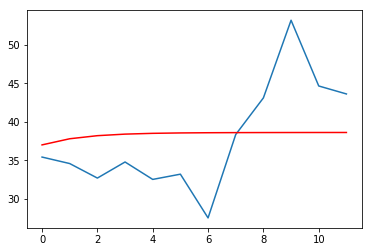

   ========== t = 269 ; D = 12 ========
d = 1:: predicted=36.169250, expected=34.592700
d = 2:: predicted=36.961671, expected=32.707500
d = 3:: predicted=37.360339, expected=34.796400
d = 4:: predicted=37.561292, expected=32.533110
d = 5:: predicted=37.662930, expected=33.213820
d = 6:: predicted=37.714726, expected=27.531410
d = 7:: predicted=37.741496, expected=38.364960
d = 8:: predicted=37.755689, expected=43.123380
d = 9:: predicted=37.763571, expected=53.209500
d = 10:: predicted=37.768276, expected=44.670590
d = 11:: predicted=37.771397, expected=43.634680
d = 12:: predicted=37.773720, expected=41.795900


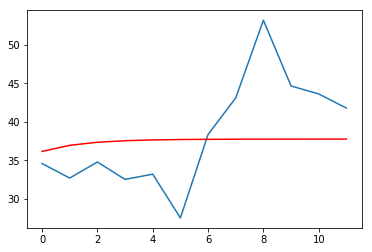

   ========== t = 270 ; D = 12 ========
d = 1:: predicted=34.713013, expected=32.707500
d = 2:: predicted=35.720824, expected=34.796400
d = 3:: predicted=36.227629, expected=32.533110
d = 4:: predicted=36.482853, expected=33.213820
d = 5:: predicted=36.611748, expected=27.531410
d = 6:: predicted=36.677183, expected=38.364960
d = 7:: predicted=36.710775, expected=43.123380
d = 8:: predicted=36.728368, expected=53.209500
d = 9:: predicted=36.737922, expected=44.670590
d = 10:: predicted=36.743459, expected=43.634680
d = 11:: predicted=36.746961, expected=41.795900
d = 12:: predicted=36.749454, expected=35.608650


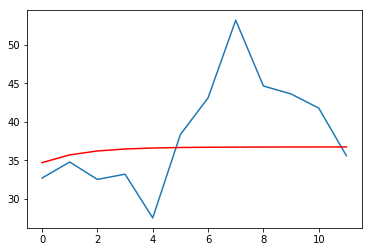

   ========== t = 271 ; D = 12 ========
d = 1:: predicted=35.476047, expected=34.796400
d = 2:: predicted=35.818050, expected=32.533110
d = 3:: predicted=35.990496, expected=33.213820
d = 4:: predicted=36.077808, expected=27.531410
d = 5:: predicted=36.122358, expected=38.364960
d = 6:: predicted=36.145450, expected=43.123380
d = 7:: predicted=36.157760, expected=53.209500
d = 8:: predicted=36.164660, expected=44.670590
d = 9:: predicted=36.168837, expected=43.634680
d = 10:: predicted=36.171645, expected=41.795900
d = 11:: predicted=36.173777, expected=35.608650
d = 12:: predicted=36.175559, expected=34.231870


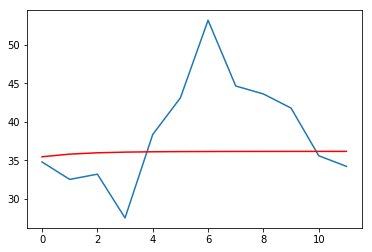

   ========== t = 272 ; D = 12 ========
d = 1:: predicted=34.006295, expected=32.533110
d = 2:: predicted=34.746770, expected=33.213820
d = 3:: predicted=35.119297, expected=27.531410
d = 4:: predicted=35.307059, expected=38.364960
d = 5:: predicted=35.402039, expected=43.123380
d = 6:: predicted=35.450420, expected=53.209500
d = 7:: predicted=35.475418, expected=44.670590
d = 8:: predicted=35.488668, expected=43.634680
d = 9:: predicted=35.496018, expected=41.795900
d = 10:: predicted=35.500406, expected=35.608650
d = 11:: predicted=35.503314, expected=34.231870
d = 12:: predicted=35.505475, expected=32.738860


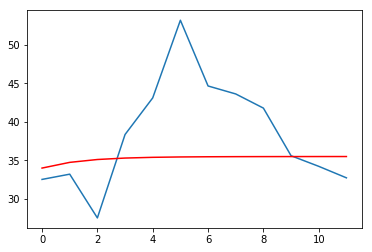

   ========== t = 273 ; D = 12 ========
d = 1:: predicted=34.070517, expected=33.213820
d = 2:: predicted=34.501398, expected=27.531410
d = 3:: predicted=34.718448, expected=38.364960
d = 4:: predicted=34.828115, expected=43.123380
d = 5:: predicted=34.883861, expected=53.209500
d = 6:: predicted=34.912551, expected=44.670590
d = 7:: predicted=34.927644, expected=43.634680
d = 8:: predicted=34.935912, expected=41.795900
d = 9:: predicted=34.940741, expected=35.608650
d = 10:: predicted=34.943845, expected=34.231870
d = 11:: predicted=34.946098, expected=32.738860
d = 12:: predicted=34.947922, expected=31.154700


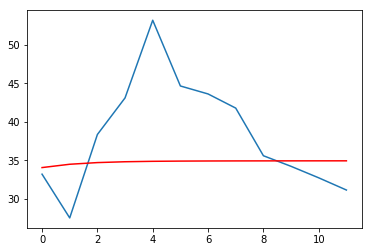

   ========== t = 274 ; D = 12 ========
d = 1:: predicted=30.564522, expected=27.531410
d = 2:: predicted=32.088249, expected=38.364960
d = 3:: predicted=32.854050, expected=43.123380
d = 4:: predicted=33.239230, expected=53.209500
d = 5:: predicted=33.433320, expected=44.670590
d = 6:: predicted=33.531434, expected=43.634680
d = 7:: predicted=33.581353, expected=41.795900
d = 8:: predicted=33.607067, expected=35.608650
d = 9:: predicted=33.620642, expected=34.231870
d = 10:: predicted=33.628110, expected=32.738860
d = 11:: predicted=33.632521, expected=31.154700
d = 12:: predicted=33.635370, expected=29.294570


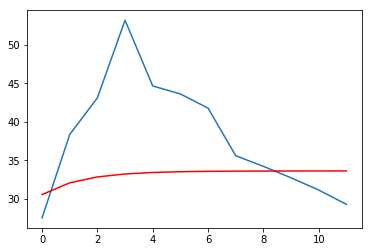

   ========== t = 275 ; D = 12 ========
d = 1:: predicted=36.191171, expected=38.364960
d = 2:: predicted=35.100289, expected=43.123380
d = 3:: predicted=34.553156, expected=53.209500
d = 4:: predicted=34.279078, expected=44.670590
d = 5:: predicted=34.142106, expected=43.634680
d = 6:: predicted=34.073990, expected=41.795900
d = 7:: predicted=34.040445, expected=35.608650
d = 8:: predicted=34.024263, expected=34.231870
d = 9:: predicted=34.016801, expected=32.738860
d = 10:: predicted=34.013709, expected=31.154700
d = 11:: predicted=34.012830, expected=29.294570
d = 12:: predicted=34.013041, expected=32.977530


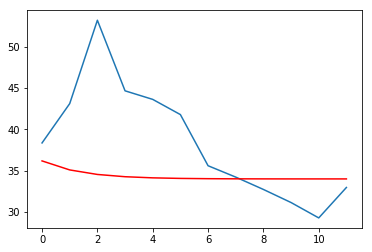

   ========== t = 276 ; D = 12 ========
d = 1:: predicted=39.478003, expected=43.123380
d = 2:: predicted=37.648191, expected=53.209500
d = 3:: predicted=36.730060, expected=44.670590
d = 4:: predicted=36.269723, expected=43.634680
d = 5:: predicted=36.039244, expected=41.795900
d = 6:: predicted=35.924233, expected=35.608650
d = 7:: predicted=35.867174, expected=34.231870
d = 8:: predicted=35.839227, expected=32.738860
d = 9:: predicted=35.825902, expected=31.154700
d = 10:: predicted=35.819921, expected=29.294570
d = 11:: predicted=35.817612, expected=32.977530


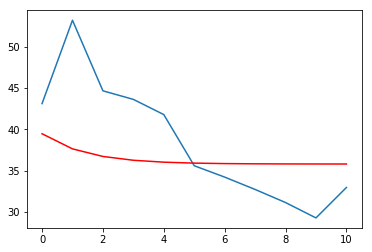

   ========== t = 277 ; D = 12 ========
d = 1:: predicted=46.213765, expected=53.209500
d = 2:: predicted=42.701633, expected=44.670590
d = 3:: predicted=40.938781, expected=43.634680
d = 4:: predicted=40.054359, expected=41.795900
d = 5:: predicted=39.611015, expected=35.608650
d = 6:: predicted=39.389182, expected=34.231870
d = 7:: predicted=39.278564, expected=32.738860
d = 8:: predicted=39.223799, expected=31.154700
d = 9:: predicted=39.197072, expected=29.294570
d = 10:: predicted=39.184450, expected=32.977530


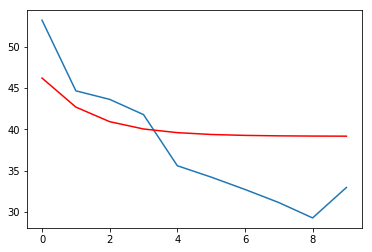

   ========== t = 278 ; D = 12 ========
d = 1:: predicted=42.857404, expected=44.670590
d = 2:: predicted=41.947759, expected=43.634680
d = 3:: predicted=41.491790, expected=41.795900
d = 4:: predicted=41.263665, expected=35.608650
d = 5:: predicted=41.149934, expected=34.231870
d = 6:: predicted=41.093634, expected=32.738860
d = 7:: predicted=41.066198, expected=31.154700
d = 8:: predicted=41.053247, expected=29.294570
d = 9:: predicted=41.047564, expected=32.977530


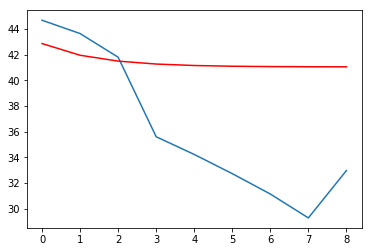

   ========== t = 279 ; D = 12 ========
d = 1:: predicted=42.679683, expected=43.634680
d = 2:: predicted=42.200989, expected=41.795900
d = 3:: predicted=41.961441, expected=35.608650
d = 4:: predicted=41.841989, expected=34.231870
d = 5:: predicted=41.782854, expected=32.738860
d = 6:: predicted=41.753994, expected=31.154700
d = 7:: predicted=41.740336, expected=29.294570
d = 8:: predicted=41.734333, expected=32.977530


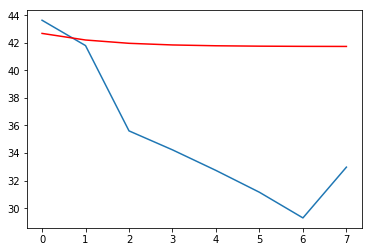

   ========== t = 280 ; D = 12 ========
d = 1:: predicted=41.834418, expected=41.795900
d = 2:: predicted=41.854584, expected=35.608650
d = 3:: predicted=41.865560, expected=34.231870
d = 4:: predicted=41.871914, expected=32.738860
d = 5:: predicted=41.875949, expected=31.154700
d = 6:: predicted=41.878818, expected=29.294570
d = 7:: predicted=41.881114, expected=32.977530


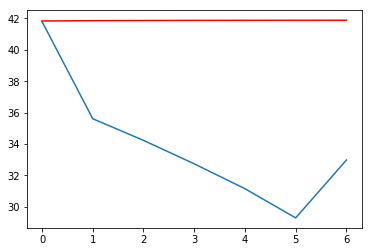

   ========== t = 281 ; D = 12 ========
d = 1:: predicted=38.221727, expected=35.608650
d = 2:: predicted=39.534686, expected=34.231870
d = 3:: predicted=40.194802, expected=32.738860
d = 4:: predicted=40.527097, expected=31.154700
d = 5:: predicted=40.694783, expected=29.294570
d = 6:: predicted=40.779804, expected=32.977530


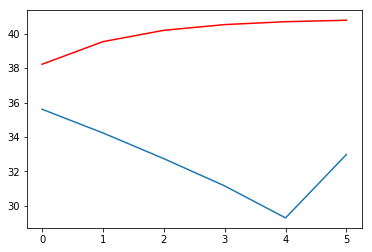

   ========== t = 282 ; D = 12 ========
d = 1:: predicted=36.822386, expected=34.231870
d = 2:: predicted=38.123984, expected=32.738860
d = 3:: predicted=38.778366, expected=31.154700
d = 4:: predicted=39.107759, expected=29.294570
d = 5:: predicted=39.273932, expected=32.977530


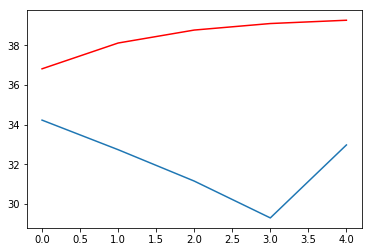

   ========== t = 283 ; D = 12 ========
d = 1:: predicted=35.362688, expected=32.738860
d = 2:: predicted=36.680971, expected=31.154700
d = 3:: predicted=37.343703, expected=29.294570
d = 4:: predicted=37.677233, expected=32.977530


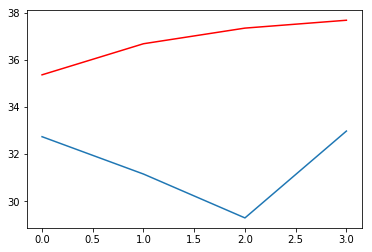

   ========== t = 284 ; D = 12 ========
d = 1:: predicted=33.847639, expected=31.154700
d = 2:: predicted=35.200611, expected=29.294570
d = 3:: predicted=35.880715, expected=32.977530


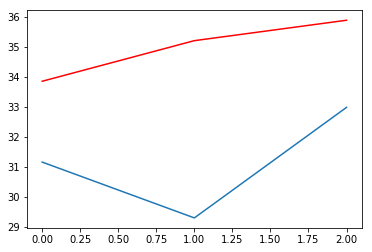

   ========== t = 285 ; D = 12 ========
d = 1:: predicted=32.167965, expected=29.294570
d = 2:: predicted=33.611499, expected=32.977530


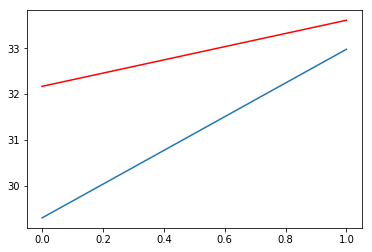

   ========== t = 286 ; D = 12 ========
d = 1:: predicted=33.708963, expected=32.977530


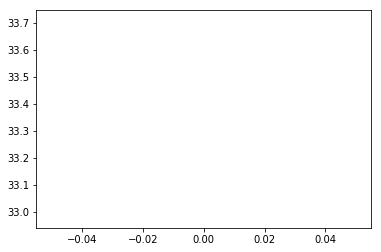

========== DONE ============


In [7]:
D = 12
history = [x for x in train]
predictions = list()

print('========== D = %d ========' %D);
result = pd.DataFrame([])

for t in range(len(test)):   
    historyCustom = history
    historyCustom.append(test[t])
    predictions.clear()
    print('   ========== t = %d ; D = %d ========' %(t,D));
    for d in range(1,D+1):
        if(t+d-1 < len(test)):
            model = ARIMA(historyCustom, order=(1,1,1))
            model_fit = model.fit(disp=0)
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test[t+d-1]
        #     history.append(obs)
            historyCustom.append(yhat)
            print('d = %d:: predicted=%f, expected=%f' % (d, yhat, obs))

    history.append(test[t])
    plt.plot(test[t:t+D])
    plt.plot(predictions, color='red')
    plt.show()
    result = result.append(pd.Series(list(itertools.chain(*predictions))), ignore_index = True)
#         print(result)
    filename = 'caiso/slotwise/holyGrail_' + str(D) + '.csv'
    result.to_csv(filename, index = False, header = False)
    
print('========== DONE ============')


## Error

In [96]:
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)

absolute_percentage_error = np.abs((test - predictions) / test)
mape = np.mean(np.abs((test - predictions) / test)) * 100

print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)
print('Test MAPE (percent): %.2f' % mape)


Test MSE: 64.820
Test MAE: 4.254
Test MAPE (percent): 9.25


# Solution 02

## Outliers Removal
 keep only the ones that are within +3 to -3 standard deviations in the column 'price'.

In [77]:
ts2 = ts[np.abs(ts.price - ts.price.mean()) <= (3*ts.price.std())]
ts2.describe()

price
count  17415.000000
mean      26.967077
std       15.528954
min      -21.873580
25%       19.887500
50%       24.298000
75%       30.591830
max      185.180000

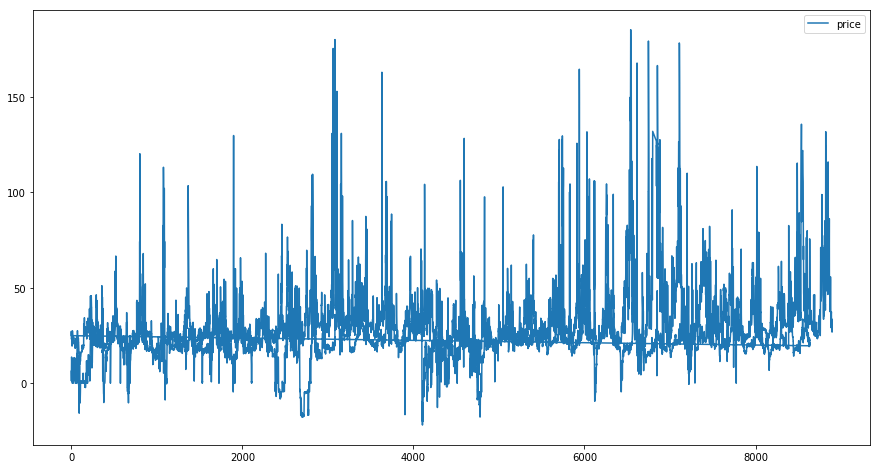

In [78]:
ts2.plot()

## Train and Test Data

In [79]:
deadline = 6
X = ts2.values
train = X[0:len(X)]

augData = pd.read_csv('data_target.csv').drop(columns=['Date'])
T = augData.values
test = T[0:len(T)]
len(train), len(test)

(17415, 287)

# ARIMA

t: 0 -- predicted=32.911295, expected=27.252910
t: 1 -- predicted=29.366728, expected=26.921320
t: 2 -- predicted=28.906157, expected=41.362070
t: 3 -- predicted=39.074674, expected=37.821590
t: 4 -- predicted=36.771783, expected=36.554900
t: 5 -- predicted=35.972763, expected=33.167130
t: 6 -- predicted=33.600849, expected=32.119290
t: 7 -- predicted=32.803208, expected=28.512300
t: 8 -- predicted=30.141040, expected=29.549990
t: 9 -- predicted=30.715774, expected=26.533460
t: 10 -- predicted=28.427011, expected=30.632000
t: 11 -- predicted=31.172408, expected=35.706920
t: 12 -- predicted=34.761619, expected=34.990880
t: 13 -- predicted=34.347262, expected=33.837380
t: 14 -- predicted=33.586963, expected=34.823840
t: 15 -- predicted=34.322428, expected=34.559600
t: 16 -- predicted=34.185928, expected=34.680810
t: 17 -- predicted=34.312856, expected=33.698700
t: 18 -- predicted=33.646730, expected=33.371360
t: 19 -- predicted=33.417697, expected=33.472080
t: 20 -- predicted=33.485788, 

t: 167 -- predicted=79.705596, expected=76.200970
t: 168 -- predicted=70.290270, expected=42.088660
t: 169 -- predicted=46.302354, expected=40.908740
t: 170 -- predicted=44.999305, expected=35.070750
t: 171 -- predicted=40.351532, expected=34.406050
t: 172 -- predicted=39.318722, expected=33.296020
t: 173 -- predicted=38.007623, expected=39.120570
t: 174 -- predicted=41.719947, expected=40.972580
t: 175 -- predicted=42.787178, expected=41.378550
t: 176 -- predicted=42.893587, expected=41.312510
t: 177 -- predicted=42.690889, expected=49.643640
t: 178 -- predicted=48.551253, expected=43.082650
t: 179 -- predicted=43.938590, expected=39.563560
t: 180 -- predicted=41.316401, expected=37.166180
t: 181 -- predicted=39.409791, expected=36.218180
t: 182 -- predicted=38.496732, expected=36.407790
t: 183 -- predicted=38.399622, expected=36.363720
t: 184 -- predicted=38.163668, expected=34.617750
t: 185 -- predicted=36.721321, expected=37.545740
t: 186 -- predicted=38.614982, expected=38.911560


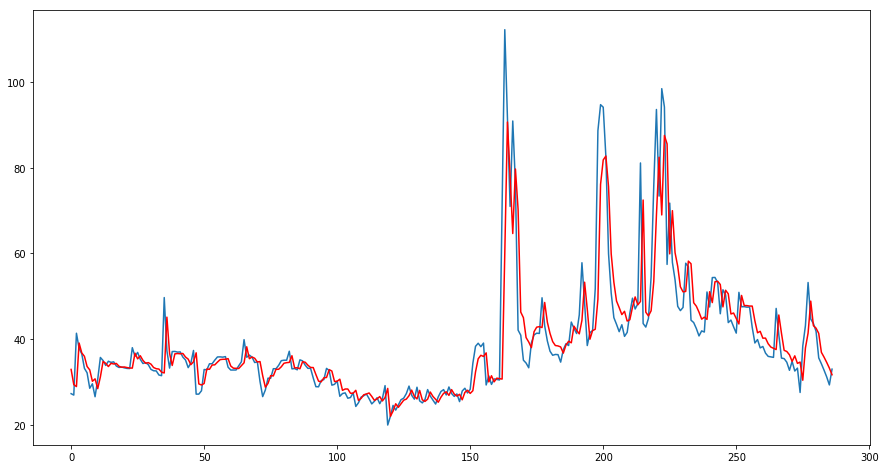

In [90]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.extend(yhat)
    obs = test[t]
    history.append(obs)
    print('t: %d -- predicted=%f, expected=%f' % (t,yhat, obs))

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

holyGrail = pd.DataFrame(predictions)
holyGrail.to_csv('holyGrail.csv', index = False, header = False)

# Error

In [97]:
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)

absolute_percentage_error = np.abs((test - predictions) / test)
mape = np.mean(np.abs((test - predictions) / test)) * 100

print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)
print('Test MAPE (percent): %.2f' % mape)

Test MSE: 64.820
Test MAE: 4.254
Test MAPE (percent): 9.25
